# **8. Deep Learning Software**
---



## 8.1 GPU and CPU: Overview and Evolution

### **CPUs (Central Processing Units)**
- **Function**: CPUs are optimized for **single-threaded performance**, handling tasks sequentially. Modern CPUs, especially from **Intel** (e.g., **Core i9** series) and **AMD** (e.g., **Ryzen 9** series), now feature **up to 16-24 cores** with **multi-threading** (SMT or Hyper-Threading), enabling better parallelism. Additionally, high-efficiency cores, such as those in Intel's **Alder Lake** and **Raptor Lake**, offer performance for mixed workloads.
- **Architectural Evolution**: CPUs have evolved with improvements in core count, clock speed, and **IPC (Instructions Per Cycle)**, making them highly capable for sequential tasks, like general-purpose computing, data processing, and running operating systems.
- **Memory**: CPUs utilize **DDR5** memory for faster access compared to older DDR4 systems, enhancing overall system performance.

### **GPUs (Graphics Processing Units)**
- **Function**: GPUs are built for **massive parallel processing** and excel at tasks like **image rendering**, **matrix multiplications**, and **deep learning**. Modern GPUs, especially from **NVIDIA** (e.g., **RTX 40 series** and **A100** series) and **AMD** (e.g., **RDNA** and **CDNA**), feature thousands of **cores** and are designed to handle high-throughput tasks.
- **Specialized Hardware**: For deep learning, NVIDIA’s **Tensor Cores** accelerate matrix operations central to neural networks, and specialized hardware like **TPUs** from Google further optimizes AI workloads.
- **Memory**: Modern GPUs use **GDDR6X** memory, offering significantly faster data access compared to older **GDDR5X** systems, and their memory sizes now reach up to **24 GB** or more for high-end models like the **NVIDIA A100**.

### **Key Differences: CPU vs GPU**
- **Core Architecture**:
  - **CPU**: Fewer, but faster and more capable cores. Best for **sequential tasks** and general-purpose processing.
  - **GPU**: Thousands of slower cores, optimized for **parallel tasks**, making them ideal for tasks like deep learning, scientific simulations, and 3D rendering.
  
- **Clock Speed**:
  - **CPU** cores run at high clock speeds (e.g., **3.5–5 GHz**), providing high performance for tasks requiring sequential execution.
  - **GPU** cores operate at lower speeds (e.g., **1.6 GHz**), but with significantly more cores to handle parallelism.

- **Memory and Bandwidth**:
  - **CPU**: Uses shared system memory (e.g., **DDR4/DDR5**), which can be a bottleneck for heavy workloads.
  - **GPU**: Uses **high-bandwidth dedicated memory** like **GDDR5X** and **GDDR6X**, allowing faster data handling for large-scale calculations.
 - **CPU Best For**:
    - Sequential tasks (e.g., running algorithms with many conditional branches)
    - Single-threaded operations
    - General-purpose computing
 - **GPU Best For**:
    - Parallel computing tasks (e.g., matrix operations, training neural networks)
    - Handling large datasets for deep learning
    - Tasks requiring high throughput (e.g., video rendering, image processing)

### Modern Use Cases for CPUs and GPUs
- **CPUs** remain indispensable for general-purpose computing, where tasks are less parallelizable or require high single-threaded performance, like running operating systems and certain application software.
- **GPUs** have become the powerhouse for modern **AI/ML (Artificial Intelligence/Machine Learning)** tasks. With their ability to perform many operations simultaneously, they excel in applications like **deep learning**, **computer vision**, and **data science**.

### Programming GPUs
- **CUDA** (for NVIDIA GPUs) is the most widely used platform for GPU programming, providing high-level libraries such as **cuDNN** (for deep learning) and **cuBLAS** (for linear algebra).
- **OpenCL** is an alternative to CUDA that works on GPUs from any vendor, though it is generally slower.
- Modern software tools, such as **TensorFlow**, **PyTorch**, and **MXNet**, leverage these frameworks, allowing deep learning researchers and practitioners to offload computations to GPUs with minimal manual programming.

### Performance: CPU vs GPU in Practice
- **Benchmarking**: When comparing the performance of CPUs and GPUs for deep learning tasks, GPUs, particularly with specialized libraries like **cuDNN** and optimized CUDA code, are much faster. For example, **GPU-based training** can be **66x to 76x faster** than CPU-based solutions, depending on the task and the setup.
- **Data Transfer Bottleneck**: One of the main bottlenecks in training deep learning models on GPUs is the transfer of data from **CPU to GPU**. Modern systems mitigate this by:
  - Using **high-speed SSDs** instead of HDDs for faster data read/write operations.
  - Loading all data into **RAM** and using **multiple CPU threads** for efficient prefetching of data.
  - Employing **high-bandwidth interconnects** like **NVIDIA NVLink** or **AMD Infinity Fabric** for efficient data transfer between multiple GPUs and CPUs.

### Modern Cloud Platforms and AI Hardware
- **Cloud computing** services such as **AWS**, **Azure**, and **Google Cloud** offer **GPU-based instances** (e.g., **NVIDIA Tesla V100** and **A100**) for on-demand access to powerful hardware for training deep learning models. These instances are equipped with specialized AI chips, such as **Tensor Cores** (NVIDIA) and **TPUs** (Google), which provide superior performance for matrix-based calculations and AI workloads.

### CPU/GPU Communication

When using GPUs for deep learning, there’s often a bottleneck in transferring data between the CPU and GPU. This is particularly noticeable when the data is large and needs to be loaded into memory before training begins. To mitigate this, you can:

- **Read all data into RAM** to reduce disk access time.
- **Use SSDs** instead of slower hard drives to speed up data transfer.
- **Use multiple CPU threads** to prefetch and load data into memory ahead of time, ensuring the GPU stays busy without waiting for data.

### Conclusion

- **CPUs** are still essential for general-purpose computing, especially for single-threaded tasks. However, as workloads become increasingly parallel, **GPUs** are taking the lead, especially in **AI**, **machine learning**, and **scientific computing**.

- **GPUs** are now central to modern computational tasks, not just for gaming and graphics, but for handling vast amounts of data and computations involved in deep learning, AI, and big data analytics. The evolution of hardware, such as **NVIDIA's A100**, **Google's TPUs**, and **AMD's ROCm platform**, demonstrates the shift towards specialized hardware for AI, marking a turning point in the future of computing.

While GPUs are essential for high-performance deep learning, CPUs remain important for other aspects of computation and are often used together with GPUs to create an optimized workflow.

---

- **CUDA (Compute Unified Device Architecture)**: This is NVIDIA's parallel computing platform and API. It allows developers to leverage the power of GPUs for general-purpose processing.
  
- **Tensor Cores**: Some GPUs, especially those from NVIDIA, feature Tensor Cores, which are specialized for deep learning tasks and further accelerate matrix operations in neural network training.



### 8.1.1 Matrix Multiplication: CPU vs GPU

#### Matrix Multiplication on a CPU
- **How it Works**:  
  CPUs utilize a small number of high-performance cores to handle matrix multiplication sequentially or in smaller parallel chunks.  
  - **Example**: For multiplying two matrices A (m x n) and B (n x p), the CPU computes the dot product for each cell in C (m x p) row-by-row or in small batches.  
- **Strengths**:  
  - Excellent precision for small to medium-sized matrix operations.  
  - Highly efficient for tasks with dependencies between computations.  
- **Limitations**:  
  - Limited core counts (e.g., 4–16 cores) lead to slower performance for large-scale matrix operations.  
  - Memory bandwidth shared with other processes can create performance bottlenecks.  

#### Matrix Multiplication on a GPU
- **How it Works**:  
  GPUs leverage thousands of cores to perform matrix multiplication in parallel, distributing calculations for different parts of the matrix to multiple cores.  
  - **Example**: Each GPU core calculates the dot product for a single cell in C, dividing the task into blocks and threads for maximum parallelism.  
- **Strengths**:  
  - **Massive Parallelism**: Thousands of operations occur simultaneously, significantly accelerating computations.  
  - **Optimized Libraries**: Libraries like cuBLAS (NVIDIA GPUs) and ROCm BLAS (AMD GPUs) optimize GPU performance for matrix operations.  
  - **Specialized Hardware**: GPUs like NVIDIA’s Tensor Cores enable mixed-precision computation (FP16/FP32) to boost performance in deep learning applications.  
- **Limitations**:  
  - **Data Transfer Overhead**: Transferring large matrices between CPU and GPU memory can bottleneck the computation.  
  - **Precision Trade-offs**: Mixed precision, while faster, may not be suitable for scientific or critical computations requiring high precision.  

#### Performance Comparison
- CPUs are better at sequential tasks due to faster individual cores but are limited by the number of available cores.  
- GPUs excel at parallel tasks, achieving speedups of 66x or more in matrix operations like those in neural networks.  
  - **Example**: Training a neural network relies heavily on large-scale matrix multiplications, which GPUs handle much faster.  

#### Real-World Usage
- **CPUs**:  
  - Ideal for small-scale matrix operations or computations with dependencies.  
  - Commonly used for preprocessing or data preparation in deep learning.  
- **GPUs**:  
  - Essential for large-scale matrix computations in frameworks like TensorFlow and PyTorch.  
  - Widely used for training and inference in deep learning, where matrix multiplication is a key operation.  


### 8.1.2 Parallel Processing Programming: CPU vs GPU

#### Parallel Processing on a CPU
- **How it Works**:  
  CPUs support multithreading and parallel execution across a few high-performance cores. This allows for efficient handling of tasks that can be divided into smaller, independent subtasks.  
  - **Example**: In matrix multiplication, a CPU may split the rows of matrix A or columns of matrix B across threads to compute portions of the output matrix C.  
- **Programming Models**:  
  - **OpenMP**: A widely used API for parallel programming on multicore CPUs, allowing developers to annotate code for parallel execution.  
  - **Threading Libraries**: Languages like Python (via multiprocessing or threading) and C++ (via standard threading libraries) allow explicit parallelism.  
- **Strengths**:  
  - Excellent for tasks with low levels of parallelism or tasks requiring high precision and complex control flows.  
  - Easier to program and debug for small-scale parallelism compared to GPUs.  
- **Limitations**:  
  - Limited scalability due to fewer cores.  
  - Shared memory bandwidth between cores may lead to bottlenecks in highly parallel workloads.  

#### Parallel Processing on a GPU
- **How it Works**:  
  GPUs are built for massive parallelism, with thousands of smaller, simpler cores executing operations concurrently.  
  - **Example**: Each core on a GPU may process a specific cell in the output matrix C during matrix multiplication, enabling simultaneous computation of all elements.  
- **Programming Models**:  
  - **CUDA (Compute Unified Device Architecture)**: NVIDIA's platform for writing GPU-accelerated code in C/C++ or Python. It allows for fine-grained control over GPU resources.  
  - **OpenCL**: A cross-platform API for parallel computing on CPUs, GPUs, and other accelerators. While versatile, it may lag behind CUDA in performance and ecosystem support.  
  - **Higher-Level APIs**: Libraries like TensorFlow, PyTorch, cuBLAS, and cuDNN abstract GPU programming, providing optimized tools for deep learning and other computations.  
- **Strengths**:  
  - Superior scalability for large, independent computations.  
  - Optimized for repetitive tasks such as matrix multiplication, vector operations, and image processing.  
- **Limitations**:  
  - Programming GPUs requires more expertise compared to CPUs.  
  - Data transfer between the CPU and GPU can be a bottleneck, necessitating careful memory management.  

#### Performance Comparison
- **CPUs**:  
  - Best suited for tasks with low to moderate parallelism and complex dependencies.  
  - Efficient for control-heavy operations where branching logic is common.  
- **GPUs**:  
  - Provide significant speedups for tasks with high parallelism and low interdependency, such as matrix multiplications, image processing, and deep learning training.  
  - GPUs may achieve 50-100x faster execution for suitable workloads compared to CPUs.  

#### Real-World Usage
- **Parallel Programming on CPUs**:  
  - Commonly used in data preprocessing, simulation tasks, and applications requiring lower levels of parallelism.  
  - Easier to integrate into existing systems where GPUs are not available.  
- **Parallel Programming on GPUs**:  
  - Essential for training deep learning models, scientific simulations, and rendering tasks.  
  - Leveraged heavily in high-performance computing (HPC) environments and frameworks like TensorFlow, PyTorch, and NVIDIA RAPIDS for accelerated data science.  


### 8.1.3 Running Deep Learning Models on Streaming Data for Automotive Applications

#### Overview
In automotive applications, deep learning models are increasingly used for real-time tasks such as autonomous driving, driver assistance systems, and in-vehicle infotainment. These models often process streaming data (e.g., sensor data, camera feeds, vehicle telemetry) to make split-second decisions. For such applications, the system needs to operate efficiently on embedded platforms with stringent performance, power consumption, and reliability requirements.

#### Key Requirements for Automotive Deep Learning Models
1. **Low Latency**: Deep learning models must make real-time predictions with minimal delay to ensure safety and user experience.
2. **High Throughput**: Continuous streams of data must be processed quickly, often from multiple sensors (cameras, LIDAR, radar, etc.).
3. **Resource Efficiency**: Due to limited computational resources on embedded devices, models need to be lightweight and optimized for performance and power consumption.
4. **Reliability**: The system must operate reliably in the harsh automotive environment, handling issues like temperature extremes, vibrations, and power fluctuations.

#### Platforms for Running Deep Learning Models in Automotive Applications
1. **Embedded Linux**:  
   Embedded Linux (e.g., Yocto, OpenEmbedded, Ubuntu Core) is commonly used in automotive systems due to its flexibility, open-source nature, and support for a wide range of hardware.  
   - **Deployment**: Deep learning models on Embedded Linux can run in containers (e.g., Docker) or native applications.
   - **Edge Computing**: Typically, deep learning models on embedded Linux devices are deployed on edge devices for real-time processing of sensor data (e.g., cameras, LIDAR) without needing to send the data to the cloud.
   - **Tools**: Libraries like TensorFlow Lite, PyTorch Mobile, and NVIDIA TensorRT (for NVIDIA-based systems) allow deep learning models to run efficiently on ARM-based or other embedded processors.
  
2. **QNX**:  
   QNX is a real-time operating system (RTOS) widely used in the automotive industry for safety-critical applications, such as autonomous driving and infotainment.  
   - **Real-Time Performance**: QNX ensures low-latency execution for deep learning models, which is critical for automotive applications like collision avoidance and lane-keeping assistance.
   - **Deployment**: QNX can run models using frameworks like TensorFlow or PyTorch, but typically with optimizations to ensure real-time processing. It may require porting models to optimized inference engines compatible with QNX.
   - **Hardware Integration**: QNX provides support for GPUs and accelerators, crucial for running deep learning models efficiently on embedded automotive hardware.

3. **Android for Automotive (AAOS)**:  
   Android Auto and Android Automotive OS (AAOS) are used in infotainment systems and in-vehicle touchscreens. While AAOS is not typically used for autonomous driving, it is commonly employed for running applications like navigation, media, and vehicle control interfaces.  
   - **Deployment**: Deep learning models for applications like object recognition, user interaction prediction, and voice assistants can be run directly on Android devices. Frameworks like TensorFlow Lite and ONNX Runtime for Android provide optimized models for mobile and embedded devices.
   - **UI Integration**: Models can integrate with the Android user interface, providing features like gesture recognition or adaptive control based on driver behavior. This is particularly useful in touchscreen applications and infotainment systems.
   - **Edge Inference**: For applications like voice recognition or gesture control, models can perform inference on the device, reducing latency compared to cloud-based models.

#### Considerations for Deploying Deep Learning on Automotive Systems
1. **Model Optimization**:  
   - **Model Compression**: Techniques like quantization, pruning, and knowledge distillation are essential to reduce the size and complexity of models for efficient deployment on embedded platforms.
   - **TensorFlow Lite and PyTorch Mobile**: These tools allow models to be converted into smaller, optimized versions that can run efficiently on embedded Linux, QNX, or Android-based platforms.
   - **Hardware Acceleration**: Models can be accelerated using hardware accelerators like NVIDIA Jetson (CUDA, TensorRT), Qualcomm AI Engine, or specialized automotive chips like NXP or Renesas, which provide integrated AI support.

2. **Edge vs Cloud Inference**:  
   - **Edge Computing**: In automotive applications, it's often preferable to perform inference on the edge, within the vehicle, to minimize latency and reduce dependence on cloud connectivity. This is especially important for autonomous driving where decisions must be made in real-time.
   - **Cloud Offloading**: In some cases, non-critical tasks or less latency-sensitive tasks can be offloaded to the cloud. However, cloud processing is typically reserved for non-time-critical functions (e.g., vehicle data analytics, fleet management).

3. **Data Streaming and Preprocessing**:  
   - **Sensor Data Handling**: Automotive systems generate vast amounts of data from sensors such as cameras, radar, LiDAR, and IMUs. Efficient data handling pipelines are necessary to preprocess and feed the data to deep learning models in real-time.
   - **Data Buffers**: Use of circular buffers or streaming data pipelines ensures continuous feeding of sensor data into the model without dropping frames or samples.

4. **Power Consumption**:  
   - **Efficient Models**: Automotive systems, especially embedded devices, must be power-efficient. Running heavy models on battery-powered devices like electric vehicles or mobile units in the car demands energy-efficient inference strategies.
   - **Edge Processing**: Offloading heavy computation to the edge with hardware accelerators minimizes power consumption, as opposed to relying on constant cloud communication.

#### Real-World Applications in Automotive Systems
1. **Autonomous Driving**:  
   - Real-time object detection, semantic segmentation, and path planning models process camera, radar, and LiDAR data to make driving decisions. These models typically run on powerful embedded platforms like NVIDIA Drive PX, TensorRT-optimized systems, or specialized automotive chips.
   
2. **Driver Assistance**:  
   - Systems like lane-keeping assist, collision avoidance, and adaptive cruise control rely on deep learning models running on embedded Linux or QNX systems to make decisions based on real-time sensor data.

3. **In-Vehicle Infotainment**:  
   - Voice assistants, gesture recognition, and personalized user experiences can run deep learning models on Android Automotive OS devices, allowing for seamless interaction with the vehicle's touchscreen or voice interface.

4. **Predictive Maintenance**:  
   - Deep learning models for predictive maintenance analyze data from vehicle sensors to predict component failure, ensuring the vehicle operates efficiently and safely.

#### Challenges
- **Latency**: In autonomous driving, even a few milliseconds of delay can be critical. Thus, optimizing the deployment pipeline to minimize inference time is essential.
- **Scalability**: As more sensors and data sources are integrated into the vehicle, ensuring that the deep learning model can scale efficiently becomes crucial.
- **Reliability and Safety**: For safety-critical applications (e.g., autonomous driving), the system must be highly reliable and fault-tolerant, requiring rigorous testing and validation of deep learning models and the surrounding software architecture.

#### Conclusion
Running deep learning models for streaming data in automotive applications requires a balance between low-latency performance, resource efficiency, and reliability. Embedded Linux, QNX, and Android Automotive OS are all viable platforms for deploying deep learning models, with the choice depending on the specific use case, hardware platform, and performance requirements. The integration of optimized deep learning frameworks, model compression techniques, and hardware accelerators ensures that automotive systems can handle the demands of real-time data processing in dynamic environments.


### 8.1.4 Programming GPUs for Automotive Deep Learning Applications

#### Overview
Programming GPUs is essential for accelerating deep learning models, especially when real-time data processing is required, such as in automotive applications for autonomous driving, driver assistance systems, and in-vehicle infotainment. GPU programming allows the parallelization of computations, which can drastically speed up tasks like matrix multiplications, object detection, and sensor data fusion. Two primary frameworks for programming GPUs are CUDA (NVIDIA-specific) and OpenCL (cross-platform), with the former being the most widely used in deep learning applications.

#### CUDA: GPU Programming with NVIDIA
CUDA (Compute Unified Device Architecture) is a parallel computing platform and programming model developed by NVIDIA. It allows developers to write C-like code that can run directly on the GPU, taking full advantage of its thousands of cores for parallel processing tasks, which is crucial for deep learning.

- **C-like Code for GPUs**: CUDA allows developers to write code in C, C++, and Python (via wrappers like `pyCUDA`) that is executed directly on NVIDIA GPUs. It provides access to low-level GPU hardware, enabling fine-tuned optimizations for deep learning models.
  
- **Higher-Level APIs**: CUDA also offers several high-level APIs to simplify common tasks in deep learning, such as linear algebra, Fourier transforms, and deep neural network operations:
  - **cuBLAS**: A library that provides GPU-accelerated implementations of basic linear algebra operations (e.g., matrix multiplications) commonly used in deep learning models.
  - **cuFFT**: A library for performing fast Fourier transforms (FFT) on GPUs, which is useful for signal processing in some automotive applications like radar and LIDAR data processing.
  - **cuDNN**: A GPU-accelerated library for deep neural networks, optimized for deep learning workloads. It provides highly optimized functions for training and inference in convolutional neural networks (CNNs), which are often used in autonomous driving for object detection, image segmentation, and more.

- **Real-Time Performance**: CUDA is essential for automotive deep learning applications, where the need for real-time performance is critical. Using NVIDIA GPUs and CUDA optimizations (e.g., Tensor Cores for mixed-precision operations) can reduce inference times significantly, allowing real-time decision-making in applications such as autonomous driving.

#### OpenCL: Cross-Platform GPU Programming
OpenCL (Open Computing Language) is an open-source, cross-platform framework for parallel computing. It allows developers to write programs that execute across a variety of computing devices, including GPUs, CPUs, and other accelerators, from multiple vendors.

- **Cross-Platform Compatibility**: Unlike CUDA, which is specific to NVIDIA GPUs, OpenCL works across a wider range of hardware, including GPUs from AMD, Intel, and ARM-based systems. This makes it a good choice for automotive systems that might use heterogeneous hardware.
  
- **Performance**: While OpenCL provides more flexibility and broader device support, it tends to be slower than CUDA for deep learning applications, especially on NVIDIA GPUs. This is due to the fact that CUDA is highly optimized for NVIDIA hardware, leveraging NVIDIA-specific features like Tensor Cores and other performance enhancements.

- **Use Cases**: OpenCL can still be useful in automotive systems where heterogeneous hardware is used (e.g., a mix of NVIDIA, AMD, and ARM-based chips). However, for deep learning tasks, CUDA is typically preferred due to its superior performance and optimizations for neural network tasks.

#### Tools and Libraries for Deep Learning
While low-level GPU programming with CUDA and OpenCL is powerful, in many cases, it is more efficient to use higher-level deep learning libraries that abstract away the complexities of GPU programming and optimization. These libraries provide optimized implementations for common deep learning tasks, including model training, inference, and deployment.

1. **TensorFlow**:
   - TensorFlow supports GPU acceleration via CUDA on NVIDIA GPUs. It allows for easy deployment of deep learning models on automotive systems, with optimizations for both training and inference on embedded hardware.
   - TensorFlow Lite can be used to deploy lightweight models on resource-constrained automotive systems.

2. **PyTorch**:
   - PyTorch also supports CUDA and is a popular framework for deep learning research. PyTorch’s dynamic computation graph makes it easier to experiment and deploy new deep learning models.
   
3. **TensorRT**:
   - TensorRT is a high-performance deep learning inference library from NVIDIA. It is used to optimize trained models (e.g., TensorFlow or PyTorch models) for fast, efficient execution on NVIDIA GPUs, which is crucial in automotive applications that require real-time processing, such as object detection and decision-making.

4. **ONNX**:
   - The Open Neural Network Exchange (ONNX) format provides a common platform for interoperability between different deep learning frameworks (e.g., TensorFlow, PyTorch). ONNX models can be optimized and run on multiple hardware platforms using frameworks like ONNX Runtime.

#### Best Practices for Automotive Applications
1. **Hardware Selection**:
   - **NVIDIA GPUs**: For automotive applications requiring high-performance deep learning models, such as real-time object detection or sensor fusion, NVIDIA GPUs (e.g., Jetson AGX Xavier, NVIDIA Drive) provide excellent support for CUDA and deep learning frameworks.
   - **Tensor Cores**: Use GPUs with Tensor Cores (e.g., Volta and Turing architecture) to leverage mixed-precision computations, which can speed up inference and reduce power consumption.

2. **Model Optimization**:
   - Use **model quantization**, **pruning**, and **knowledge distillation** techniques to reduce the size and complexity of models, ensuring they can run efficiently on automotive hardware.
   - Utilize **TensorRT** to optimize models for faster inference on NVIDIA hardware.

3. **Edge Computing**:
   - Offload deep learning computations to edge devices (e.g., embedded Linux or NVIDIA Jetson) in the vehicle. This approach minimizes latency, reduces the need for constant cloud connectivity, and ensures that the system operates autonomously and in real-time.

4. **Power Efficiency**:
   - Optimize the deep learning models for power-efficient inference, especially in battery-powered vehicles. Running heavy computations on GPUs should be balanced with power constraints to ensure the system remains operational without draining the vehicle’s battery.

#### Conclusion
Programming GPUs with frameworks like CUDA and OpenCL is essential for achieving high-performance deep learning models in automotive applications. CUDA, with its optimizations for NVIDIA GPUs, is the go-to solution for deep learning tasks in autonomous driving, driver assistance, and infotainment systems. OpenCL provides cross-platform support but may not match CUDA's performance for deep learning. For most automotive use cases, leveraging existing deep learning frameworks like TensorFlow, PyTorch, and TensorRT, combined with GPU acceleration, offers the best performance and efficiency for real-time, embedded applications in modern vehicles.


## 8.2 Deep Learning Frameworks

Deep learning frameworks have evolved significantly over the years, offering optimized tools and libraries for building, training, and deploying machine learning models. Below is an overview of the key transitions in deep learning frameworks:

### Theano → TensorFlow
- **Theano** was one of the earliest deep learning frameworks and was widely used for research purposes. It allowed developers to define, optimize, and evaluate mathematical expressions involving multi-dimensional arrays. However, Theano’s development was officially discontinued in 2017, and it is no longer actively maintained.
  
- **TensorFlow**, developed by Google, became one of the most popular and widely used frameworks after Theano’s decline. TensorFlow is designed to be highly flexible, with support for both research and production environments. It can scale from small embedded systems to large-scale machine learning models. Key features of TensorFlow include:
  - **Comprehensive Ecosystem**: Includes tools like TensorFlow Lite (for mobile and embedded systems), TensorFlow Extended (for production pipelines), and TensorFlow.js (for running models in the browser).
  - **TensorFlow 2.0**: Introduced improvements such as tighter integration with Keras (a high-level neural networks API), eager execution (for dynamic model creation), and simplified APIs for better usability.
  - **Support for Deployment**: TensorFlow provides tools like TensorFlow Serving, TensorFlow Hub, and TensorFlow.js to streamline the deployment of trained models on various platforms, from cloud servers to edge devices.

### Torch → PyTorch
- **Torch** was a popular framework for deep learning research, primarily used in academia. Built on the Lua programming language, it provided an intuitive interface for developing deep learning models. However, due to limitations in scalability and a smaller user community, it was eventually overshadowed by PyTorch.
  
- **PyTorch** is a deep learning framework developed by Facebook’s AI Research (FAIR) lab. PyTorch gained widespread popularity due to its flexibility, ease of use, and strong support for dynamic computation graphs. PyTorch’s main features include:
  - **Dynamic Computation Graphs**: Unlike TensorFlow’s static graph (before TensorFlow 2.0), PyTorch allows for dynamic computation graphs, making it more intuitive for developers and researchers working on novel models or experiments.
  - **Strong Community and Ecosystem**: PyTorch has quickly become the preferred framework in the research community, with a wide range of pre-trained models available through libraries like `torchvision` and `torchtext`. It also integrates seamlessly with tools like ONNX (Open Neural Network Exchange), which enables cross-platform model deployment.
  - **Performance and Scalability**: PyTorch provides strong support for GPUs through CUDA and offers tools for distributed training (using libraries like `torch.distributed`).

### Caffe → Caffe2
- **Caffe** was a deep learning framework developed by the Berkeley Vision and Learning Center (BVLC). It was designed to be fast and efficient, especially for convolutional neural networks (CNNs) and image classification tasks. Caffe was used in many early computer vision applications but had limited support for dynamic models and lacked a strong community for ongoing development.
  
- **Caffe2** was the successor to Caffe and was developed by Facebook with the goal of addressing the limitations of the original framework. Caffe2 offered:
  - **Better Scalability**: Caffe2 was designed to support both research and production applications, with optimizations for mobile and embedded devices.
  - **Integration with PyTorch**: In 2018, Facebook merged Caffe2 with PyTorch to create a unified platform for deep learning. Caffe2's focus on deployment was absorbed into PyTorch, making it more production-ready while still maintaining its research capabilities.
  - **Mobile and Edge Optimizations**: Caffe2 included tools to run models efficiently on mobile devices, such as the `Caffe2 mobile` framework for on-device inference.

### Conclusion
The landscape of deep learning frameworks has evolved with increasing focus on flexibility, scalability, and real-time deployment. **TensorFlow** and **PyTorch** are the dominant frameworks today, offering comprehensive solutions for training, fine-tuning, and deploying models across various devices, including mobile and embedded systems. These frameworks, combined with the ongoing evolution of hardware like GPUs, are pushing the boundaries of what deep learning can achieve in diverse applications, including automotive, healthcare, and robotics.


### 8.2.1 How Framework Choice Affects Embedded System Deployment in Autonomous Driving

Choosing the right deep learning framework is critical when deploying a model on embedded systems, especially for real-time applications like **autonomous driving**. Embedded systems in autonomous vehicles typically have limited computational resources, including memory, processing power, and storage. Additionally, these systems often require **low-latency** and **high-throughput** for tasks like object detection, path planning, and sensor fusion. Below are some factors on how framework choice impacts model deployment on these systems:

#### 1. **Performance Optimization**
- **TensorFlow Lite**: TensorFlow's lightweight version designed for mobile and embedded devices provides performance optimizations such as model quantization (reducing precision of weights) and hardware acceleration (via GPUs, NPUs, or DSPs). It allows models trained with TensorFlow to be efficiently deployed on embedded devices with lower resource consumption and faster inference times.
- **PyTorch Mobile**: PyTorch’s mobile platform allows for deployment on embedded devices with optimizations for mobile CPUs and GPUs. PyTorch’s support for **JIT compilation** and **TorchScript** enables the model to run efficiently on a variety of embedded platforms.
- **Caffe2 (now part of PyTorch)**: Originally designed for mobile devices and embedded systems, Caffe2 focused on high-performance inference, especially for low-latency applications. Since it was integrated into PyTorch, users can leverage the PyTorch ecosystem for deployment on edge devices with optimizations similar to TensorFlow Lite.

#### 2. **Hardware Compatibility**
- **TensorFlow Lite** is highly optimized for a wide range of hardware, including **ARM-based** CPUs, **Raspberry Pi**, and custom **TPU** chips. This makes it well-suited for edge devices with constrained resources in an autonomous vehicle. It supports hardware acceleration via **GPU** (using OpenGL or Vulkan) and specialized accelerators like **EdgeTPU** or **NVIDIA Jetson**.
- **PyTorch**, while historically more focused on research and development, has expanded its capabilities for embedded systems. It now supports various platforms like **NVIDIA Jetson** and **ARM** architectures through **TorchScript** and **JIT compilation**. PyTorch is gaining popularity for its flexibility, though it may still require more manual tuning for embedded deployment.
- **ONNX (Open Neural Network Exchange)**: A popular alternative for cross-framework deployment, ONNX provides a unified format for models trained in TensorFlow, PyTorch, and other frameworks. It supports a variety of embedded platforms and accelerators, providing a bridge between frameworks to ensure better hardware compatibility.

#### 3. **Memory and Latency Considerations**
- **TensorFlow Lite** provides specific tools to reduce memory footprint through model **quantization** and **pruning**, reducing both the size and the computational requirements of the model. This is essential in automotive applications, where onboard devices often operate with limited RAM and processing power.
- **PyTorch** offers **TorchScript** for optimizing models for production deployment. However, for embedded systems, developers need to carefully manage memory and latency, especially for real-time inference, which is crucial for autonomous driving tasks like image processing and sensor fusion.

#### 4. **Deployment on Real-time Systems**
- **Real-time requirements**: Autonomous driving systems require low-latency decision-making. TensorFlow Lite, with its optimizations, is particularly suitable for embedded real-time systems. It can run models faster and more efficiently on embedded devices like **NVIDIA Jetson** and **Raspberry Pi**.
- **Model Conversion**: Frameworks like **TensorFlow Lite** and **PyTorch Mobile** support the conversion of models into formats optimized for embedded systems. This enables smooth deployment of models without needing to re-implement them. For instance, models trained in TensorFlow can be converted to TensorFlow Lite format, which is highly optimized for mobile and embedded devices with real-time inference requirements.

#### 5. **Development and Ecosystem Support**
- **TensorFlow** has a robust ecosystem, including a dedicated toolchain for embedded devices, such as **TensorFlow Lite**, **TensorFlow.js**, and **TensorFlow Hub**. These tools help developers optimize models, reduce their size, and deploy them seamlessly on embedded systems.
- **PyTorch** offers great flexibility, but when it comes to embedded deployment, it lacks the same level of specialized toolsets as TensorFlow. However, the **PyTorch JIT compiler** and **TorchScript** help developers convert models into optimized versions for embedded systems.
- **Caffe2** was originally optimized for mobile and embedded systems, but now that it is integrated into **PyTorch**, developers can leverage PyTorch’s capabilities along with the performance benefits that Caffe2 originally offered for mobile devices.

#### 6. **Edge Processing and Sensor Integration**
- Autonomous vehicles often require processing sensor data (such as LiDAR, radar, cameras, etc.) at the edge (on the vehicle itself). Frameworks like **TensorFlow Lite**, **PyTorch Mobile**, and **ONNX** have tools and libraries designed to facilitate edge processing for real-time decision-making.
- **TensorFlow Lite for Microcontrollers**: TensorFlow Lite extends to even more resource-constrained platforms, such as **microcontrollers** used in embedded systems, which is important for vehicles that rely on low-power, small-scale processors for specific tasks (e.g., controlling sensors or monitoring simple processes).

### Conclusion

In summary, the choice of framework plays a significant role in determining how well a deep learning model can run on embedded systems in autonomous driving applications. **TensorFlow Lite** and **PyTorch Mobile** are the leading frameworks for deployment on embedded systems, providing optimizations for both performance and hardware compatibility. However, the decision also depends on the specific hardware, real-time requirements, and resource constraints of the embedded device in question.

- **TensorFlow Lite** tends to be the preferred choice for embedded systems due to its wide support for various platforms, optimization features, and active development for resource-constrained environments.
- **PyTorch**, while more flexible for research, is increasingly becoming viable for embedded deployment, especially with the introduction of **TorchScript** and **PyTorch Mobile**.

Ultimately, the best choice will depend on the specific needs of the application, the target hardware, and the available resources.


### 8.2.2 Computational Graphs

Computational graphs are an essential concept in deep learning frameworks, providing a structured way to represent operations, data flow, and dependencies in a neural network. They allow frameworks to optimize computation and automatically compute gradients for backpropagation during model training. Below we will discuss the concept of computational graphs and compare how they are implemented in different frameworks, including **NumPy**, **TensorFlow**, and **PyTorch**.


#### 8.2.2.1 Computational Graphs in Deep Learning With Python

Computational graphs are essential in deep learning, as they represent mathematical functions and computations in the form of graphs. In these graphs, nodes represent values or operations, and edges represent the flow of data or operations between these nodes.

##### What Are Computational Graphs?

In deep learning, a computational graph is a way to represent a function in the language of graph theory. The nodes of the graph can be of two types:

1. **Input nodes**: These nodes represent the inputs to the function (e.g., variables, features).
2. **Function nodes**: These nodes represent operations that take inputs, perform computations, and return a result.

Edges connect the nodes and represent the flow of data between them, carrying values and sometimes weights.

#### Example of a Computational Graph

Let’s say we have a mathematical function like:

```
f(x, y, z) = (x + y) . z
```

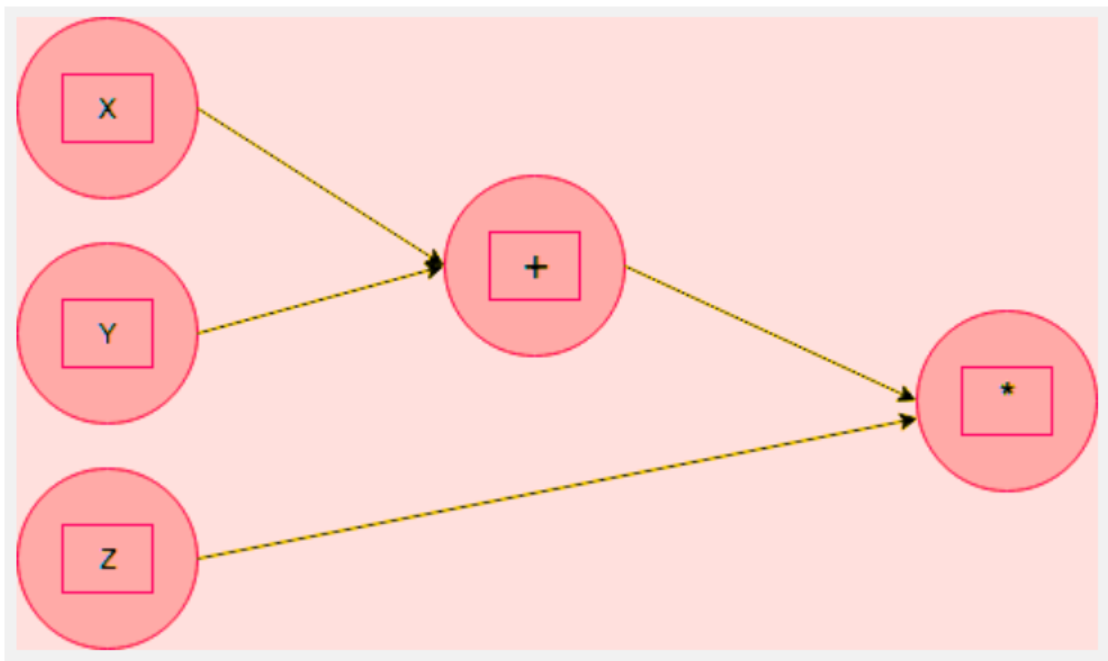


The flow of data starts with the input nodes \(x\), \(y\), and \(z\), and the result is passed through function nodes (addition and multiplication) to compute the final output.

#### Why Do We Need Computational Graphs?

When working with large deep learning models, the number of nodes and edges in a computational graph can grow exponentially. For instance, deep neural networks with millions of parameters can be represented by graphs containing millions of nodes and edges. A direct calculation of such a graph would be impractical. Computational graphs provide a structured way to break down complex functions into manageable parts and facilitate efficient computation, especially for operations like backpropagation.

#### Backpropagation and Computational Graphs

One of the key benefits of computational graphs is their ability to describe backpropagation. In deep learning, backpropagation is the method used to update the weights of the network during training. It relies on computing the gradients of the loss function with respect to the weights of the network, which can be efficiently done using the chain rule in calculus.

By representing the computations in a graph, each node’s contribution to the final output is clear, and gradients can be computed using the chain rule, moving backward through the graph.

#### Python Implementation with Dask

To implement computational graphs in Python, one popular library is **Dask**, which allows for parallel computing and handling of large datasets. Dask can be used to create and evaluate computational graphs efficiently.

```python
import dask.array as da
import numpy as np

# Create some Dask arrays (representing nodes in the graph)
x = da.from_array(np.array([1, 2, 3]), chunks=1)
y = da.from_array(np.array([4, 5, 6]), chunks=1)

# Define the graph of operations
z = (x + y) * 2

# Compute the result
z.compute()
```

**Conclusion**

> Computational graphs are foundational to deep learning. They offer an intuitive way to represent complex functions and enable efficient computation and backpropagation. Python, with libraries like Dask, provides a powerful way to implement these graphs for both small-scale and large-scale deep learning tasks.


In [ ]:
!pip install dask

In [ ]:
import dask.array as da
import numpy as np

# Create some Dask arrays (representing nodes in the graph)
x = da.from_array(np.array([1, 2, 3]), chunks=1)
y = da.from_array(np.array([4, 5, 6]), chunks=1)

# Define the graph of operations
z = (x + y) * 2

# Compute the result
z.compute()

array([10, 14, 18])

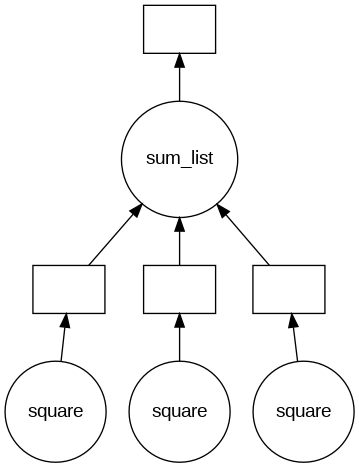

In [ ]:
from dask import delayed, compute
import dask

@delayed
def square(num):
    print(f"Square function called with: {num}")
    return num * num

@delayed
def sum_list(args):
    print(f"Sum_list function called with: {args}")
    return sum(args)

# List of items
items = [1, 2, 3]

# Building the computation graph
computation_graph = sum_list([square(i) for i in items])

# Visualizing the computation graph and saving it to a file
  # computation_graph.visualize(filename='dask_computation_graph.png')
computation_graph.visualize()




In [ ]:
# Execute the computation
result = computation_graph.compute()

# Print the result of the computation
print(f"Result: {result}")

Square function called with: 2
Square function called with: 3
Square function called with: 1
Sum_list function called with: [1, 4, 9]
Result: 14


#### 8.2.2.2 Dynamic Deep Learning Python Computational Graphs

In deep learning, **dynamic computational graphs** (DCGs) offer a more flexible and powerful way of handling data during training and inference compared to traditional static graphs. Static graphs are predefined and fixed, but dynamic graphs allow for the construction and modification of operations at runtime, offering greater flexibility when working with complex and varying data.

##### **Challenges with Static Computational Graphs**
Static graphs require that the structure of the model, including operations and layers, is predefined. This becomes problematic when the input data varies in size, shape, or type. For instance, in Natural Language Processing (NLP) tasks or when dealing with sequences of varying lengths, static graphs struggle to adapt. **Dynamic computational graphs** overcome these limitations by allowing operations to be defined on the fly during execution.

#### Dynamic Computational Graphs in Deep Learning
A **dynamic computational graph** allows operations to be added to the graph at runtime. This approach is useful for:
1. **Variable Input Shapes**: Data like images, text, or time-series data may have varying dimensions. Dynamic graphs can adapt to these changes.
2. **Variable Model Structure**: Dynamic graphs enable easy changes to the model architecture during training, such as adding/removing layers or switching activation functions.
3. **Flexible Operations**: With dynamic graphs, complex or custom operations can be dynamically inserted into the model, making the system more versatile.

##### **Key Concepts of Dynamic Computational Graphs**
1. **Mutable Graph**: A DCG can be changed during execution, allowing for operations to be added or removed as needed.
2. **Runtime Construction**: Operations are defined and computed as the program runs, which makes debugging easier and improves flexibility.
3. **Control Flow**: Dynamic graphs allow for control flow operations such as loops and conditional branches to be incorporated directly into the graph. This is essential for handling tasks like sequence generation or reinforcement learning.

#### Benefits of Dynamic Graphs
1. **More Intuitive Debugging**: Since the graph is built at runtime, errors can be traced and fixed immediately without waiting for the entire graph to be built and compiled beforehand.
2. **Ease of Experimentation**: Dynamic graphs make it easier to experiment with different network architectures and training strategies without having to redefine the entire computational graph every time.
3. **Better Memory Management**: As computations are defined and executed on the fly, memory usage can be optimized during the runtime process, which is particularly useful for large-scale models.


##### Example of Dynamic Computational Graph in Deep Learning (Python)
Python deep learning frameworks like **PyTorch** and **TensorFlow 2.0** are built to work with dynamic computational graphs. In PyTorch, this is referred to as **define-by-run**. Below is a basic example of dynamic graph usage in PyTorch:


In [ ]:
import torch
import torch.nn as nn

# Define a simple dynamic neural network
class DynamicNet(nn.Module):
    def __init__(self):
        super(DynamicNet, self).__init__()
        self.fc1 = nn.Linear(10, 20)
        self.fc2 = nn.Linear(20, 30)
        self.fc3 = nn.Linear(30, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # Output layer
        return x

# Create a model instance
model = DynamicNet()

# Sample input (random tensor)
input_data = torch.randn(5, 10)  # 5 samples, each with 10 features

# Forward pass (dynamic graph)
output = model(input_data)
print(output)

tensor([[-0.3141],
        [-0.2077],
        [-0.3058],
        [-0.2423],
        [-0.2374]], grad_fn=<AddmmBackward0>)


In this example:

- The graph is constructed dynamically as the input flows through the layers of the network.
- Each call to `model(input_data)` triggers the construction of a new graph specific to the input.

##### **Forward and Backward Propagation in Dynamic Computational Graphs**

**Forward Propagation**: In DCGs, forward propagation involves computing the output by passing the input data through the nodes (layers). Since the graph is built dynamically, each layer’s output is computed in real-time based on the current input.

**Backward Propagation**: In backward propagation, gradients are calculated starting from the output node and flowing back towards the input nodes. Since the graph is dynamic, the backward pass is also computed in real-time, adjusting the model parameters based on the computed gradients.


### Conclusion

Dynamic Computational Graphs are a powerful concept in deep learning, offering flexibility for handling diverse data types and model architectures. Their ability to modify and optimize the graph during runtime allows for easier experimentation, better memory management, and more efficient debugging. Frameworks like PyTorch leverage this concept to make deep learning model development more intuitive and efficient.

Dynamic graphs are essential for tasks that require runtime flexibility, such as in NLP, Reinforcement Learning, and complex networks with variable input data. They are an important aspect of building modern deep learning systems.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Simple model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(5, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create model, loss function, and optimizer
model = SimpleNN()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Sample input and target
input_data = torch.randn(1, 5)
target = torch.randn(1, 1)

# Forward pass (Dynamic graph)
output = model(input_data)
loss = loss_fn(output, target)

# Backward pass
loss.backward()

# Update model parameters
optimizer.step()

# Print the loss and parameters
print(f"Loss: {loss.item()}")
print(f"Model parameters: {list(model.parameters())}")


Loss: 8.385626792907715
Model parameters: [Parameter containing:
tensor([[ 0.1876, -0.3631, -0.3608,  0.2603, -0.1266],
        [ 0.2349,  0.0924, -0.2603, -0.3918, -0.3538],
        [ 0.0870,  0.2544,  0.1471, -0.0971, -0.3887],
        [ 0.3286,  0.0400,  0.3969,  0.1859, -0.0560],
        [-0.3705, -0.0511,  0.2634,  0.0737,  0.2871],
        [-0.4104,  0.0423, -0.2206, -0.2005,  0.1454],
        [-0.4416,  0.0876,  0.2445, -0.0466, -0.1985],
        [ 0.1316,  0.1847,  0.1073,  0.0908, -0.1142],
        [-0.0603,  0.3215, -0.3193, -0.0961,  0.3136],
        [-0.4247, -0.1106, -0.1560,  0.1546,  0.2622]], requires_grad=True), Parameter containing:
tensor([-0.2097, -0.1446, -0.0541, -0.4285,  0.3048,  0.2141,  0.1232,  0.0104,
        -0.0757,  0.3837], requires_grad=True), Parameter containing:
tensor([[-0.3073,  0.0017, -0.1877,  0.1458,  0.2614,  0.1830,  0.2417,  0.2960,
          0.3040,  0.3287]], requires_grad=True), Parameter containing:
tensor([0.1632], requires_grad=True)]



#### 8.2.2.3 The Point of Deep Learning Frameworks

Deep learning frameworks like **TensorFlow**, **PyTorch**, and even **NumPy** (to an extent) work with computational graphs to facilitate automatic differentiation and optimization. The purpose of using computational graphs is to:

- **Efficiently manage complex operations**: Neural networks involve large numbers of operations on data (such as matrix multiplication, activation functions, etc.), and computational graphs help manage these operations in a way that can be optimized for performance.
  
- **Automatic Differentiation**: The ability to compute gradients automatically is a key feature of deep learning. By maintaining a computational graph, frameworks can keep track of the operations and compute derivatives during backpropagation without manual intervention.
  
- **Optimization**: Frameworks use computational graphs to optimize the execution order of operations, minimize redundant computations, and leverage hardware acceleration (e.g., using GPUs and TPUs) to speed up training.

- **Modularity and Flexibility**: Deep learning models are often composed of multiple layers and operations. Computational graphs allow developers to build, modify, and extend models in a modular way while ensuring that the underlying computations are correctly managed.



#### 8.2.2.4 Computational Graphs (NumPy vs TensorFlow vs PyTorch)

##### 1. **NumPy** (Traditional Computation with Arrays)
- **NumPy** does not inherently use computational graphs like TensorFlow or PyTorch. Instead, it provides a framework for performing numerical operations on **arrays** (n-dimensional tensors). Operations in NumPy are executed immediately (eager execution), meaning that calculations are carried out when the operation is called.
  
- **Manual Gradient Computation**: Since NumPy does not have an automatic differentiation feature, gradients must be manually computed, which can be cumbersome when dealing with complex neural networks. For deep learning tasks, developers often have to implement their own backpropagation methods or rely on additional libraries to compute gradients.
  
- **No Computational Graphs**: In NumPy, each operation is evaluated immediately, and no graph structure is built to optimize or manage dependencies. This makes it less suited for large-scale machine learning or deep learning models where backpropagation and gradient descent are essential.

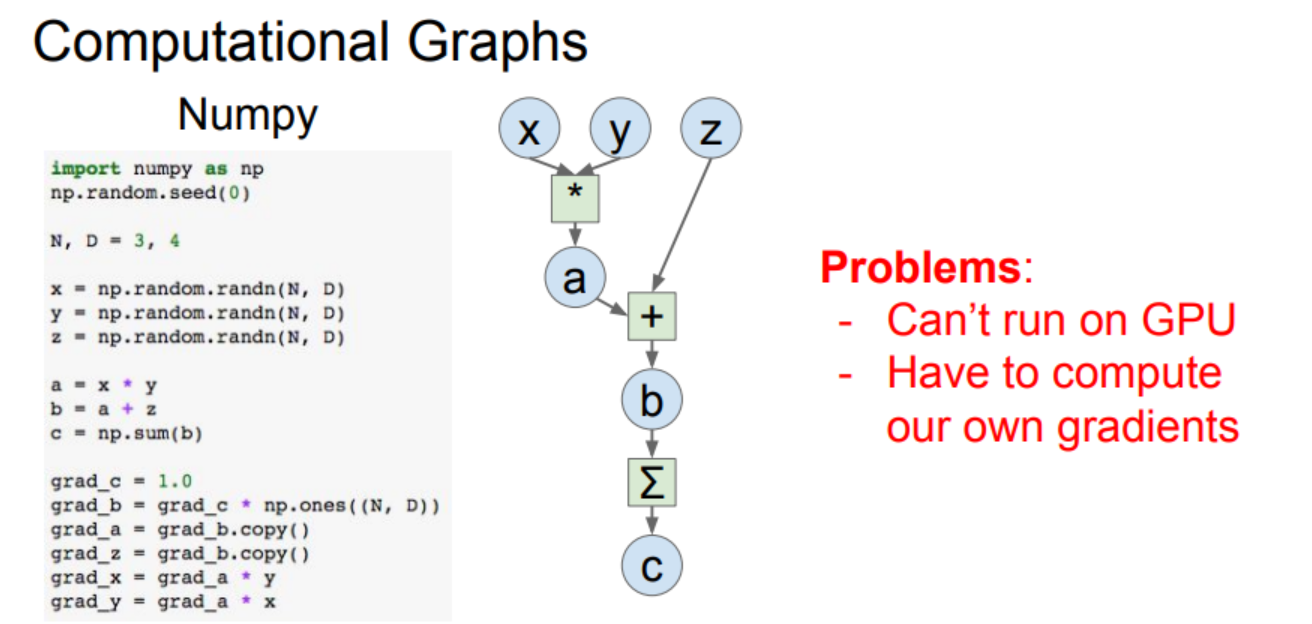

##### 2. **TensorFlow** (Static Computational Graphs)
- **TensorFlow** primarily uses a **static computational graph**. In this model, the computational graph is defined first (as a graph of operations), and then the framework performs the computation in a separate session. This is known as **graph-based execution**.

- **Graph Definition and Execution**: In TensorFlow 1.x, you would first define the operations and build the graph (e.g., matrix multiplications, activation functions) and then feed data into the graph during a session. In TensorFlow 2.x, however, eager execution is enabled by default, but you can still define and execute a graph using **`tf.function`** to optimize performance.

- **Automatic Differentiation**: TensorFlow builds a computational graph in the background, tracking all operations on tensors. When it’s time to compute gradients for backpropagation, TensorFlow traverses the graph and computes the derivatives automatically.

- **Optimizations**: TensorFlow leverages the computational graph to optimize operations, fuse computation steps, and deploy on specialized hardware like GPUs and TPUs. The graph structure enables optimizations like operation reordering, memory management, and parallelization of tasks.

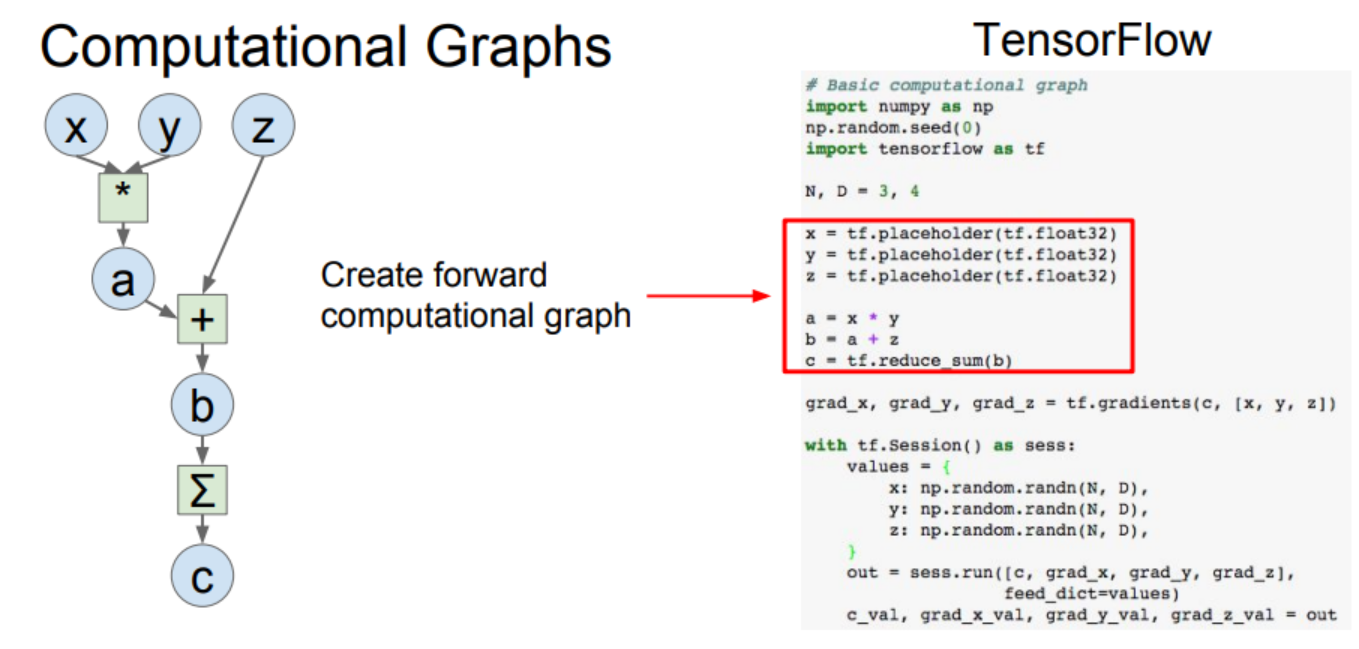

##### 3. **PyTorch** (Dynamic Computational Graphs)
- **PyTorch** uses a **dynamic computational graph**, often referred to as **define-by-run**. In PyTorch, the computational graph is built dynamically as operations are executed, meaning the graph is created on the fly as the data flows through the network.

- **Dynamic Graph Building**: This dynamic nature allows more flexibility compared to static graphs, as the graph is created during each forward pass. This is particularly useful for models with variable-length input data or architectures that change during training.

- **Eager Execution by Default**: Unlike TensorFlow (before v2.x), PyTorch executes operations immediately (eager execution), and the graph is constructed as operations are run. This is beneficial for debugging since the developer can easily inspect intermediate results during execution.

- **Automatic Differentiation**: PyTorch's **Autograd** module automatically tracks operations on tensors and constructs the computational graph for differentiation. The framework then computes gradients during backpropagation without needing to manually specify the derivatives.

- **Optimizations**: Since PyTorch constructs the computational graph dynamically, the optimization process occurs during runtime. PyTorch also supports optimization techniques for GPU usage, making it efficient for large-scale deep learning applications.

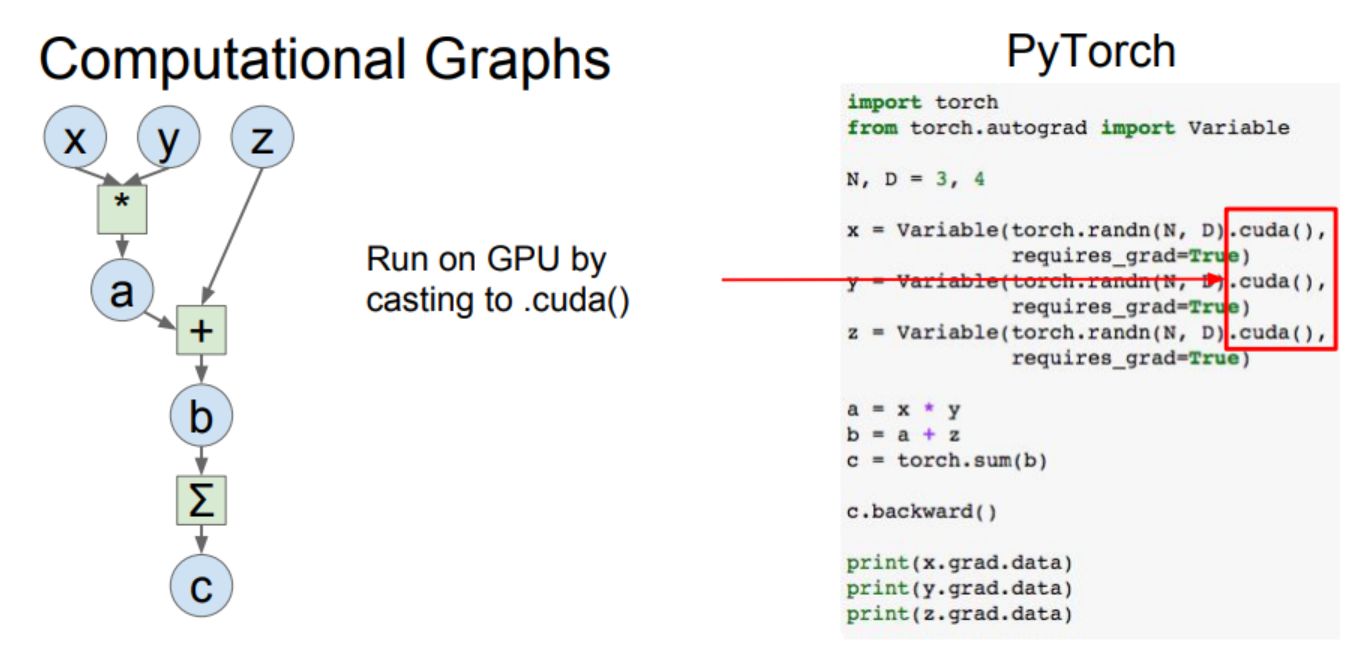

##### Key Differences:

| Feature               | **NumPy**              | **TensorFlow**                | **PyTorch**                   |
|-----------------------|------------------------|-------------------------------|-------------------------------|
| **Graph Type**        | No computational graph | Static (TensorFlow 1.x)        | Dynamic (Define-by-run)        |
| **Eager Execution**   | Yes                    | Yes (TensorFlow 2.x)          | Yes                           |
| **Automatic Differentiation** | No                | Yes                           | Yes                           |
| **Optimization**      | Manual                 | Optimized via graph execution | Optimized during runtime       |
| **Suitability for Deep Learning** | Not ideal       | Suitable (but less flexible)  | Ideal for research and dynamic models |
| **Hardware Acceleration** | Limited             | Supports GPUs, TPUs           | Supports GPUs                  |

### Conclusion

- **NumPy** is mainly used for numerical computing but does not offer built-in support for deep learning tasks, automatic differentiation, or optimized graph execution.
  
- **TensorFlow** employs a static computational graph, which is optimized for performance in production environments but less flexible for debugging or dynamic models. TensorFlow 2.x introduced eager execution, which bridges the gap between static and dynamic graphs.
  
- **PyTorch** provides a dynamic computational graph, making it more flexible and user-friendly, especially for research and rapid prototyping. It excels in applications that require dynamic model structures or variable-length input data, such as in natural language processing and real-time tasks like autonomous driving.

In summary, while **NumPy** is suitable for basic numerical tasks, **TensorFlow** and **PyTorch** are the better options for deep learning tasks, with **TensorFlow** being more optimized for production environments and **PyTorch** offering greater flexibility for research and development.


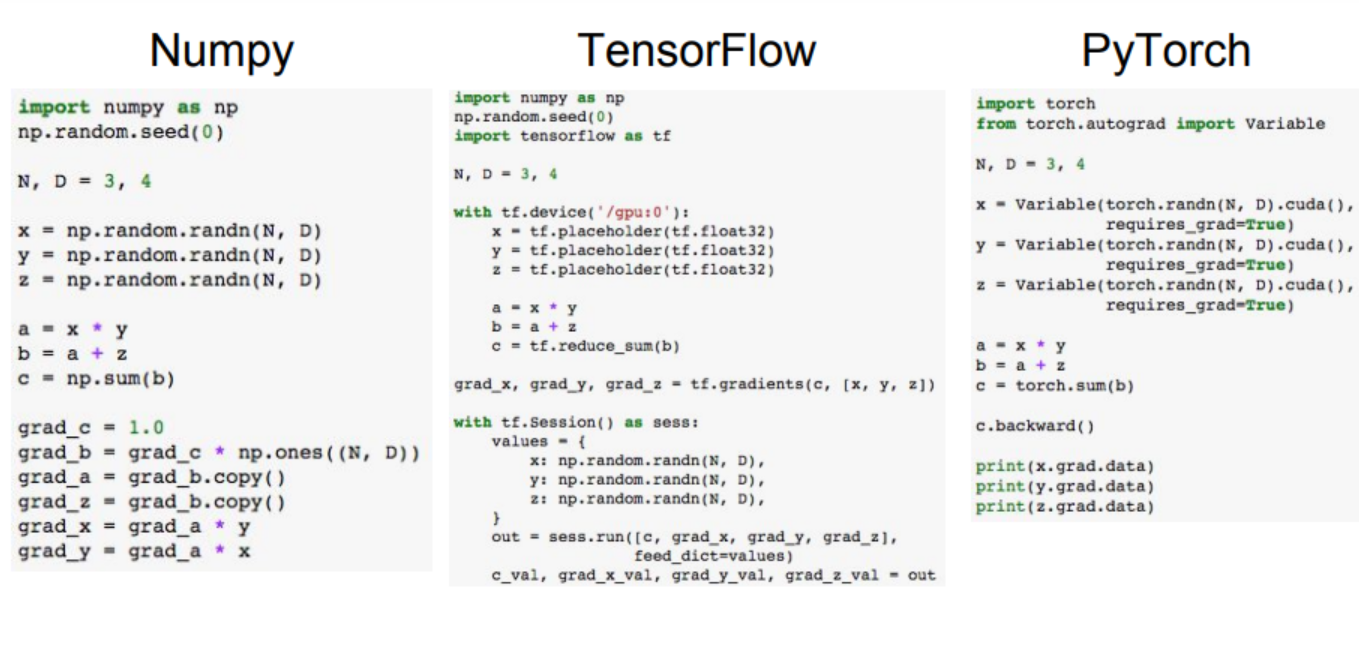

| Feature                       | **NumPy**                         | **TensorFlow**                   | **PyTorch**                      |
|-------------------------------|-----------------------------------|----------------------------------|----------------------------------|
| **Graph Type**                | No computational graph           | Static graph (TensorFlow 1.x)    | Dynamic graph (define-by-run)    |
| **Eager Execution**           | Yes                               | Yes (TensorFlow 2.x)             | Yes                              |
| **Automatic Differentiation** | No                                | Yes                              | Yes                              |
| **Optimization**              | Manual                            | Optimized via graph execution    | Optimized during runtime         |
| **Suitability for Deep Learning** | Not suitable                    | Suitable for production, less flexible | Ideal for research, flexible for experimentation |
| **Hardware Acceleration**     | Limited (CPU only)                | Supports GPUs and TPUs           | Supports GPUs                    |
| **CPU/GPU Weight Copying**    | No support for GPU operations     | TensorFlow 1.x: Can be inefficient at copying weights; TensorFlow 2.x improved this | PyTorch: Efficient GPU/CPU transitions, better handling of weight copying |
| **Loss Not Going Down**       | Not applicable to deep learning   | Can be caused by improper graph execution or optimizer settings; easier to debug with `tf.function` | Often due to improper model design or learning rate settings; dynamic graphs make debugging easier |
| **Model Debugging**           | Simple but manual debugging      | Harder to debug due to static graph; easier with eager execution in TF 2.x | Easier due to dynamic graph and eager execution |
| **Training Speed**            | Slow, no GPU support              | Fast with optimized graph execution on GPUs/TPUs | Fast with GPU support, optimized runtime |
| **Memory Management**         | Manual management                 | Automatic memory management with graph optimization | Automatic memory management, dynamic adjustments |
| **Parallelization**           | Manual parallelization            | Built-in parallelism for GPUs/TPUs | Built-in support for multi-GPU parallelism |

##### 8.2.2.4.1 Key Concepts in PyTorch

###### 1. PyTorch Tensors
PyTorch Tensors are the core building blocks for numerical computations in PyTorch. They are similar to NumPy arrays but with the added advantage of GPU acceleration and support for automatic differentiation. Key features include:
- **GPU Acceleration**: Tensors can be moved between CPU and GPU using `.cuda()` or `.to(device)`, enabling fast computation on GPUs.
- **Enhanced Operations**: Tensors support a variety of in-place operations, broadcasting, and complex mathematical functions, offering flexibility for different types of computations.
- **Custom Backends**: PyTorch now supports integration with custom tensor backends, which can be used to implement specialized hardware accelerators beyond GPUs.

###### 2. Variable and Tensor Merge
In earlier versions of PyTorch, `Variable` and `Tensor` were distinct, with `Variable` being used for tracking gradients. Starting from version 0.4, these two were merged into a single class:
- Now, a **Tensor** can track gradients when `requires_grad=True`, eliminating the need for a separate `Variable` class.

###### 3. Autograd: Automatic Differentiation
PyTorch's automatic differentiation system, **autograd**, is integral to training neural networks. Enhancements include:
- **Custom Gradient Functions**: Users can now define custom gradient operations using `torch.autograd.Function` for more control over the backward pass.
- **Mixed Precision Training**: PyTorch supports **automatic mixed precision (AMP)**, using lower-precision floating-point formats to speed up training while maintaining accuracy.

###### 4. `nn.Module`: Building Neural Networks
The `nn.Module` class provides a high-level API for defining neural networks, with significant improvements:
- **Expanded Layers and Architectures**: PyTorch now includes support for advanced layers like **Transformers**, **LSTMs**, **GRUs**, and more, facilitating the development of complex models.
- **Parameter Management**: `nn.Module` automatically tracks model parameters (weights, biases) and supports utilities for saving/loading models efficiently.
- **TorchScript**: PyTorch models can be serialized using **TorchScript**, enabling deployment in non-Python environments such as C++.

###### 5. Optimizers and `torch.optim`
PyTorch’s optimizer package has been improved, offering more features and better efficiency:
- **Advanced Optimizers**: Optimizers like Adam, SGD, and RMSprop now support features like learning rate scheduling, weight decay, and more.
- **Fused Optimizers**: For large models (e.g., transformers), PyTorch includes fused optimizers that combine multiple operations for better computational efficiency.

###### 6. DataLoaders and Datasets
The `DataLoader` and `Dataset` classes have become more flexible and efficient:
- **Multi-Process Data Loading**: PyTorch allows data loading with multiple processes, improving performance on multi-core CPUs.
- **Custom Datasets**: Writing custom `Dataset` classes for specific tasks like image, text, or audio processing is now more streamlined and efficient.
- **Data Augmentation**: PyTorch provides built-in tools for data augmentation, especially through the **torchvision** library, enhancing model generalization.

###### 7. Pretrained Models
Pretrained models are now even more accessible through libraries like `torchvision` and are widely used for transfer learning. These models serve as excellent starting points and can be easily fine-tuned for specific tasks.

###### 8. PyTorch for Mobile and Deployment
PyTorch has made significant advancements in model deployment:
- **PyTorch Mobile**: PyTorch now supports optimized implementations for deploying models on mobile devices (Android and iOS), enabling on-device inference.
- **ONNX Support**: PyTorch can export models to the **ONNX (Open Neural Network Exchange)** format, facilitating interoperability between different frameworks (e.g., TensorFlow, Caffe2).
- **JIT Compilation**: PyTorch’s **Just-In-Time (JIT) compilation** optimizes models for deployment, enabling high-performance inference even in non-Python environments like C++.

###### 9. PyTorch vs. TensorFlow
PyTorch has gained significant traction due to its intuitive design and dynamic computation graph, offering advantages over other frameworks like TensorFlow:
- **Debugging**: PyTorch’s integration with Python’s debugger makes it easier to inspect and modify models during development.
- **Dynamic Computation Graph**: PyTorch’s dynamic graph is more flexible compared to TensorFlow’s static graph (prior to TensorFlow 2.0).
- **Community Adoption**: PyTorch has seen rapid adoption, especially in academia, with more research papers and contributions.

###### 10. Visualization Tools
While **Visdom** was initially introduced for visualizing PyTorch models, other tools like **TensorBoard** and **Weights & Biases** are now more commonly used for tracking training performance and visualizations.


##### 8.2.2.4.2 Static Graphs VS Dynamic Graphs

##### **1. TensorFlow: Static Graphs vs PyTorch: Dynamic Graphs**

- **TensorFlow (Static Graphs)**: In TensorFlow, you define the computational graph **once**, and then execute it multiple times. This static nature allows TensorFlow to optimize the graph ahead of time before execution, making it more efficient. The graph is built outside the code and runs after being compiled. This is often referred to as a "static graph" because it doesn’t change during execution.

- **PyTorch (Dynamic Graphs)**: In contrast, PyTorch builds the computation graph dynamically. Every time you run a forward pass, a new computational graph is created, allowing for more flexibility. This is called "define-by-run" as the graph is built as operations are performed. It enables easier debugging and modification of the graph since it behaves like normal Python code.



##### **2. Static vs Dynamic: Optimization**

- **Static Graph Optimization**:
   In static graphs, since the framework knows the entire computation graph ahead of time, it can perform optimizations **before execution**. For instance:
   - **Fusion of operations**: If you have repeated operations, like a sequence of `Conv` followed by `ReLU`, a static graph framework can optimize this by fusing operations together, reducing overhead.
   - Example:
     - **Before Optimization**:
       ```
       Conv -> ReLU -> Conv -> ReLU -> Conv -> ReLU
       ```
     - **After Optimization**:
       ```
       Conv+ReLU -> Conv+ReLU -> Conv+ReLU (fused operations)
       ```
   - This fusion reduces the computational load and memory usage by simplifying the execution.

- **Dynamic Graph Optimization**: Since the graph in PyTorch is built at runtime, optimizations cannot be performed ahead of time in the same way as static graphs. However, this dynamic nature offers flexibility, allowing the graph to adapt to changes during execution.


##### **3. Static vs Dynamic: Serialization**

- **Static Graph Serialization**:
   Once the static graph is built in TensorFlow, you can **serialize** it and execute it without needing the original Python code that created the graph. This is useful for deploying models in production or on devices where Python might not be available.
   
- **Dynamic Graph Serialization**:
   In PyTorch, because the graph is intertwined with the Python code (dynamic), you always need the code that builds the graph in order to execute it. This makes PyTorch models harder to serialize and deploy in non-Python environments, though there are tools like **TorchScript** to overcome this challenge.


##### **4. Static vs Dynamic: Conditional Operations**

- **TensorFlow (Static)**: TensorFlow requires the use of **special operators** (e.g., `tf.cond`) for conditional operations. Since the graph is static, it must define all possible operations, including conditionals, ahead of time. This can make conditionally executed parts of the graph more complex to manage.
  
- **PyTorch (Dynamic)**: PyTorch allows **normal Python control flow**, such as `if` and `else`, within the computation graph. The graph is built dynamically, so the conditional logic is executed naturally as part of the Python code. This makes it more intuitive and easier to debug.

Example:
```python
if z > 0:
    y = w1 * x
else:
    y = w2 * x
```

**Conditional Operations**
This would run seamlessly in **PyTorch**, whereas in **TensorFlow**, you would have to use TensorFlow-specific control flow mechanisms like `tf.cond`.


##### **5. Static vs Dynamic: Loops**

- **TensorFlow (Static)**: In TensorFlow, loops and recurrence are handled using special control flow operators, such as `tf.while_loop`. This is because the graph is defined statically, and the loop must be accounted for ahead of time in the graph definition.

- **PyTorch (Dynamic)**: In PyTorch, loops can be implemented with regular Python loops, making them more intuitive and easier to debug. For instance, a simple loop in PyTorch would look like:
  ```python
  for t in range(1, T):
      y[t] = (y[t-1] + x[t]) * w
```
This allows for greater flexibility and makes PyTorch code more "Pythonic."


##### **6. Dynamic Graphs in TensorFlow**

While TensorFlow primarily used static graphs, **TensorFlow Fold** (a library introduced in 2017) made dynamic graphs easier in TensorFlow. This library, for example, supports **dynamic batching**, allowing TensorFlow to adapt more easily to inputs of varying sizes and shapes. This was a significant step toward incorporating more dynamic behavior in TensorFlow, albeit still within the framework's primarily static paradigm.


### Summary Comparison

| **Feature**           | **TensorFlow (Static Graphs)**                 | **PyTorch (Dynamic Graphs)**            |
|-----------------------|-----------------------------------------------|-----------------------------------------|
| **Graph Building**     | Build graph once, then execute multiple times | Build graph dynamically during execution |
| **Optimization**       | Can optimize graph before execution           | Optimizations happen during execution   |
| **Serialization**      | Can serialize and execute without the code    | Code must always be available for execution |
| **Conditionals**       | Requires special control flow operators       | Uses standard Python control flow       |
| **Loops**              | Requires special control flow operators       | Uses standard Python loops              |
| **Flexibility**        | Less flexible, but optimized for performance  | More flexible, easier to debug          |


##### 8.2.2.4.3 Serialization vs Parallelization

**Serialization** and **Parallelization** are two fundamental concepts in machine learning frameworks, often influencing how models are deployed and how computations are handled during training.

---

**Serialization** refers to the process of saving a model or computation graph for later use, typically for inference. This allows the trained model to be stored and reused without needing the original code that built the graph. Serialization is useful for model deployment, where the model can be loaded and executed without needing to rebuild the entire computation graph each time.

- **TensorFlow** can serialize the entire static computation graph, making it possible to save the model and later load it for inference.
- **PyTorch**, which uses dynamic computation graphs, typically requires the code to be kept alongside the model for execution, though it also provides **TorchScript** to serialize models for later use.

---

**Parallelization** involves dividing a task into smaller sub-tasks and executing them simultaneously across multiple processors or devices. This is particularly useful in training deep learning models, where computations can be very intensive. By using parallelization, frameworks can leverage multiple GPUs or even distributed machines to speed up the computation.

- **TensorFlow** supports parallelization across multiple GPUs or machines, which can be managed manually or automatically by the framework.
- **PyTorch** also supports parallelization, particularly through **DataParallel** and **DistributedDataParallel**, which enable training on multiple GPUs.

---

### Key Differences

| **Aspect**            | **Serialization**                             | **Parallelization**                             |
|-----------------------|-----------------------------------------------|------------------------------------------------|
| **Definition**         | Saving a model or graph for future use        | Splitting a task to run simultaneously on multiple devices |
| **Purpose**            | For model deployment and inference            | To speed up training or processing by using multiple devices |
| **Framework**          | TensorFlow (static graphs), PyTorch (TorchScript) | TensorFlow (multi-GPU support), PyTorch (DataParallel) |
| **Usage**              | Model saving/loading without code             | Model training or inference across multiple GPUs or machines |
| **Example Use Case**   | Saving a trained model for inference          | Training a model faster by distributing computation across GPUs |

---

**Conclusion**:  
- **Serialization** is focused on saving and restoring models or computations for later use.  
- **Parallelization** is focused on optimizing performance by executing tasks concurrently, especially during training.  

Both concepts play crucial roles in machine learning, contributing to **efficient deployment** (serialization) and **performance optimization** (parallelization).


In [ ]:
"""
TensorFlow (Static Graphs):
Save and load a trained model graph without needing the original Python code.
"""
# TensorFlow example
import tensorflow as tf

# Save model
model.save("saved_model")

# Load model for inference
loaded_model = tf.saved_model.load("saved_model")


"""
PyTorch (Dynamic Graphs):
Using TorchScript to serialize the model.
"""

import torch
import torch.nn as nn

class SimpleModel(nn.Module):
    def forward(self, x):
        return x * 2

# Create a model
model = SimpleModel()

# Convert model to TorchScript for serialization
scripted_model = torch.jit.script(model)

# Save the scripted model
scripted_model.save("simple_model.pt")

# Load the model
loaded_model = torch.jit.load("simple_model.pt")


In [ ]:
"""
TensorFlow (Static Graphs):
Distribute the workload across multiple GPUs.
"""
# TensorFlow example for multiple GPUs
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(32,)),
        tf.keras.layers.Dense(10)
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


"""
PyTorch (Dynamic Graphs):
Using DataParallel to use multiple GPUs.
"""
import torch
import torch.nn as nn

# Simple model
class SimpleModel(nn.Module):
    def forward(self, x):
        return x * 2

# Instantiate the model
model = SimpleModel()

# Check if multiple GPUs are available and parallelize the model
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)

model = model.cuda()


# **9.CNN Architectures**
---



## **9.1 Overview of Popular CNN Architectures**

### Key Highlights:
1. **LeNet**:
   - Early CNN architecture.
   - Utilizes simple convolutional and pooling layers.
   - Designed for digit recognition tasks.

2. **AlexNet**:
   - Popularized deep learning.
   - Introduced ReLU activation and dropout layers.
   - Effective for large-scale image classification.

3. **VGG**:
   - Employs small filters (3x3) with deep architectures.
   - Known for uniform design and simplicity.

4. **ResNet**:
   - Introduced residual connections to combat vanishing gradients.
   - Supports very deep networks (e.g., ResNet-50, ResNet-101).

5. **Inception**:
   - Combines filters of multiple sizes in parallel.
   - Emphasizes efficient computation using bottleneck layers.

   ![](https://miro.medium.com/v2/resize:fit:828/format:webp/0*vb72NzJrSMxQZ7j9)


### **9.1.1 Early Beginnings of Convolutional Neural Networks**

### **9.1.1.1 Neocognitron (1980)**
- Proposed by Kunihiko Fukushima as an early model of a hierarchical neural network.
- Inspired by the visual cortex structure, it introduced concepts of feature extraction and hierarchical pattern recognition.
- Marked the beginning of convolution-like operations for image processing.

### **9.1.1.2 LeNet-5 (1998)**
- Developed by Yann LeCun for digit recognition (e.g., MNIST dataset).
- First practical CNN architecture:
  - **Components**: Convolutional layers, pooling layers, and fully connected layers.
  - Efficient for small-scale tasks like digit and character recognition.
- Established the foundational structure of modern CNNs.




### **9.1.2 CNNs in the Deep Learning Era**

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*LeK_gmCf3DfO3gj_.jpeg)

### **9.1.2.1 AlexNet (2012)**
- Introduced by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton.
- Won the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2012, significantly outperforming traditional machine learning methods.
- Innovations:
  - ReLU activation for non-linearity.
  - Dropout for regularization.
  - GPU acceleration for training.
- Marked the resurgence of deep learning in computer vision.

### **9.1.2.2 ZFNet (2013)**
- Refinement of AlexNet, proposed by Zeiler and Fergus.
- Improved performance by visualizing learned features and tuning hyperparameters.
- Showcased the importance of understanding feature maps and receptive fields.

### **9.1.2.3 VGG (2014)**
- Developed by the Visual Geometry Group at Oxford.
- Key Features:
  - Uniform architecture with small filters (3x3).
  - Deep structures (16 or 19 layers).
- Advantage: Simplicity and depth, leading to enhanced feature representation.




### **9.1.3 Innovations in Model Efficiency and Depth**

### **9.1.3.1 GoogleNet/Inception (2014)**
- Introduced by Google with the Inception module.
- Efficient design:
  - Parallel convolution layers of varying sizes (e.g., 1x1, 3x3, 5x5).
  - Bottleneck layers for reducing computational cost.
- Achieved state-of-the-art performance with fewer parameters.

### **9.1.3.2 ResNet (2015)**
- Developed by Microsoft Research.
- Introduced residual connections to address the vanishing gradient problem.
- Enabled training of extremely deep networks (e.g., ResNet-50, ResNet-101).
- Revolutionized deep learning by demonstrating the benefits of very deep architectures.

### **9.1.3.3 DenseNet (2016)**
- Proposes dense connectivity:
  - Each layer receives inputs from all preceding layers.
  - Improves feature reuse and gradient flow.
- Achieves efficient parameter utilization.




### **9.1.4 Advances in Specialized Applications**

### **9.1.4.1 Computer Vision Tasks**
- **Object Detection**: Faster R-CNN, YOLO, and SSD leverage CNNs for real-time object localization and detection.
- There are **multiple versions of YOLO** (YOLOv1, v2, v3, and the latest being YOLOv4 and YOLOv5).
- **Image Segmentation**: U-Net and Mask R-CNN enable pixel-level segmentation for applications like medical imaging.
- **Style Transfer**: Neural Style Transfer techniques use CNNs to recreate artistic effects in images.

### **9.1.4.2 Generative Models**
- **Generative Adversarial Networks (GANs)**:
  - Introduced by Ian Goodfellow in 2014.
  - Combine a generator (often based on CNNs) and a discriminator to create realistic images and videos.
- **Autoencoders**:
  - Use CNNs to encode and decode images, enabling tasks like image reconstruction and denoising.




### **9.1.5 Recent Developments and Future Directions**

### **9.1.5.1 Vision Transformers (ViTs)**
- Emerging architectures are integrating CNN features with transformers for broader context awareness.

### **9.1.5.2 Generative Videos**
- CNNs, combined with GANs and RNNs, are increasingly used to generate realistic videos.
- Applications:
  - Deepfake generation.
  - Video frame prediction and interpolation.
  - Autonomous vehicle simulation environments.

### **9.1.5.3 Real-Time and Edge Applications**
- MobileNet and EfficientNet optimize CNNs for mobile and embedded systems.
- Focus on lightweight architectures for real-time processing.

### **9.1.5.4 AI-Driven Creativity**
- Tools like DALL-E and other generative AI systems expand the scope of CNNs to artistic video generation and virtual reality content creation.


### **9.1.6 Conclusion**
The evolution of CNNs from simple pattern recognition models to foundational tools in modern AI highlights their transformative impact. CNNs now power diverse applications, from computer vision to generative media, shaping the future of artificial intelligence.


| **Model**       | **Number of Layers** | **Number of Parameters** | **Model Size**    | **Efficiency**        | **Accuracy (Top-5)** | **Number of Filters** | **Types of Layers**                              | **Key Features**                                                                                  |
|-----------------|----------------------|--------------------------|-------------------|-----------------------|----------------------|-----------------------|--------------------------------------------------|---------------------------------------------------------------------------------------------------|
| **LeNet-5 (1998)** | 7                    | ~60k                     | Small             | Low                   | ~98.4% (MNIST)       | 6-10                  | Convolutional, Pooling, Fully Connected           | One of the earliest CNNs, designed for digit classification on small datasets like MNIST.          |
| **AlexNet (2012)** | 8                    | ~60 million               | Large             | Moderate              | 84.6% (ImageNet)     | 96-256                | Convolutional, Max-Pooling, Fully Connected, ReLU | First deep CNN that won ImageNet competition, introduced ReLU activation and GPU training.          |
| **ZFNet (2013)**  | 8                    | ~60 million               | Large             | Moderate              | 88.2% (ImageNet)     | 96-256                | Convolutional, Max-Pooling, Fully Connected       | Improvement on AlexNet with better visualization and optimization of features.                     |
| **VGG (2014)**    | 16-19                | ~138 million              | Very Large        | Low                   | 92.7% (ImageNet)     | 64-512                | Convolutional, Max-Pooling, Fully Connected       | Known for its deep architecture and use of small 3x3 filters, but with high computational cost.    |
| **GoogleNet (Inception) (2014)** | 22                   | ~6.8 million              | Moderate          | High                  | 93.3% (ImageNet)     | 32-256                | Convolutional, Inception modules, Pooling         | Introduced the inception module, using multiple filter sizes in parallel, and bottleneck layers.    |
| **ResNet (2015)** | 50-152               | ~25-60 million            | Moderate          | High                  | 96.4% (ImageNet)     | 64-2048               | Convolutional, Residual connections, Fully Connected | Introduced residual connections to train very deep networks without vanishing gradients.            |
| **DenseNet (2016)** | 121-201              | ~8-25 million             | Moderate to Large | High                  | 96.4% (ImageNet)     | 32-256                | Convolutional, Dense connections, Pooling         | Dense connections where each layer receives input from all previous layers, improving feature reuse.|
| **MobileNet (2017)** | 28                   | ~4-6 million              | Small             | Very High             | ~70% (ImageNet)      | 32-1024               | Depthwise Separable Convolutions, Convolutional     | Efficient architecture designed for mobile and edge devices, optimized for performance and size.    |
| **EfficientNet (2019)** | 8-8                | ~5.3 million              | Small to Moderate | Very High             | 97.0% (ImageNet)     | 32-1024               | Convolutional, Depthwise Separable Convolutions    | Optimizes model size, depth, and resolution using a compound scaling method.                       |
| **Vision Transformer (ViT) (2020)** | 12-24               | ~87 million               | Moderate to Large | Moderate              | 88.55% (ImageNet)    | N/A                   | Transformer, Self-Attention                        | Uses transformers for vision tasks, focusing on global context and long-range dependencies.         |
| **EfficientDet (2020)** | 8                    | ~3-6 million              | Small to Moderate | Very High             | 44.5% (COCO)         | 32-128                | Convolutional, Depthwise Separable, Fully Connected | Focused on object detection, with high efficiency and accuracy on mobile devices.                    |
| **YOLOv4 (2020)**  | 106                  | ~64 million               | Moderate          | High                  | 43.5% (COCO)         | 128-1024              | Convolutional, Fully Connected, Detection layers    | Focused on real-time object detection with excellent speed and accuracy balance.                    |


## 9.2 Filters in CNN Architectures

### Kernel or Filter or Feature Detectors

In a convolutional neural network (CNN), the **kernel** (also known as a **filter** or **feature detector**) is used to extract features from images. The kernel is a small matrix or filter that slides over the input image to detect specific features such as edges, corners, and textures.

**Formula for Output Size (after Convolution)**:  
**Output size = [i - k] + 1**  
Where:
- **i** = Size of the input (image).
- **k** = Size of the kernel (filter).

This formula tells you the size of the output after applying the kernel to the image. The kernel is typically smaller than the input image and moves across it, performing element-wise multiplication and summing up the results at each location.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*n7GQU2sA0Y8P72Yf.png)

### Stride

**Stride** is a parameter that determines how much the filter or kernel moves across the image during the convolution operation. If the stride is set to 1, the kernel moves one pixel at a time. If the stride is set to 2, the kernel will skip over 2 pixels.

**Formula for Output Size (after applying Stride)**:  
**Output size = [(i - k) / s] + 1**  
Where:
- **i** = Size of the input (image).
- **k** = Size of the kernel.
- **s** = Stride (the step size at which the kernel moves).

For example:
- If the input size is 7x7, the kernel is 3x3, and the stride is 2:
  - **Output size = [(7 - 3) / 2] + 1 = [4 / 2] + 1 = 2 + 1 = 3**
  - So, the output size would be 3x3.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*E52voKt51l-PRD-fKtWMSg.png)

### Padding

**Padding** refers to adding extra pixels around the edges of the image to preserve the image size after applying convolution. Padding helps avoid shrinking the image during multiple convolution operations. If padding is set to zero, the image shrinks with each convolution step. By adding padding, the original size of the image can be maintained, which is crucial for extracting low-level features without losing information at the borders.

**Formula for Output Size (after applying Padding and Stride)**:  
**Output size = [(i - k + 2p) / s] + 1**  
Where:
- **i** = Size of the input (image).
- **k** = Size of the kernel.
- **p** = Padding (the number of extra pixels added around the image).
- **s** = Stride.

Example:
- If the input size is 7x7, kernel is 3x3, padding is 1, and stride is 1:
  - **Output size = [(7 - 3 + 2(1)) / 1] + 1 = [7] + 1 = 8**
  - The output size would be 8x8 with padding of 1.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*voP_09Y6cK97GsHq.png)

### Pooling

**Pooling** is a technique in CNNs to downsample feature maps and reduce their spatial dimensions (height and width), while retaining the essential features. Pooling helps in making the model more invariant to small translations and reduces the computational load. The most common types of pooling are **Max Pooling** and **Average Pooling**.

In **Max Pooling**, the maximum value from each patch of the feature map is selected, while in **Average Pooling**, the average value of each patch is selected. Pooling reduces the spatial size and hence the number of parameters, which helps prevent overfitting.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*GTCHpY_vpITjdwx5Vt33HQ.png)

### Flatten

**Flattening** is the process of converting a 2-dimensional matrix (resulting from convolution and pooling layers) into a 1-dimensional vector. This operation is necessary to connect the convolutional layers with the fully connected layers for classification tasks. Flattening converts the extracted features into a single long vector that is fed into the fully connected layers for the final prediction or classification.

For example, if the feature map size after convolution and pooling is 4x4x64, flattening converts it into a vector of size **4 * 4 * 64 = 1024**.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*xz9SQ3YzE2LRaR-_qfbZ6w.png)

### Q1: What is the total number of parameters in this layer?

To calculate the **total number of parameters** in a convolutional layer, the formula is:

**Number of parameters = (K × K × C + 1) × F**

Where:
- **K** is the kernel size (height and width).
- **C** is the number of input channels (e.g., 3 for RGB images).
- **F** is the number of filters (kernels) in the layer.
- **+1** accounts for the bias term associated with each filter.

Example:
If a convolutional layer has:
- Kernel size: 3x3
- Input channels (C): 3 (RGB image)
- Number of filters (F): 64

The calculation would be:

**Number of parameters = (3 × 3 × 3 + 1) × 64 = (27 + 1) × 64 = 28 × 64 = 1792**

So, the total number of parameters in this layer would be **1792**.


![](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*n7GQU2sA0Y8P72Yf.png)

### Q2: What is the output volume size?

The **output volume size** (height, width, and depth) of a convolutional layer can be computed using the following formula:

**Output height = (Input height - K + 2P) / S + 1**  
**Output width = (Input width - K + 2P) / S + 1**  
**Output depth = F**

Where:
- **K** is the kernel size.
- **P** is the padding applied (if any).
- **S** is the stride (how much the filter moves at each step).
- **F** is the number of filters.

Example:
If:
- Input size is 32x32 (height and width).
- Kernel size is 3x3.
- Padding (P) is 1 (same padding).
- Stride (S) is 1.
- Number of filters (F) is 64.

The calculation would be:

**Output height = (32 - 3 + 2(1)) / 1 + 1 = 32**  
**Output width = (32 - 3 + 2(1)) / 1 + 1 = 32**  
**Output depth = 64**

Thus, the output volume size would be **32x32x64**.

### Q3: What is the number of parameters in this layer?

This question is similar to Q1, but it's asking for the number of parameters in a different context or layer. The formula remains the same as in Q1, where we calculate based on kernel size, input channels, and the number of filters used.

Example:
Let’s say a convolutional layer has:
- Kernel size: 5x5
- Input channels: 64
- Filters: 128

The number of parameters would be:

**Number of parameters = (5 × 5 × 64 + 1) × 128 = (1600 + 1) × 128 = 1601 × 128 = 205,888**

So, the total number of parameters in this layer would be **205,888**.



> Why the Input Size Doesn't Affect the Number of Parameters in a Convolutional Layer
 - The total number of parameters in a convolutional layer is determined by:
 - **Kernel size (K)**: Dimensions of the filter.
 - **Input channels (C)**: Number of input channels (e.g., 3 for RGB images).
 - **Number of filters (F)**: The number of kernels.

> **Formula:**
  - **Number of parameters = (K × K × C + 1) × F**
  - **K × K × C**: Weights for each filter across all input channels.
  - **+1**: Bias term for each filter.
  - **F**: Number of filters (kernels).

> Why the Input Size Doesn't Affect Parameters:
 - **Input size (height/width)** does not change the number of parameters because it doesn’t affect the kernel/filter size or the number of filters.
 - It affects the **output volume** (feature map size) and memory/computation cost, but not the number of parameters.

> When Input Size Matters:
 - Input size influences the **size of the output volume** and the computational cost.
 - Larger input images require more memory and processing power due to larger output feature maps.

> ### Why No Parameters in Pooling layer:
 - The pooling layer does not involve learning any weights or biases.
 - It uses a fixed-size filter (in this case, a 3x3 filter) that slides over the input and performs an operation (max or average), but does not require training any parameters.
 - Thus, the number of parameters for the pooling layer is **0**.




## **9.3 Choosing Filter Depth and Dimensions in CNN Layers**

- **Filter Depth**: Represents the number of feature maps.
  - Higher depth increases the model’s capacity to learn complex features.
  - Requires balancing to prevent overfitting and excessive computation.

- **Filter Dimensions**: Typically chosen as small squares, like 3x3 or 5x5.
  - Smaller dimensions enhance computational efficiency and feature granularity.
  - Larger dimensions are useful for capturing broad contextual information.


## **9.4 Filter Dimensions, Depth, and Layer Structure in CNNs**

In Convolutional Neural Networks (CNNs), the depth and dimension of filters, as well as the selection of the number of filters and the overall architecture of the network, are key factors that influence the model's performance, efficiency, and ability to learn complex features. These choices depend on the task at hand, the available data, and the trade-offs between accuracy and computational efficiency. Let’s break down how the depth of filters, their dimensions, and the selection of layers play a role in CNN architectures.

### 1. Filter Dimensions
The filter (or kernel) in a CNN is used to perform convolutions over the input data to extract features. The dimension of a filter refers to its width and height, for example, 3x3, 5x5, or even larger. Here’s how the filter dimensions affect the model:

#### 1.1 Small Filters (e.g., 3x3, 5x5)
- **Advantages:**
  - Capture fine-grained, local features (edges, textures, etc.).
  - Allow for more layers in the network, helping to learn hierarchical features progressively.
  - 3x3 filters are particularly popular because they have fewer parameters while being able to represent larger receptive fields when stacked.
- **Usage:** Common in architectures like VGGNet and ResNet (using mostly 3x3 filters in layers).
- **Example:** In VGG16, the filters in the convolution layers are all 3x3.

#### 1.2 Larger Filters (e.g., 7x7, 11x11)
- **Advantages:**
  - Can capture more complex patterns in fewer layers (larger receptive fields).
  - Require fewer layers to capture a large spatial context.
- **Disadvantages:**
  - More computationally expensive.
  - Prone to overfitting when the dataset is small.
- **Usage:** Used in some earlier architectures like AlexNet (uses 11x11 filters in the first convolution layer).

#### 1.3 1x1 Filters
- **Advantages:**
  - Can be used for dimensionality reduction, reducing the number of channels without changing spatial dimensions.
  - Act as a bottleneck to control computational complexity, especially in architectures like Inception and ResNet.
- **Usage:** Common in Inception (to perform efficient computation) and ResNet (for residual connections and down-sampling).

### 2. Depth of Filters (Number of Filters)
The depth of the filters refers to how many filters are applied to the input in each convolutional layer. This essentially dictates the number of feature maps or channels produced by each convolutional operation.

#### 2.1 Small Number of Filters (e.g., 16, 32)
- **Advantages:**
  - Lower computational cost and memory usage.
  - Helps prevent overfitting, especially in smaller datasets.
- **Usage:** Early layers of the network typically have fewer filters since they capture low-level features (edges, textures).

#### 2.2 Large Number of Filters (e.g., 128, 256, 512)
- **Advantages:**
  - Allows the model to capture more complex, higher-level features as the network goes deeper.
  - Needed to capture diverse representations of the data, especially in later layers where the network learns complex patterns.
- **Usage:** Deeper layers often have more filters, as seen in networks like ResNet and DenseNet, where the number of filters increases as the layers go deeper.

### 3. Layer Structure and the Selection of Filters
The architecture of CNNs is typically organized into several stages, and the number and size of filters change as the network gets deeper.

#### 3.1 Early Layers
- Focus on low-level features like edges, textures, and simple shapes.
- Use a small number of filters with small dimensions (3x3, 5x5).
- **Example:** In VGG16, the first few layers have 64 filters, followed by 128 filters.

#### 3.2 Middle Layers
- Capture mid-level features (combinations of edges and textures).
- Increase the number of filters to capture more complex patterns.
- **Example:** In AlexNet, the middle layers have a large number of filters (e.g., 256 filters).

#### 3.3 Deep Layers
- Learn high-level features or abstract patterns (e.g., parts of objects or entire objects).
- Have even more filters to capture fine details and abstract representations.
- **Example:** In ResNet, deeper layers (like ResNet-152) contain more filters as the network goes deeper.

#### 3.4 Bottleneck Layers
- In deeper architectures, like ResNet and DenseNet, bottleneck layers (like 1x1 convolutions) are used to reduce the number of parameters, while maintaining high performance. These layers reduce the dimensionality before applying larger convolutions or performing aggregation.

### 4. Common Architectures and Filter Selections
Let’s look at some popular CNN architectures and how they select the number of filters:

#### 4.1 LeNet-5
- Early layers: 6 filters (5x5), followed by 16 filters (5x5).
- The network uses relatively few filters because it was designed for simpler tasks like digit recognition on MNIST.

#### 4.2 AlexNet
- Early layers: 96 filters (11x11) for the first layer, 256 filters (5x5) for the second, followed by 384 and 256 filters in the subsequent layers.
- The large number of filters in AlexNet was necessary to capture the complex patterns in the ImageNet dataset.

#### 4.3 VGGNet
- Uses a simple structure with 3x3 filters, progressively increasing the number of filters with each layer.
- Example: 64 filters in the first convolutional layer, 128 in the next, followed by 256, 512, and then 512 in deeper layers.

#### 4.4 ResNet
- Starts with fewer filters and progressively increases the depth and number of filters in subsequent layers (64, 128, 256, 512 filters).
- Uses residual connections to allow deeper networks (e.g., ResNet-152) to function effectively, even with hundreds of layers.

#### 4.5 Inception (GoogLeNet)
- Combines multiple filter sizes (1x1, 3x3, 5x5) in parallel within the Inception module, which allows the network to capture a range of features at different scales.
- Inception networks can adjust the number of filters per layer dynamically, balancing efficiency and accuracy.

#### 4.6 EfficientNet
- Scales the network depth, width, and resolution in a balanced way using a method called compound scaling. The network starts with a small number of filters and scales up as necessary.
- EfficientNet achieves high accuracy with fewer parameters by carefully choosing the depth, width, and resolution.

### 5. Selecting the Number of Filters
- **Input size:** The input data’s complexity and size affect the number of filters. For example, larger images (like those in ImageNet) generally require more filters to capture intricate details.
- **Task complexity:** Complex tasks like object detection or segmentation require more filters to capture diverse features, while simpler tasks like digit classification might only need a few.
- **Overfitting:** More filters increase the model’s capacity, but too many filters can lead to overfitting, especially if the dataset is small. Regularization techniques like dropout or data augmentation can mitigate this.
- **Computational Efficiency:** More filters increase computation time and memory usage. Balancing the number of filters with the available computational resources is critical, especially for mobile or embedded applications.

### Conclusion
The selection of the number of filters and their dimensions in CNNs is a critical design choice that impacts the model’s ability to learn and generalize. Small filters help capture local patterns efficiently, while larger filters can capture more complex patterns but at the cost of increased computation. The number of filters typically increases as the network deepens to capture more abstract representations. Selecting the optimal filter size and number depends on the task, the dataset, and the trade-offs between accuracy and computational efficiency.


## **9.5 Impact of Filters, Dimensions, and Architecture on CNN Efficiency**

The number of filters, their dimensions, and the architecture of a Convolutional Neural Network (CNN) significantly affect its model size, number of parameters, and efficiency in production, influencing both training time and inference speed.

### 1. Impact on Total Number of Parameters:
The number of parameters in a CNN is determined by filter size and the depth of the input and output layers. Smaller filters (e.g., 3x3) lead to fewer parameters, speeding up training and reducing memory use, while larger filters (e.g., 7x7) increase parameters, memory, and training time. Increasing the depth (number of filters) also grows the parameter count linearly.

**Example:**

- A 3x3 filter with 64 filters: 1,792 parameters.
- A 7x7 filter with 64 filters: 9,472 parameters.

### 2. Impact on Model Size:
The model size increases with the number of parameters. Larger models require more storage, slower transfer times, and greater inference time.

**Example:**

- 100,000 parameters = 400 KB.
- 1 million parameters = 4 MB.

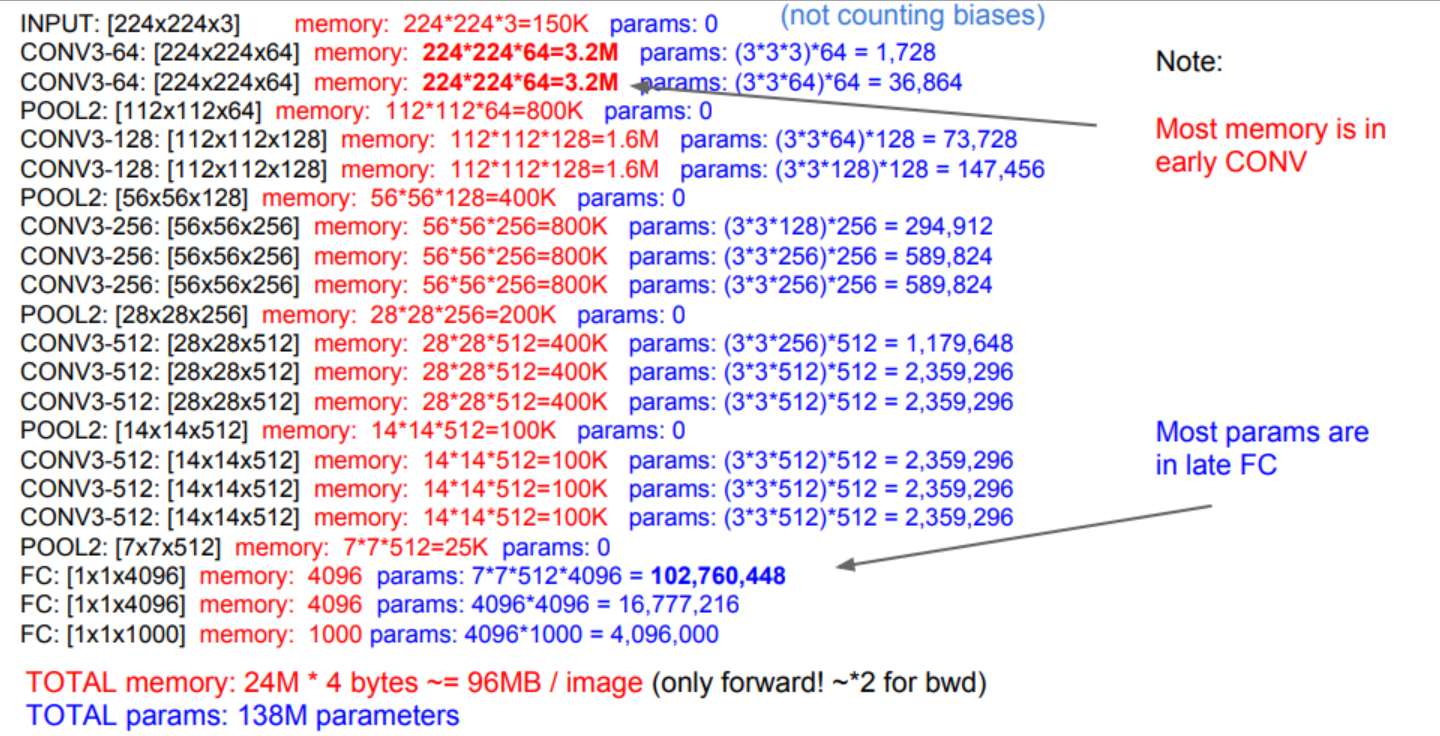

### 3. Impact on Training Time:
More parameters mean longer training times due to the increased computational load during backpropagation. Larger models demand more compute resources (CPU/GPU) and may require specialized hardware.

### 4. Impact on Inference Speed:
In production, smaller filters (e.g., 3x3) tend to be more efficient for inference, requiring fewer operations. Larger filters or more filters increase the computational load, slowing inference speed.

### 5. Model Optimization for Production:
To optimize CNNs for production, techniques like pruning (removing unnecessary weights), quantization (reducing precision), knowledge distillation (training smaller models), and layer fusion (combining layers) can reduce size and improve inference speed.

### 6. Challenges in Production Cycle:
- **Latency:** Larger models or networks with more filters can introduce delays, which is critical in real-time applications.
- **Edge Devices:** On devices with limited resources (e.g., smartphones), models need to be optimized for memory and computation efficiency.
- **Scalability:** Cloud-based deployment of large models requires high bandwidth and storage.

### Summary:
- Small filters (e.g., 3x3) are efficient for deeper networks and faster inference, while larger filters (e.g., 7x7) may capture more complex patterns but increase computational cost.
- More filters increase model complexity and memory usage but enhance representation learning.
- Model size impacts storage, transfer, and inference speed.
- Training time grows with the number of parameters.
- Optimizations like pruning, quantization, and distillation are essential for production-level efficiency.



## **9.6 Role and Benefits of Bottleneck Layers in CNNs**

Bottleneck layers are a key concept in deep learning, particularly in designing efficient Convolutional Neural Networks (CNNs) for tasks like classification, detection, and segmentation. They reduce computational complexity and the number of parameters, optimizing the model for production, especially when computational resources are limited.

### **What are Bottleneck Layers?**
A bottleneck layer refers to a part of the network where the dimensionality or number of channels is temporarily reduced before being expanded again. This narrow point reduces the amount of computation and the number of parameters, helping prevent the network from becoming unnecessarily large and slow.

![](https://i.sstatic.net/LhEso.png)

[Examples](https://docs.ultralytics.com/yolov5/tutorials/architecture_description/#2-data-augmentation-techniques)

### **How Bottleneck Layers Work**
- **Dimensionality Reduction**: Bottleneck layers reduce the number of channels in the middle of the network, lowering computational load and the number of parameters.
- **1x1 Convolutions**: Commonly used in bottleneck layers, 1x1 convolutions reduce the depth of feature maps without affecting spatial resolution. They are computationally inexpensive since they only perform channel-wise aggregation.

```
Network in network layer → convolution layer → Network in network layer
```

### **Bottleneck Layer in ResNet (Residual Networks)**
ResNet is a popular example where bottleneck layers are employed. In deeper networks like ResNet-50 or ResNet-101, bottleneck blocks help reduce the number of filters and then expand them again. This enables efficient training for very deep networks.

**Structure of a Bottleneck Block in ResNet**:
1. **1x1 Convolution**: Reduces the number of channels.
2. **3x3 Convolution**: Processes the reduced set of channels.
3. **1x1 Convolution**: Expands the number of channels back to the original or desired depth.

### **Key Benefits of Bottleneck Layers**

- **Reduced Model Complexity**: By reducing the depth of feature maps temporarily, bottleneck layers cut down the number of parameters and computations needed, making the model more efficient.
  
- **Improved Training Efficiency**: With fewer parameters, training becomes faster, requiring less memory, and helping to avoid overfitting.
  
- **Preserving Important Features**: Bottleneck layers force the network to focus on the most important features by reducing the number of feature maps in intermediate layers, improving the compactness and discriminative power of the learned representations.

- **Enabling Deeper Networks**: Without bottleneck layers, deeper networks would become too large and slow to train. They make it feasible to train very deep networks like ResNet-50, ResNet-101, and beyond.

- **Computational Efficiency**: The 1x1 convolutions in bottleneck layers are computationally inexpensive because they only compute linear combinations of input channels.

- **Better Memory Management**: By reducing the memory footprint, bottleneck layers are particularly useful for deploying models on memory-constrained devices such as mobile phones and embedded systems.




| **Aspect**               | **Bottleneck Layers**                         | **Pooling Layers**                           |
|--------------------------|-----------------------------------------------|----------------------------------------------|
| **Primary Purpose**       | Reduce the number of channels (depth)        | Reduce the spatial dimensions (height, width) |
| **Operations**            | 1x1 convolutions for dimension reduction, followed by 3x3 convolutions for processing | MaxPooling or AveragePooling                |
| **Effect on Dimensions**  | Reduces depth (number of channels) but keeps spatial dimensions | Reduces height and width of feature maps    |
| **Purpose in Architecture** | Make deep networks computationally efficient by reducing parameters | Decrease spatial complexity to improve computation |
| **Impact on Computational Load** | Reduces number of parameters, thus reducing computation | Reduces spatial resolution, lowering computation costs |
| **Usage**                 | Common in deep networks like ResNet, Inception | Common for downsampling in various architectures |
| **Involves Pooling?**     | No, usually uses convolutions for compression | Yes, involves pooling operations (e.g., MaxPooling, AveragePooling) |


![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*r8G3kNw-mUcu9sJBzY0CLQ.png)


> For example, an input feature map of dimensions 28x28x256 has a height and width of 28, with 256 channels. To reduce the channels to 16, we convolve 16 network-in-network filters (1x1x256) with the input. These 16 filters (1x1x256x16) produce 28x28x16 feature maps, reducing the input's dimensionality while maintaining spatial dimensions.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*moju85D019R45FOYfGSdWw.png)



### 9.6.1 Determining Computational Complexity in Terms of Number of Network Parameters

The computational complexity of a neural network is determined by the number of parameters it contains. These parameters are defined by the **filter weights** in the convolutional layers and the **weight matrices** initialized after the dense layers. In this section, we will focus on calculating the **convolutional filter weight parameters** and compare the complexity with and without the use of a bottleneck layer.

#### **Case 1: Without Bottleneck Layer (Direct Convolution)**
#### 1. **Without Bottleneck Layer (Direct Convolution)**

- **Input dimensions**: 28x28x256
- **Filter size**: 10x10x256
- **Number of filters**: 256 (matching the input depth)
- **Padding**: Zero padding is applied

The number of parameters for each filter is:

```
Input (28x28x256) → filter weights (10x10x256) → output (28x28x256)
```
```
Parameters per filter = 10 * 10 * 256 = 25,600
````

Since we have 256 filters, the total number of parameters is:

```
Total parameters = 25,600 * 256 = 6,553,600
```


Thus, the **number of parameters in the convolutional layer** is **6,553,600**.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*Vj7dSkUmbQyf6Ikmsv-W5g.png)

#### **Case 2: With Bottleneck Layer**

Here, we use a bottleneck layer to reduce the feature map's dimensions, which in turn reduces the total number of learnable parameters.

##### **Step 1: Bottleneck Layer (1x1 Convolution)**

- **Input dimensions**: 28x28x256
- **Filter size**: 1x1x256x64 (64 output channels)
- **Output dimensions**: 28x28x64

The number of parameters for the bottleneck layer is:

```
Input to NiN layer (28x28x256) → filter weights (1x1x256x64) → output (28x28x64)
```
```
Parameters per filter = 1 * 1 * 256 = 256 Total parameters = 256 * 64 = 16,384
```


So, the **number of parameters in the bottleneck layer** is **16,384**.

##### **Step 2: Convolutional Layer (10x10 Filter)**

Now, we apply the **10x10x256** filter to the output of the bottleneck layer, which has dimensions 28x28x64.

- **Input dimensions**: 28x28x64
- **Filter size**: 10x10x64
- **Number of filters**: 256 (to match the original depth)

The number of parameters for this convolution is:

```
Parameters per filter = 10 * 10 * 64 = 6,400 Total parameters = 6,400 * 256 = 1,638,400
```

So, the **number of parameters in the second convolutional layer** is **1,638,400**.


#### **Total Parameters with Bottleneck Layer**

The total number of parameters with the bottleneck layer is the sum of the parameters from both layers:

```
Total parameters = 16,384 + 1,638,400 = 1,654,784

```
![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*oP9s23XlfzenSmNxDXPFrQ.png)

#### **Comparison**

- **Without Bottleneck**: 6,553,600 parameters
- **With Bottleneck**: 1,654,784 parameters

The ratio of the parameters is:

```
6,553,600 / 1,654,784 ≈ 3.96
```


This shows that the bottleneck layer reduces the number of parameters by a factor of approximately **3.96**, which greatly reduces computational complexity.


### Conclusion

Using a bottleneck layer results in a significant reduction in the number of learnable parameters, which reduces the network's computational complexity. This is especially helpful in deep networks, such as **GoogLeNet** and **YOLO**, where even trivial convolutional operations can cause a large increase in complexity due to the size of the feature maps.


## **9.7 Understanding How ResNet Mitigates Overfitting and the Concept of Shallower Models**

When increasing the number of layers in a ResNet (Residual Network), overfitting can become a potential issue, particularly when the model becomes very deep. However, ResNet and other similar deep architectures are designed with several strategies that help mitigate overfitting even as the network depth increases.

### Key Factors That Help Prevent Overfitting in ResNet

#### Residual Connections:
One of the primary reasons ResNet works well with deeper networks is the use of residual connections (skip connections). These connections allow the network to learn identity mappings. When the network is very deep, learning these identity mappings helps in stabilizing the training process and mitigates the risk of overfitting because the network can skip unnecessary layers when needed and focus on learning useful transformations. This results in improved gradient flow during backpropagation, helping the model converge better and preventing it from getting stuck in local minima, which can contribute to overfitting.

#### Vanishing/Exploding Gradients:
As networks grow deeper, gradients can either vanish (become too small) or explode (become too large), making training difficult. The residual connections in ResNet help address this problem by ensuring that the gradients can flow through the network more effectively. This makes deeper networks more trainable and reduces the likelihood of overfitting due to poor gradient propagation.

#### Batch Normalization:
ResNet typically uses batch normalization (BN) after each convolutional layer. Batch normalization normalizes the output of each layer, ensuring that the network’s weights are updated in a way that improves convergence and stability. BN also acts as a form of regularization, helping prevent overfitting by reducing internal covariate shift and making the training process more robust.

#### Regularization Techniques:

- **Dropout:** While not strictly part of ResNet's core architecture, dropout is commonly used in conjunction with ResNet to further prevent overfitting. Dropout randomly disables a fraction of neurons during training, forcing the network to not rely on specific activations and improving generalization.

![](https://www.baeldung.com/wp-content/uploads/sites/4/2020/05/2-1-2048x745-1-1024x373.jpg)

![](https://www.baeldung.com/wp-content/uploads/sites/4/2020/05/Blank-Diagram1.svg)

- **Weight Decay (L2 Regularization):** Adding weight decay can penalize large weights, forcing the model to find solutions that are less likely to overfit the data. This is commonly used with ResNet to control overfitting.

#### Data Augmentation:
In practice, data augmentation is used during the training of ResNet. Augmentation techniques, such as random cropping, flipping, and rotation, artificially increase the diversity of the training set, which helps the model generalize better and reduces overfitting. This is particularly important when using deep networks, as they are more prone to overfitting on limited datasets.

#### Pretrained Models (Transfer Learning):
Using pretrained models (especially with architectures like ResNet-50, ResNet-101, etc.) and fine-tuning them on your dataset is another effective strategy to combat overfitting. By using a model that has already learned useful features on a large, diverse dataset (such as ImageNet), you reduce the risk of overfitting, particularly when working with smaller datasets.

#### Global Average Pooling:
In many ResNet variants, particularly those used for classification tasks, global average pooling is used instead of fully connected layers at the end. This helps prevent overfitting because it reduces the number of parameters compared to using a large fully connected layer. Fewer parameters mean less chance of overfitting, particularly when the dataset is small or when there are limited training resources.

### Challenges of Deep ResNets and Overfitting
While ResNet's design helps mitigate overfitting, there are still challenges to consider:

#### Extremely Deep Networks:
As the number of layers increases significantly (e.g., going from ResNet-50 to ResNet-152 or deeper), the number of parameters also increases. Even with residual connections and batch normalization, very deep networks can still overfit if the dataset is not large enough to support the additional complexity.

#### Data Insufficiency:
If the dataset is too small, even ResNet may start overfitting despite its design advantages. Deep networks require large datasets to generalize well, and when the dataset is insufficient, the model may memorize the training data rather than learning meaningful patterns.

#### Hyperparameter Tuning:
Overfitting may occur if hyperparameters (such as learning rate, batch size, or dropout rate) are not tuned properly. For example, using too large a learning rate or too few training epochs may cause the model to overfit or underfit.

### Strategies to Mitigate Overfitting in Deep ResNets

#### Early Stopping:
Early stopping can be employed to prevent the model from overfitting. During training, the model’s performance on the validation set is monitored, and training stops once the validation performance starts to degrade, even if the training performance continues to improve.

#### Cross-Validation:
Using cross-validation can help ensure that the model generalizes well. By splitting the data into multiple folds, the model is trained on different subsets of the data, helping to assess its generalization ability and reduce overfitting.

#### Advanced Regularization:
Techniques such as cutout, mixup, or label smoothing can be employed in ResNet to further regularize the model and help it generalize better.

### Summary: How ResNet Mitigates Overfitting as Layers Increase

- **Residual connections** are a key factor in making deeper networks feasible without overfitting, as they allow the network to learn identity mappings and ensure better gradient flow.
- **Batch normalization**, **data augmentation**, **weight decay**, and **dropout** all serve as regularization strategies that help prevent overfitting.
- The use of **pretrained models** and fine-tuning also helps prevent overfitting when there is limited data available.
- Despite these advantages, extremely deep networks (e.g., ResNet-152 or deeper) can still overfit if not managed properly, particularly if the dataset is small. It is important to balance model depth with dataset size and to use regularization techniques to ensure good generalization.
- By combining these strategies, ResNet models can handle deeper architectures while maintaining a balance between accuracy and overfitting.

### Shallower Models

A shallower model refers to a neural network or deep learning architecture with fewer layers compared to a deeper model. Specifically, in the context of Convolutional Neural Networks (CNNs) or other deep learning architectures, the term "shallower" typically means the network has:

- **Fewer Layers:** A shallower model has fewer layers of neurons (e.g., fewer convolutional layers, pooling layers, or fully connected layers). For example, a shallow CNN might have just a few convolutional layers, whereas a deep CNN could have tens or even hundreds of layers.
- **Smaller Network Depth:** Depth refers to how many layers are stacked in a model. In a shallow model, the depth is low, which means the model has a limited ability to learn complex patterns from data compared to deeper models. For instance, a ResNet-18 is considered shallower than ResNet-152 because ResNet-18 has only 18 layers, while ResNet-152 has 152 layers.

#### Key Characteristics of Shallower Models:
- **Fewer Parameters:** Shallower models tend to have fewer parameters because they have fewer layers. This can be advantageous for training on smaller datasets, as the risk of overfitting is reduced due to the lower model capacity.
- **Lower Computational Cost:** A shallower model requires less computation for both training and inference because there are fewer layers to process. This can lead to faster training times and less memory usage, making them suitable for applications with limited resources.
- **Less Complexity:** Shallow models are less complex and might struggle to capture highly intricate patterns in data compared to deeper models. For instance, a shallow model may not perform well on tasks like object detection or image classification if the data is highly complex.
- **Risk of Underfitting:** Because shallow models have fewer layers, they are less capable of learning from large and complex datasets. As a result, they may not be able to fully capture the underlying patterns in the data, leading to underfitting. This means the model performs poorly because it is too simple for the problem at hand.

#### Shallow vs. Deep Models
- **Shallow Models:**
  - Fewer layers (e.g., 2-5 layers).
  - Suitable for simpler tasks or smaller datasets.
  - Faster to train and use fewer resources.
  - May underperform on complex tasks or larger datasets due to limited capacity.
  
- **Deep Models:**
  - More layers (e.g., 50, 100, or more layers).
  - Better suited for complex tasks (e.g., image recognition, natural language processing).
  - Require more computational resources, larger datasets, and longer training times.
  - Have a greater risk of overfitting, but techniques like regularization, data augmentation, and residual connections help mitigate this.

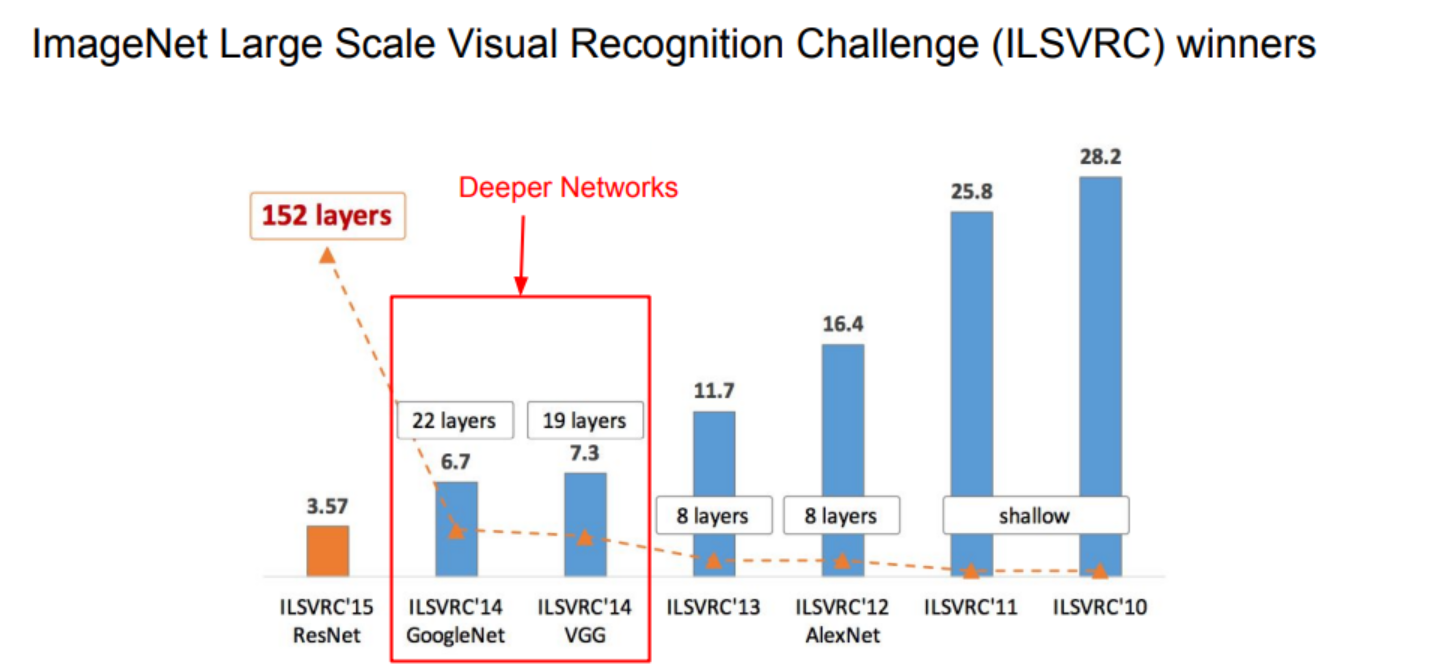

#### Trade-offs Between Shallow and Deep Models:
Shallow models are simpler and easier to train, but their capacity to model complex relationships is limited. They might struggle to perform well on difficult tasks like high-resolution image classification, object detection, or natural language processing.

Deep models are more powerful and capable of learning intricate patterns, but they require larger datasets, more computational power, and careful regularization to avoid overfitting.

In summary, shallower models are networks with fewer layers, which typically result in lower capacity to model complex data but come with the benefits of reduced training time, computational cost, and a lower risk of overfitting, especially for simpler tasks or smaller datasets.


## **9.8 Inception Module**

The **Inception Module** is a key innovation in convolutional neural networks (CNNs) introduced in **GoogLeNet (Inception v1)**, which won the ImageNet Large Scale Visual Recognition Challenge in 2014. The main idea behind the Inception Module is to use multiple types of convolutions within the same layer, enabling the network to capture a variety of features at different scales, without increasing the computational burden significantly.

### Key Features of the Inception Module:
1. **Multiple Filter Sizes in Parallel**: The module applies multiple types of convolutions (e.g., 1x1, 3x3, and 5x5) simultaneously, enabling the network to capture different levels of detail and abstraction in features. This parallelism allows the network to be more expressive while learning multiple kinds of patterns at once.
   
2. **1x1 Convolutions for Dimensionality Reduction**: One of the critical innovations in the Inception Module is the use of 1x1 convolutions. These are applied before larger convolutions (such as 3x3 or 5x5) to reduce the number of input channels, lowering the computational cost while maintaining the richness of learned features. This helps to prevent excessive computation in deeper layers.

3. **Concatenation of Feature Maps**: The outputs from the different convolutions are concatenated along the depth axis (i.e., the channels). This enables the network to integrate features of various scales into a unified representation, which increases the model's capacity to capture diverse spatial patterns.

4. **Pooling Operations**: Max pooling or average pooling operations are typically incorporated within the module. This increases the receptive field of the network and helps it learn larger spatial context, thus improving its ability to generalize across different input variations.

### Structure of the Inception Module:
An Inception module typically consists of the following operations applied in parallel:
- **1x1 Convolution**: Helps reduce the number of channels, improving computational efficiency.
- **3x3 Convolution**: Captures medium-level features.
- **5x5 Convolution**: Captures larger spatial features.
- **3x3 Max Pooling**: Aggregates information from larger regions.
- **Concatenate**: The results of all operations are concatenated to form the final feature map.

### Diagram of an Inception Module:

```plaintext
            +----------------------+
            |   1x1 Convolution    |
            +----------------------+
                    |
            +----------------------+
            |   3x3 Convolution    |
            +----------------------+
                    |
            +----------------------+
            |   5x5 Convolution    |
            +----------------------+
                    |
            +----------------------+
            |   3x3 Max Pooling    |
            +----------------------+
                    |
         +----------------------------+
         | Concatenate all feature maps |
         +----------------------------+
```
## **Advantages of the Inception Module:**

- **Increased Efficiency**: By using multiple filter sizes in parallel, the Inception module can learn different features at various scales, allowing for more efficient and accurate feature extraction.
- **Lower Computational Cost**: The 1x1 convolutions help reduce the number of channels before applying more computationally expensive 3x3 and 5x5 convolutions, thus lowering the overall cost and memory usage.
- **Improved Flexibility**: The combination of convolutions and pooling allows the module to capture a wide range of features, making it adaptable to different kinds of input data.
- **Scalability**: The Inception module is designed to scale efficiently with deeper architectures, enabling it to handle larger and more complex datasets without a significant increase in computational burden.

## **Evolution of the Inception Architecture:**

- **Inception v1 (GoogLeNet)**: Introduced the Inception module and achieved state-of-the-art performance at the time.

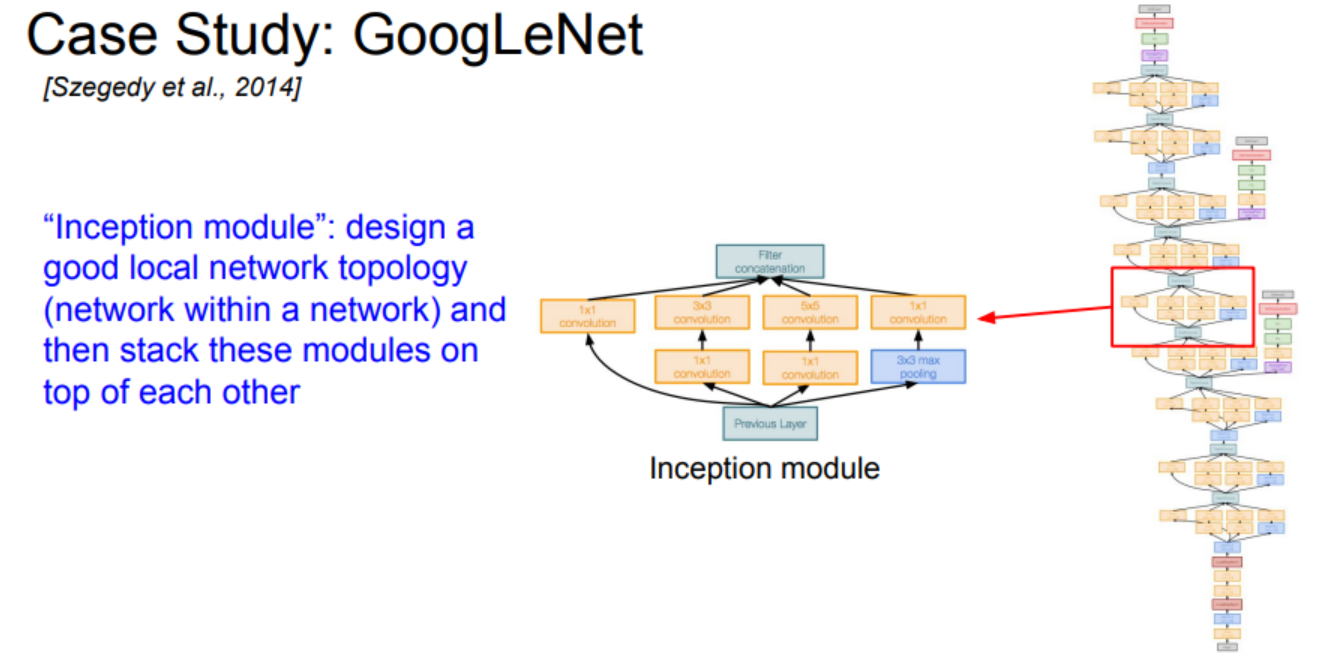

- **Inception v2 and v3**: Introduced optimizations like factorized convolutions (breaking down larger convolutions into smaller ones) and batch normalization to improve training stability.
- **Inception v4**: Further enhanced the architecture to improve both efficiency and accuracy, building upon the ideas from previous versions.

## **Applications of the Inception Module:**

The Inception module is used in a variety of tasks in computer vision, including:

- **Image Classification**: The Inception module helps networks to classify objects based on complex visual patterns.
- **Object Detection**: It can be applied to detect objects within an image by learning spatial hierarchies and features at different scales.
- **Semantic Segmentation**: Inception modules can aid in understanding pixel-wise classifications within images.
- **Transfer Learning**: Pre-trained Inception models are often used for transfer learning in various vision-based tasks due to their generalization capability.

## **Summary:**

The Inception Module is a fundamental component in modern CNNs, allowing networks to efficiently capture diverse features by applying multiple convolutions with different filter sizes in parallel. It enables networks to learn complex patterns without significant increases in computational cost, making it an essential building block in many deep learning architectures, particularly for image-related tasks.


> **Problem with the Inception Module:**
>
> Despite its advantages, the Inception module can present issues related to **computational complexity**:
>
> 1. **Increased Computational Requirements**: The parallel use of multiple filter sizes (1x1, 3x3, and 5x5 convolutions) increases the number of operations required for each forward pass, leading to higher computational costs, especially in deeper networks.
>
> 2. **Memory Usage**: The parallel operations within the Inception module increase memory demands. Each set of convolutions and pooling layers requires separate memory allocation, making it more memory-intensive, particularly when dealing with large images or deep networks.
>
> 3. **Training Time**: With multiple convolutions and pooling layers applied at each stage, the training time increases compared to simpler architectures. This added complexity also makes the model harder to optimize, requiring more computational resources for hyperparameter tuning.
>
> **Summary**: The trade-off with the Inception module is its ability to extract diverse features from different scales at the cost of higher computational complexity. These complexities can hinder real-time or large-scale deployments unless optimized effectively.


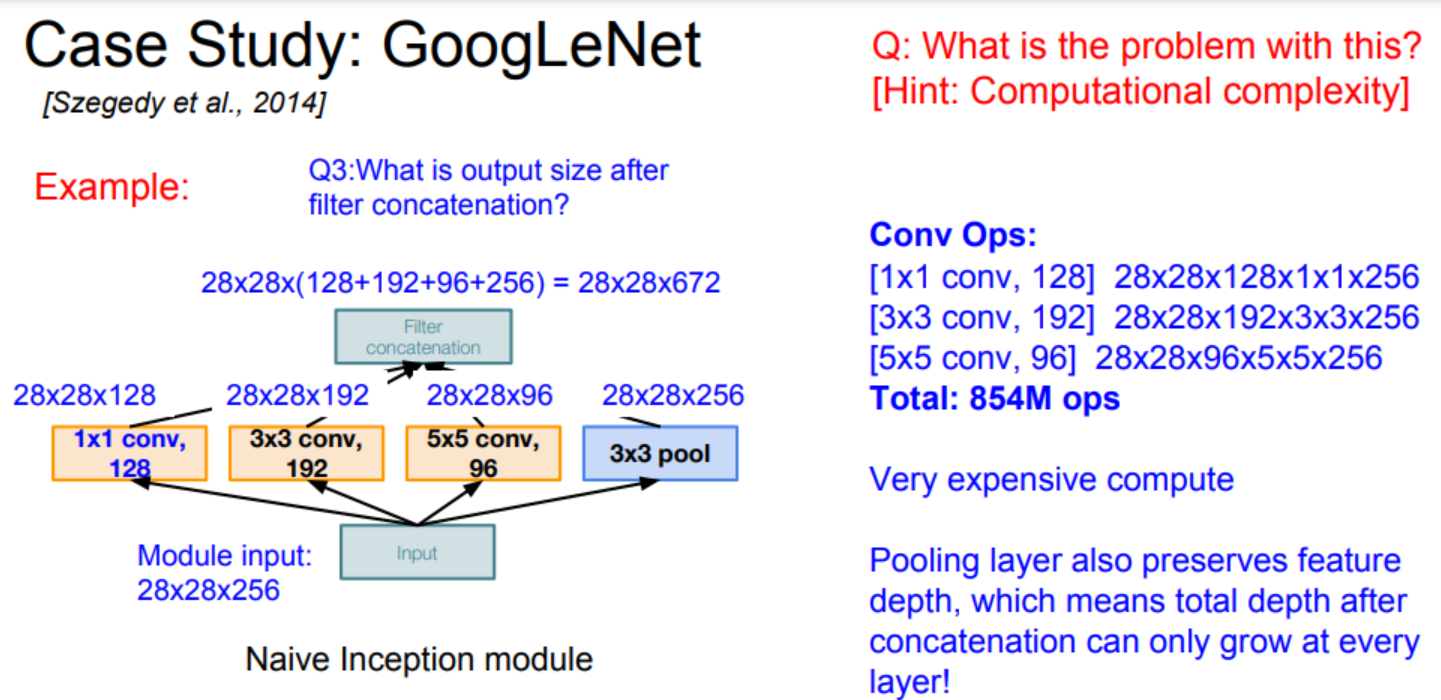

> **Solution: “Bottleneck” Layers with 1x1 Convolutions to Reduce Feature Depth**
>
> One effective solution to mitigate the computational complexity of the Inception module is the use of **"bottleneck" layers** that apply **1x1 convolutions**. These layers help reduce the depth of the feature maps before applying the more computationally expensive 3x3 and 5x5 convolutions.
>
> **How Bottleneck Layers Work:**
>
> - **1x1 Convolutions**: These convolutions are applied before the larger convolutions (such as 3x3 or 5x5). By using 1x1 convolutions, the number of channels (or depth of the feature maps) is reduced, thereby decreasing the computational load and memory usage.
> - **Reducing Depth**: The "bottleneck" layer serves as a dimensionality reduction step, allowing the network to focus on more important features while reducing the overall number of operations needed in the subsequent layers.
> - **Increased Efficiency**: This reduction in feature depth helps to lower the computational complexity of the network, making it more efficient and faster during both training and inference.

> **Summary**: Using 1x1 convolutions in bottleneck layers helps reduce the depth of feature maps, addressing the computational complexity of the Inception module while maintaining the ability to learn diverse features at different scales.


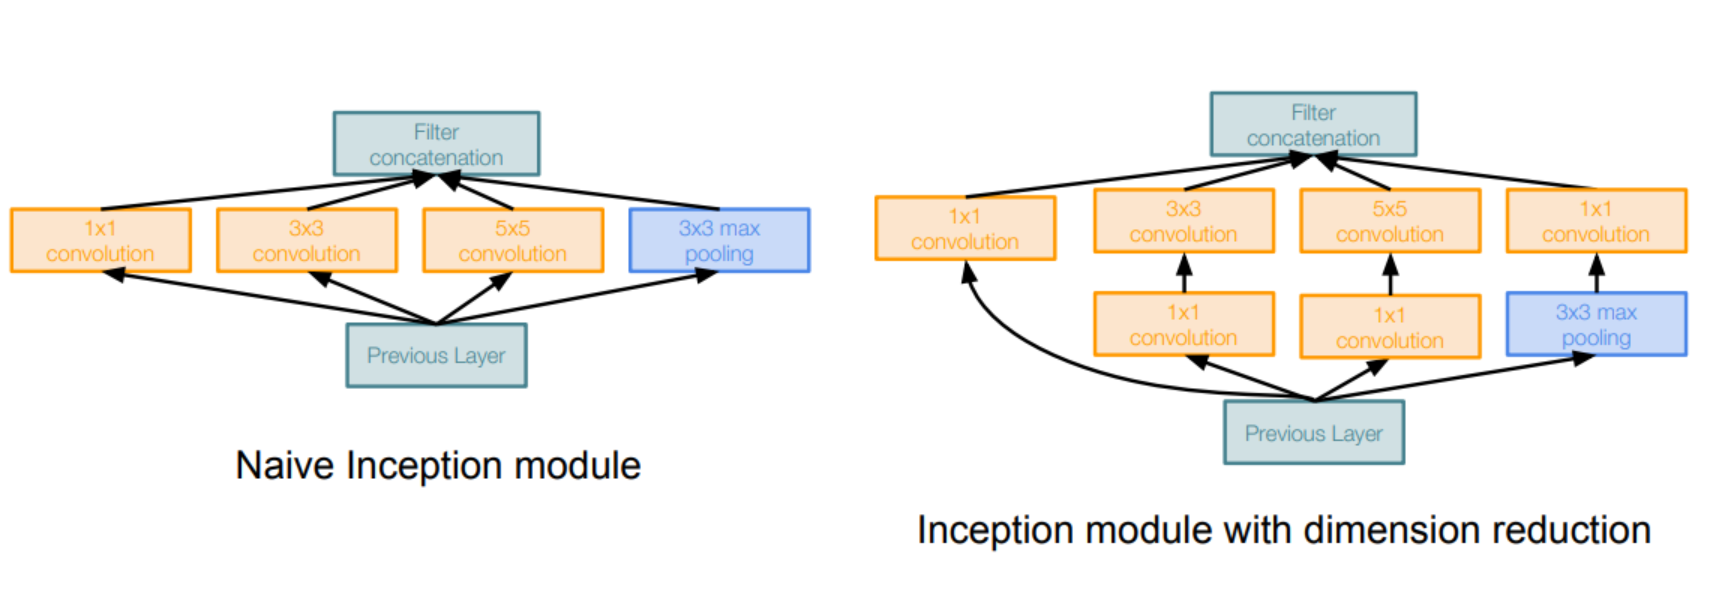

**Full GoogLeNet architecture**

![](https://media.geeksforgeeks.org/wp-content/uploads/20200429201549/Inceptionv1_architecture.png)

> **Auxiliary Classification Outputs to Inject Additional Gradient at Lower Layers:**
>
> In deep architectures like the Inception network, one effective strategy to improve training is the use of **auxiliary classification outputs**. These are additional classification heads added at lower layers in the network. The auxiliary output provides extra gradient signals, which help with the training of deeper layers that may otherwise struggle due to vanishing gradients.
>
> **How Auxiliary Classifiers Work:**
> - **Structure**: Typically, an auxiliary classifier consists of an **Average Pooling** layer followed by a **1x1 Convolution**, a **Fully Connected (FC) layer**, another **FC layer**, and finally a **Softmax layer** to produce the classification output.
> - **Gradient Injection**: By adding this auxiliary classifier, additional gradient information is propagated back into the earlier layers during backpropagation, which can help with faster and more stable convergence, especially in very deep networks.
> - **Preventing Vanishing Gradients**: This technique reduces the risk of vanishing gradients in deep networks, ensuring that the lower layers continue to learn effectively.
>
> **Summary**: Auxiliary classification outputs provide a powerful way to boost the learning process in deep networks by injecting additional gradients into earlier layers, thereby enhancing training stability and performance.


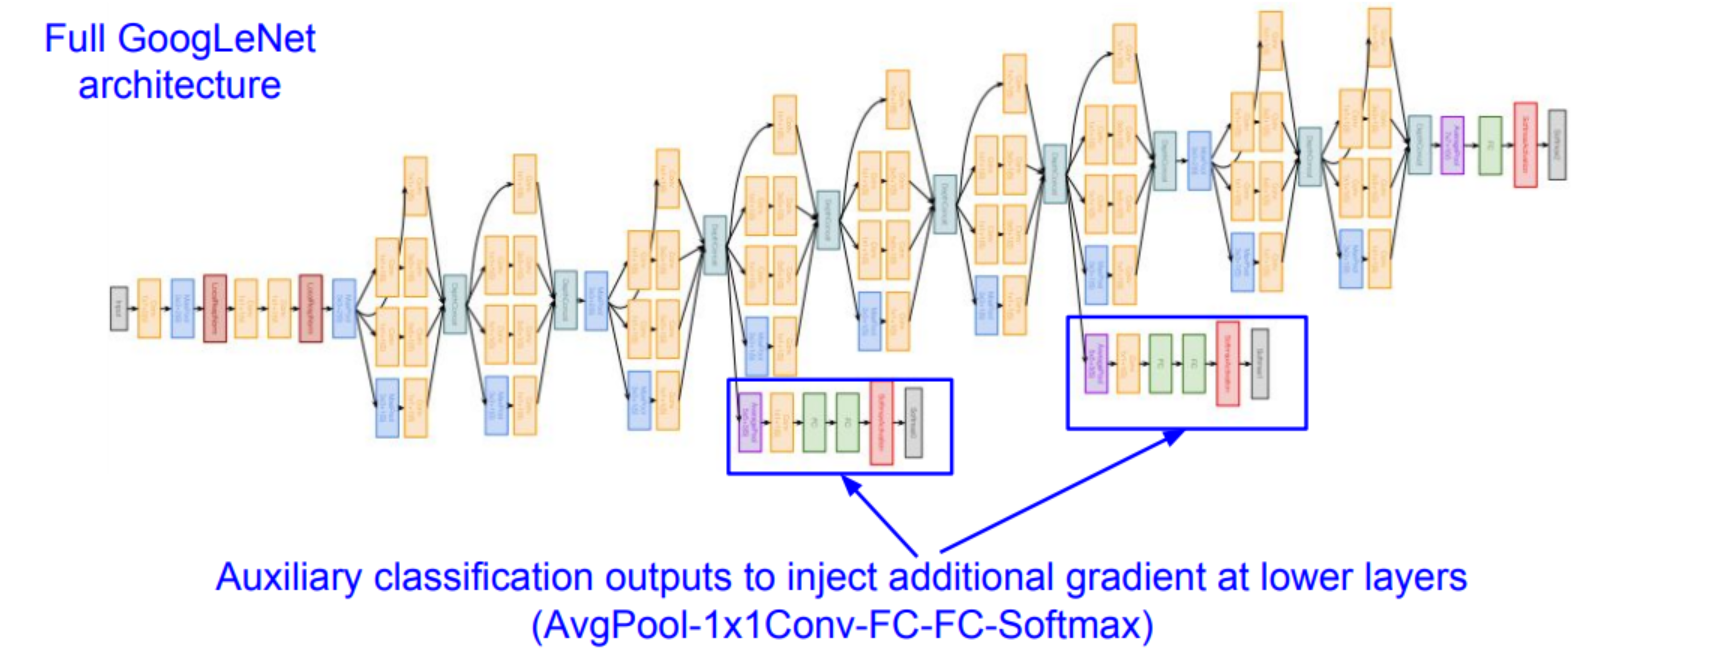

## 9.9 Residual Connections in Neural Networks

A **residual connection**, also known as a **skip connection**, is a technique used in deep neural networks, particularly in architectures like **ResNet (Residual Network)**, to address challenges like **vanishing gradients**, **training difficulties**, and **overfitting** in very deep models.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*U-cDCj0EEC5CjoX0HcQdjA.png)

### What is a Residual Connection?

In a residual connection, the input to a layer (or a block of layers) is directly **added** to the output of that layer (or block), bypassing the transformation in between. This creates a shortcut for the information to flow directly to subsequent layers, ensuring that some of the input features are preserved.

**Mathematically:**

If the input to a layer is `x`, and the transformation applied by the layer (or block) is `F(x)`, the output with a residual connection becomes:

`y = F(x) + x`

- `F(x)`: Represents the transformation (e.g., convolution, activation, etc.).
- `x`: The original input, added directly to the output `F(x)`.

### Why Use Residual Connections?

1. **Addressing the Vanishing Gradient Problem**
   - Ensures gradients flow back directly through the shortcut path, reducing the risk of vanishing gradients.

2. **Improving Training of Deep Networks**
   - Makes it easier to train deeper networks by allowing them to learn **identity mappings** and focus on refining important features.

3. **Preventing Degradation of Performance**
   - Helps avoid performance degradation when adding more layers by optimizing the use of additional layers.

4. **Encouraging Feature Reuse**
   - Combines learned features (`F(x)`) and raw input features (`x`), improving expressiveness.

### Intuition Behind Residual Connections

- If certain layers are not contributing significantly, the network can **skip them** by learning an identity function `F(x) = 0`.
- This allows the network to adaptively decide which transformations are necessary and which can be bypassed.


### Example of a Residual Block

A **residual block** typically looks like this:

1. Input `x` passes through a series of layers (e.g., convolution, batch normalization, ReLU).
2. The output `F(x)` is added to `x` (the input).
3. The result `y = F(x) + x` becomes the input for the next layer.

**Diagram:**
```
Input --> [Conv + BatchNorm + ReLU] --> Output
  |                                        |
   ----------------------------------------
                  (Addition)

```

![](https://miro.medium.com/v2/resize:fit:828/format:webp/1*RTYKpn1Vqr-8zT5fqa8-jA.png)

### Applications of Residual Connections

1. **ResNet (Residual Networks):**
   - Residual connections are the foundation of ResNet architectures, enabling the training of very deep models (e.g., ResNet-152).
   
2. **Variations:**
   - Used in architectures like ResNeXt, Wide-ResNet, and DenseNet.

3. **Other Tasks:**
   - Residual connections are used in image recognition, object detection, natural language processing, and generative models.

### Benefits of Residual Connections

- **Better Gradient Flow:** Reduces the risk of vanishing gradients.
- **Efficient Training:** Enables faster and more stable training of deep networks.
- **Feature Reuse:** Combines raw and transformed features for better performance.
- **Supports Very Deep Networks:** Allows architectures with hundreds of layers to perform well.

### Summary: Residual Connections and Their Impact

Residual connections in neural networks serve a role similar to gain in a PID controller by improving stability and efficiency, particularly in very deep networks. Here’s a concise summary of their impact:

1. **Stabilizing Training Dynamics**  
   - Prevent vanishing or exploding gradients, ensuring smooth backpropagation in deep networks.

2. **Improved Learning Efficiency**  
   - Simplify the optimization process by focusing on residual mappings \( F(x) = y - x \), making training faster and more effective.

3. **Combining New and Old Features**  
   - Dynamically balance learned transformations \( F(x) \) and original input features \( x \), fostering feature reuse and adaptive learning.

4. **Avoiding Performance Degradation**  
   - Maintain or improve performance as the network depth increases by allowing layers to skip unnecessary computations.

5. **Fostering Identity Mappings**  
   - Enable networks to skip layers when deeper transformations are not beneficial, preserving input features when needed.

**Key Takeaway**
Residual connections act as a gain-like mechanism, regulating information flow to ensure efficient, stable, and scalable learning in deep neural networks. This innovation has become a cornerstone for modern architectures like ResNet, driving their success in handling complex tasks with very deep layers.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*EMHk3-4qk-MK6O34BTQhxA.png)

### **9.9.1 Hypothesis: Optimization Challenges in Deeper Models**

#### **Problem Statement**
Deeper neural networks are fundamentally harder to optimize, and their performance may degrade despite having more layers. Intuitively, a deeper model should perform at least as well as a shallower one, as it can replicate the shallower model's functionality with added capacity. However, the optimization landscape becomes more challenging with depth due to factors like vanishing gradients and increased parameter complexity.

#### **Proposed Solution: Identity Mapping via Residual Connections**

**Core Idea:**
To address the optimization problem, we can design the deeper model by:
1. **Copying Learned Layers**: Initialize the deeper model by transferring the learned parameters of the shallower model.
2. **Identity Mapping for Additional Layers**: Set the additional layers to identity mappings \( F(x) = x \). This ensures that the added layers do not initially modify the data flow, preserving the shallower model's performance.

#### **Key Benefits of This Approach**

1. **Performance Retention**:
   - By construction, the deeper model retains the performance of the shallower model as a baseline.

2. **Improved Optimization**:
   - Identity mappings reduce the risk of vanishing gradients, as gradients flow directly through the skip connections.

3. **Flexibility to Learn**:
   - The additional layers, initialized as identity mappings, can adaptively learn transformations during training, improving model capacity without disrupting the base functionality.

4. **Simpler Transition to Deeper Models**:
   - This approach allows seamless scaling from shallower to deeper models, reducing the need for complex re-initializations or retraining.

#### **Realization in Residual Networks (ResNet)**

Residual connections directly implement this hypothesis by:
- Allowing layers to approximate identity mappings initially.
- Facilitating incremental learning of new features without compromising the learned representations of earlier layers.

This design has been instrumental in enabling very deep models (e.g., ResNet-152) to outperform shallower counterparts without optimization difficulties.

#### **Conclusion**

By using residual connections and identity mappings, we can effectively address the optimization challenges in deeper networks. This approach ensures that deeper models perform at least as well as their shallower versions while unlocking their potential for higher representational capacity.


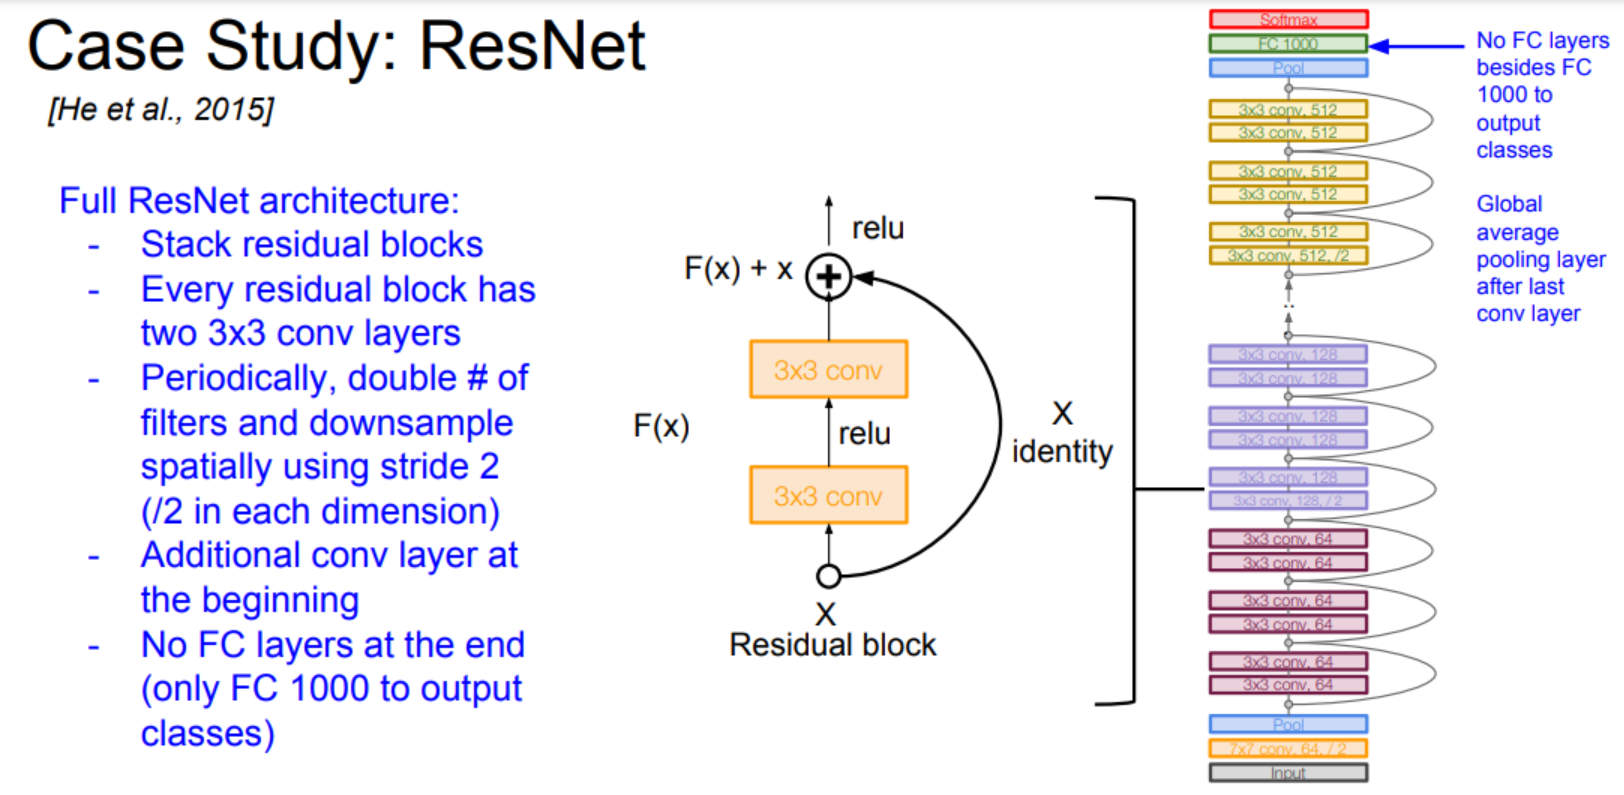

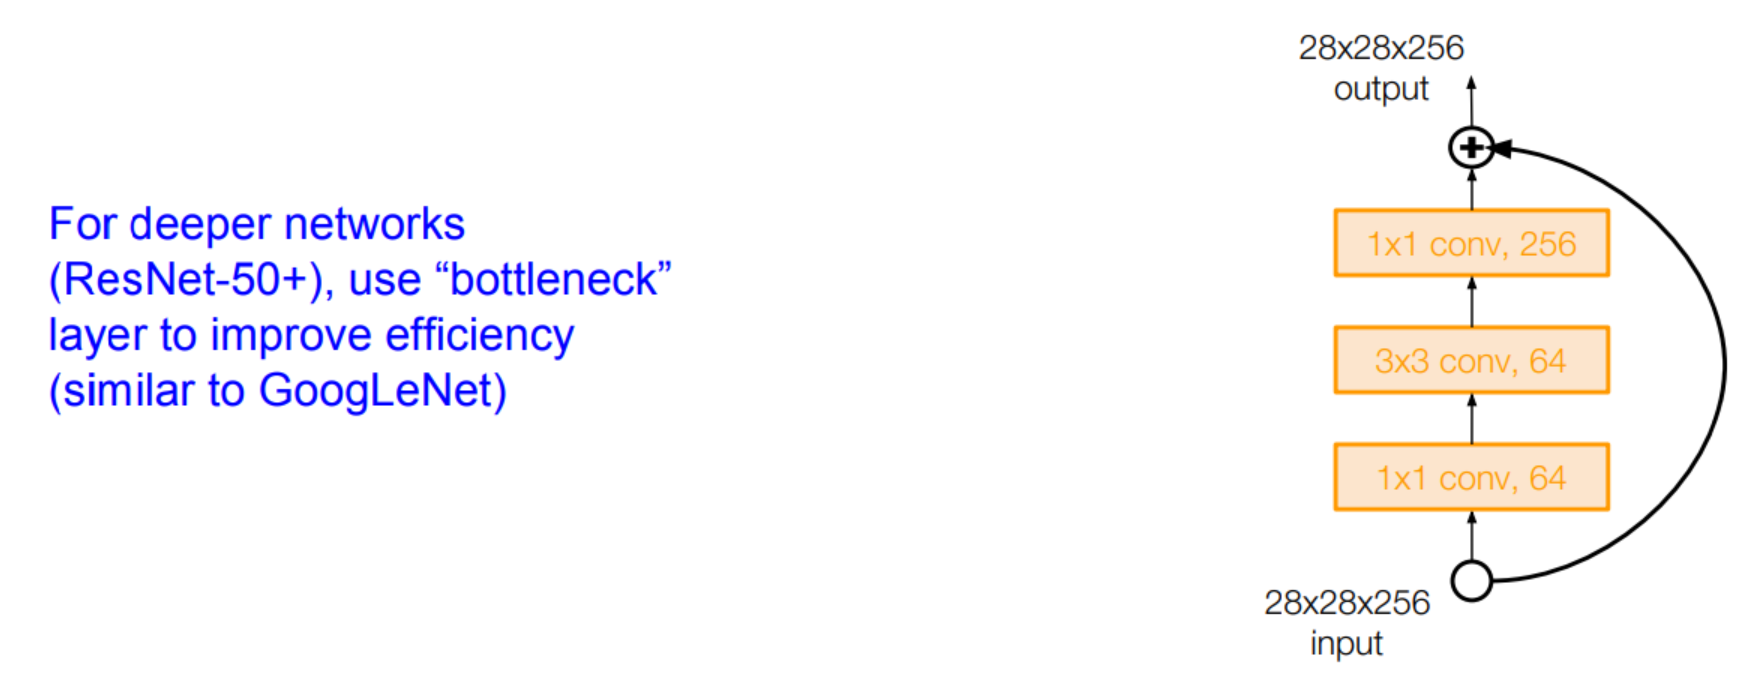

**An Analysis of Deep Neural Network Models for Practical Applications, 2017.**

![](https://www.researchgate.net/profile/Frank-Koss/publication/320084139/figure/fig2/AS:543716588744704@1506643544031/Comparison-of-popular-CNN-architectures-The-vertical-axis-shows-top-1-accuracy-on.png)

### **9.9.2 NiN (Network in Network)**

**Concept**: NiN replaces traditional convolutional layers with micro-networks that perform more complex feature extraction within each spatial location.

- **Main Idea**: Uses multilayer perceptrons (MLPs) as convolutional kernels.
- **Benefits**:
  - Increases feature extraction capability by adding non-linear processing within each convolution.
  - Reduces the need for large filter sizes.
- **Challenges**: Higher computational cost due to increased non-linear operations.


In [ ]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfull

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l


def nin_block(in_channels, out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU())

In [ ]:
net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, strides=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, strides=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, strides=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5),
    # There are 10 label classes
    nin_block(384, 10, kernel_size=3, strides=1, padding=1),
    nn.AdaptiveAvgPool2d((1, 1)),
    # Transform the four-dimensional output into two-dimensional output with a
    # shape of (batch size, 10)
    nn.Flatten())

![](https://classic.d2l.ai/_images/nin.svg)

In [ ]:
X = torch.rand(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])



### **9.9.3 Wide ResNet**

**Concept**: A variant of ResNet that widens the network (increases filter dimensions) instead of deepening it.

- **Main Idea**: Reduces the depth of ResNet while expanding the number of channels in each layer.
- **Benefits**:
  - Easier optimization with fewer layers.
  - Achieves comparable or better performance with reduced training time.
- **Challenges**: Increased memory consumption due to wider layers.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*bggPuUy0IyrcqsHt_Lxwvw.png)


### **9.9.4 ResNeXt**

**Concept**: Extends ResNet by introducing **cardinality**, which is the number of parallel transformations in a layer.

- **Main Idea**: Instead of simply deepening or widening, ResNeXt increases the paths (cardinality) for feature extraction.
- **Benefits**:
  - Improved performance with fewer parameters compared to deeper models.
  - More flexibility in designing architectures.
- **Challenges**: Requires careful tuning of cardinality, depth, and width.

![](https://player.slideplayer.com/89/14282282/slides/slide_48.jpg)


### **9.9.5 Stochastic Depth**

**Concept**: A regularization technique where certain layers are randomly skipped during training.

- **Main Idea**: For each mini-batch, layers are stochastically dropped, allowing the network to behave as a combination of deep and shallow models.
- **Benefits**:
  - Reduces overfitting and improves generalization.
  - Speeds up training by skipping computations.
- **Challenges**: Careful selection of dropout probabilities is necessary.



### **9.9.6 DenseNet**

**Concept**: Connects each layer to every other layer in a dense connectivity pattern.

- **Main Idea**: Instead of learning completely new features in each layer, DenseNet reuses features from all preceding layers.
- **Benefits**:
  - Reduces the number of parameters significantly.
  - Improves gradient flow and feature reuse.
- **Challenges**: Computational overhead due to increased connections.

![](https://www.researchgate.net/publication/367236033/figure/fig2/AS:11431281113721345@1674056588852/DenseNet-Structure-Densely-Sources-DenseNet-Structure-Densely-Connected-Convolutional.jpg)


### **9.9.7 FractalNet**

**Concept**: Uses a fractal-like architecture with repeated self-similar structures to create deep networks.

- **Main Idea**: Multiple paths of varying depths are created in a fractal pattern, allowing networks to implicitly regularize.
- **Benefits**:
  - Robust to overfitting.
  - Mimics the benefits of residual connections without explicit shortcuts.
- **Challenges**: High computational cost due to intricate fractal patterns.

![](https://figures.semanticscholar.org/0d0101e65e52ae0cec38bcd13c6a9d631979c577/2-Figure1-1.png)


### **9.9.8 SqueezeNet**

**Concept**: A lightweight architecture designed for reduced parameter usage while maintaining performance.

- **Main Idea**: Introduces **Fire Modules**, which use squeeze (1x1 filters) and expand (1x1 and 3x3 filters) operations to compress feature maps.
- **Benefits**:
  - Extremely small model size, suitable for mobile and embedded devices.
  - Comparable accuracy to AlexNet with 50x fewer parameters.
- **Challenges**: Lower capacity might limit performance on complex tasks.


## **9.10 Modern CNN Architectures Used in Autonomous Vehicles and How They Are Used**

- **Modern CNN architectures** play a crucial role in enabling autonomous vehicles to process and understand their environment.
- These architectures are designed to handle various tasks such as image classification, object detection, semantic segmentation, and depth estimation, which are essential for the vehicle’s decision-making process.
  
### Common CNN Architectures Used in Autonomous Vehicles:
1. **VGGNet**:
   - Used for feature extraction from images with a deep network structure, helping in tasks like image classification and object recognition.

2. **ResNet (Residual Networks)**:
   - Known for its ability to handle very deep networks by using skip connections, which allow gradients to flow easily during training. This helps in processing complex data from cameras and sensors in autonomous vehicles.

3. **YOLO (You Only Look Once)**:
   - A real-time object detection system that can detect multiple objects in a single pass, making it efficient for applications such as pedestrian detection, vehicle tracking, and traffic sign recognition.

4. **U-Net**:
   - Mainly used for semantic segmentation, allowing the vehicle to recognize and classify different regions of the road (e.g., lanes, pedestrians, other vehicles, etc.).

5. **Faster R-CNN**:
   - Used for object detection tasks in autonomous vehicles. It provides high accuracy and speed for detecting vehicles, pedestrians, and obstacles.

### How These Architectures Are Used:
- **Object Detection**: CNNs help autonomous vehicles identify and classify objects (e.g., pedestrians, vehicles, traffic signs) to navigate safely through the environment.
- **Lane Detection**: Networks like VGGNet or ResNet can be used to detect lane markings on roads, allowing the vehicle to follow the correct lane.
- **Semantic Segmentation**: U-Net and similar networks help in segmenting images to identify various parts of the scene, such as roads, pedestrians, and other vehicles, which is crucial for path planning.
- **Depth Estimation**: CNNs are used to estimate the depth of objects in the vehicle’s surroundings, aiding in obstacle avoidance and collision detection.

### Conclusion:
- Modern CNN architectures in autonomous vehicles are essential for processing sensor data and enabling real-time decision-making, allowing these vehicles to operate safely and efficiently in complex environments.


# **10. RNN**
---



## **10.1 Understanding the Basics of Sequence Models**


### **10.1.1 What are time-indexed data points, and how do they relate to sequence modeling in RNNs?**

#### **Time-Indexed Data Points**

Time-indexed data points refer to data that is organized or indexed by time or sequential order. This type of data typically comes in the form of time series data, where each data point corresponds to a specific point in time (e.g., hourly stock prices, daily weather observations, or sensor readings over time).

Each data point in time-indexed data is associated with a timestamp or index that reflects its position in a temporal sequence. The time aspect is crucial, as it introduces dependencies between successive data points, meaning that the current data point often depends on the previous ones.

For example:
- **Stock prices**: The price of a stock today is likely influenced by its price in the past few days.
- **Weather data**: The temperature today may be influenced by the temperature over the last few hours or days.
- **Sensor data**: A sensor's reading at any given time is typically dependent on previous readings.

This temporal structure in the data is what makes time-indexed data essential for **sequence modeling**.

[For More Information](https://www.geeksforgeeks.org/time-series-forecasting-using-recurrent-neural-networks-rnn-in-tensorflow/)

#### **Relation to Sequence Modeling in RNNs**

Sequence modeling is a method used in machine learning to predict or understand data that has temporal dependencies. Recurrent Neural Networks (RNNs) are a class of neural networks designed specifically to handle such sequential data. Here's how time-indexed data and RNNs relate:

![](https://media.geeksforgeeks.org/wp-content/uploads/20230502081219/visualisation-min.png)

1. **Sequential Dependencies**:
   - RNNs excel at capturing the **dependencies between consecutive time steps** in sequence data. Time-indexed data naturally involves these dependencies. For instance, in stock price prediction, the price at time \( t \) depends on the price at time \( t-1 \), and this pattern continues over time.
   - RNNs use their internal state (memory) to store information about previous time steps, which helps in making predictions based on past data points. This makes them suitable for tasks like forecasting or sequence classification.

2. **Handling Variable-Length Sequences**:
   - Time-indexed data can often have varying lengths (e.g., one sequence may contain a year's worth of daily data, while another may only cover a week). RNNs can process sequences of **variable length**, making them versatile for many different types of sequential data.

3. **Dynamic Time Series Prediction**:
   - In RNNs, the data from each time step is fed into the network, and the network's hidden states evolve over time as new data points arrive. This allows RNNs to model dynamic systems like time-series forecasting, where predictions at time \( t \) rely on patterns learned from earlier time steps.

4. **Backpropagation Through Time (BPTT)**:
   - RNNs are trained using an algorithm called **Backpropagation Through Time (BPTT)**. This method allows the model to adjust its weights based on the errors observed at each time step. BPTT ensures that the RNN can learn from **sequential dependencies** present in time-indexed data by updating weights for each step, effectively learning long-range temporal relationships.

5. **Real-World Applications**:
   - **Natural Language Processing (NLP)**: In tasks like machine translation, text generation, and speech recognition, RNNs process sequences of words, where each word depends on the previous ones in the sentence. Each word in the sequence can be considered a time-indexed data point, as the model's predictions at each time step depend on the previous words.
   - **Time Series Forecasting**: In financial markets, healthcare, or weather forecasting, predicting future events depends heavily on previous values (time-indexed data points). RNNs are used to forecast future data points, utilizing past observations to make predictions.

#### **Key Takeaways**:
- **Time-indexed data** is data organized by timestamps or ordered in a sequence, where each point depends on its previous values.
- **RNNs** are ideal for modeling sequences because they can capture dependencies between time-indexed data points across different time steps, making them suitable for applications such as forecasting, text generation, and speech recognition.
- **Training RNNs** involves **Backpropagation Through Time (BPTT)**, allowing the network to learn temporal dependencies in sequences of time-indexed data.

In essence, time-indexed data is the natural input for sequence models like RNNs, as they are designed to handle the inherent sequential dependencies present in such data.


### **10.1.2 How does a traditional language model differ from a sequence-based model like an RNN?**

#### **Traditional Language Model**

A **traditional language model** typically relies on statistical techniques to predict the probability of a word or sequence of words occurring in a sentence based on fixed rules or simple statistical analysis. Common traditional models include **n-gram models** and **hidden Markov models (HMMs)**. These models consider a limited context (often the previous \( n-1 \) words in the sequence) to predict the next word or sequence of words.

- **N-gram models**: An n-gram language model predicts the next word based on the previous \( n-1 \) words. For example, a bigram model considers the previous word to predict the current word. These models have limitations because they rely only on local context (fixed-length windows of previous words) and do not capture long-range dependencies or word meanings.
  
- **Limitations of Traditional Models**:
  - **Fixed-length context**: Traditional language models, like n-grams, have a fixed window size (i.e., only considering a limited number of previous words). This leads to the **curse of dimensionality** as the number of possible word combinations increases with larger n.
  - **Lack of long-term memory**: Traditional models cannot remember long-range dependencies between words, making them less effective for tasks that require understanding over long sentences or documents.
  - **Rule-based or statistical**: These models do not learn features or representations from data but rather rely on predefined rules and statistical relationships.

#### **Sequence-Based Model (RNN)**

A **Recurrent Neural Network (RNN)** is a deep learning model designed specifically for sequence-based data, such as text, speech, or time-series data. Unlike traditional language models, RNNs learn to capture sequential dependencies by maintaining a hidden state that is updated at each time step based on both the current input and the previous hidden state.

- **Key Features of RNNs**:
  - **Dynamic context**: RNNs can handle sequences of arbitrary length and capture long-term dependencies in the data. The model’s hidden state acts as a form of memory, allowing it to retain information from earlier time steps and use that information to make predictions later in the sequence.
  - **Learning representations**: RNNs automatically learn relevant features and representations of the input data, making them much more flexible and capable of modeling complex relationships compared to traditional models.
  - **End-to-end learning**: RNNs learn directly from data through backpropagation, without the need for predefined rules or explicit statistical assumptions.

- **Longer-term dependencies**: Unlike traditional models, RNNs can capture relationships between distant words or elements in a sequence. For example, in language modeling, an RNN can remember the subject of a sentence even if the verb appears many words later.


#### **Traditional Language Model in little depth**

A language model assigns probabilities to sequences of words:

```
P(w_1, w_2, ..., w_T)
```


where `w_i` is the `i`-th word in the sequence.

#### **Key Idea:**
The joint probability of a sequence is estimated using the chain rule:

```
P(w_1, w_2, ..., w_T) = P(w_1) * P(w_2 | w_1) * P(w_3 | w_1, w_2) ... P(w_T | w_1, w_2, ..., w_{T-1})
```


This becomes computationally expensive as `T` increases.

#### **Techniques in Traditional Language Models**

##### **N-Gram Models:**
Simplify computation by assuming word dependence only on the last `N-1` words:

```
P(w_T | w_1, ..., w_{T-1}) ≈ P(w_T | w_{T-(N-1)}, ..., w_{T-1})
```


###### **Advantages:**
- Simpler and effective for small contexts.

###### **Disadvantages:**
- Limited context and struggles with large vocabularies.

##### **Smoothing Techniques:**
- **Additive Smoothing (Laplace):** Adds a constant (`α`) to all counts.
- **Kneser-Ney Smoothing:** Better generalization by redistributing probabilities.

##### **Count-Based Approaches:**
Based on word frequency counts:

```
P(w_{T-1}, w_T) = Count(w_{T-1}, w_T) / Count(w_{T-1})
```


##### **Maximum Likelihood Estimation (MLE):**
Estimates probabilities by maximizing data likelihood:

```
P(w_T | w_{T-1}) = Count(w_{T-1}, w_T) / Count(w_{T-1})

```


#### **Limitations**

- **Data Sparsity:** Zero probability for unseen sequences.
- **Limited Context:** Fixed `N`-grams can't capture long dependencies.
- **Vocabulary Size:** Large vocabularies require more resources.



#### **Key Differences Between Traditional Language Models and RNNs**

1. **Context Handling**:
   - Traditional models (e.g., n-grams) have a **fixed context** window and can only consider a limited number of previous words.
   - RNNs, on the other hand, can maintain a **dynamic context** and capture long-range dependencies by using a hidden state that evolves over time.

2. **Modeling Capabilities**:
   - Traditional models are **rule-based** or **statistical**, relying on explicit probabilities between fixed sequences of words.
   - RNNs **learn from data**, meaning they can automatically adjust their weights and improve over time, making them more flexible and capable of handling complex language patterns.

3. **Memory**:
   - Traditional models like n-grams do not have memory of past events (other than a fixed context).
   - RNNs have an **internal memory** (the hidden state) that can store information from previous time steps, allowing them to model long-term dependencies in sequences.

4. **Scalability**:
   - Traditional models are **computationally limited** by the size of the n-gram or the vocabulary, often facing challenges with **sparse data** and the curse of dimensionality.
   - RNNs are **scalable** and can be trained on large datasets, handling complex sequences and larger vocabularies more efficiently.

5. **Performance on Sequence Tasks**:
   - Traditional models struggle with **long-range dependencies** (e.g., maintaining coherence in long sentences).
   - RNNs excel at **sequence-based tasks** such as text generation, machine translation, and speech recognition, where understanding dependencies over long sequences is crucial.

#### **Key Takeaways**:

- **Traditional Language Models** like n-grams are based on fixed statistical rules and can only capture short-range dependencies due to their limited context.
- **RNNs** are designed to model sequential data by maintaining a hidden state that captures **long-range dependencies**, allowing them to handle tasks involving more complex and longer sequences, such as text generation and machine translation.
- RNNs have a **learning mechanism** that automatically adjusts based on data, while traditional models require predefined rules and assumptions.
- RNNs are much more effective at handling **long-term dependencies** and complex sequence patterns compared to traditional language models.

In summary, the key difference lies in the ability of RNNs to learn from data and model longer-term dependencies, which makes them more powerful and flexible for sequence-based tasks compared to traditional, statistical language models.


### **10.1.3 What are the limitations of traditional models when applied to sequential data, and how does transitioning to RNNs address them?**

#### **Limitations of Traditional Models for Sequential Data**

Traditional models such as **n-grams**, **Hidden Markov Models (HMMs)**, and **rule-based models** have certain inherent limitations when handling sequential data, such as text, speech, or time series. These limitations include the following:

##### **1. Limited Contextual Awareness**
Traditional models rely on a fixed context window (e.g., n-grams consider only the previous \( n-1 \) words). This limitation prevents the model from capturing long-term dependencies and broader context, which are essential in understanding the overall meaning of a sequence.

- **Example**: A trigram model considers only the previous two words, which means it may struggle to capture the context in longer sentences.

##### **2. No Memory of Previous Inputs**
Most traditional models treat each data point in isolation and do not maintain any memory of past inputs. This is problematic for sequential tasks where earlier data points heavily influence later ones, such as in time-series forecasting or language translation.

- **Example**: In language translation, translating a complex sentence may require understanding earlier words, something traditional models struggle with as they don’t have memory of past states.

##### **3. Poor Generalization**
Traditional models typically struggle to generalize when exposed to new sequences, especially those with varying lengths or unseen patterns. They often rely on predefined rules and patterns rather than learning directly from the data, which limits their flexibility.

- **Example**: For sentiment analysis, traditional models may fail to recognize varying sentence structures or emotional tones due to reliance on fixed rules.

##### **4. Curse of Dimensionality**
As the size of the context increases (e.g., moving from bigrams to trigrams or higher-order n-grams), the number of possible word combinations grows exponentially, leading to a sparse data problem. This results in inefficient computation and poor performance on rare or unseen sequences.

- **Example**: A trigram model exponentially increases the number of possible word combinations, making it inefficient to handle larger vocabularies.

##### **5. Difficulty Modeling Long-Term Dependencies**
Traditional models struggle to capture long-term dependencies because they do not retain memory of past inputs beyond a fixed window. This makes them ill-suited for tasks that require understanding the relationship between distant elements in a sequence.

- **Example**: In a long document or a conversation, the relationship between the first and last words (e.g., subject-object relationships) may be lost.

---

#### **How RNNs Address the Limitations of Traditional Models**

Recurrent Neural Networks (RNNs) are specifically designed to handle sequential data and address the limitations of traditional models. Here's how RNNs overcome these challenges:

##### **1. Dynamic Contextual Awareness**
Unlike traditional models, RNNs maintain a hidden state that evolves over time, reflecting information from previous time steps. This allows RNNs to capture long-range dependencies and retain contextual information, enabling a deeper understanding of the sequence.

- **Example**: In a sentence, an RNN can maintain the context of the subject ("The cat") across many time steps, allowing it to generate appropriate verbs ("sat") even when far apart.

##### **2. Memory of Past Inputs**
RNNs use their hidden state to store memory of past inputs, enabling them to incorporate information from earlier time steps when making predictions. This makes RNNs much better suited for tasks where previous inputs are crucial for determining the next output.

- **Example**: In time-series forecasting, an RNN can remember past trends and use that information to predict future values, unlike traditional models that reset context with each time step.

##### **3. Improved Generalization**
RNNs learn patterns directly from the training data, adapting to various sequence lengths and unseen patterns. This makes them more flexible and capable of generalizing to new, previously unseen sequences.

- **Example**: In sentiment analysis, RNNs can generalize across different sentence structures and emotional tones by learning directly from the text, without relying on hard-coded rules.

##### **4. Efficient Parameter Use**
While traditional models, especially n-grams, require storing probabilities for every combination of words, RNNs use weight sharing across time steps. This reduces the number of parameters needed and allows RNNs to handle larger sequences more efficiently.

- **Example**: An RNN can process a long sentence using the same parameters across all time steps, significantly reducing the computational burden compared to an n-gram model.

##### **5. Modeling Long-Term Dependencies**
One of the main strengths of RNNs is their ability to capture long-term dependencies. Through mechanisms like **LSTM** (Long Short-Term Memory) or **GRU** (Gated Recurrent Units), RNNs can preserve important information across many time steps, addressing the problem of vanishing gradients in standard RNNs.

- **Example**: In machine translation, an LSTM-based model can capture dependencies between words that are far apart in the sentence, ensuring more accurate translations.

---

#### **Summary**

Traditional models such as n-grams, HMMs, and rule-based approaches face significant challenges in handling sequential data due to:

- **Limited contextual awareness**.
- **No memory of past inputs**.
- **Poor generalization** to new sequences.
- **The curse of dimensionality**.
- **Difficulty modeling long-term dependencies**.

Recurrent Neural Networks (RNNs) address these challenges by:

- **Maintaining dynamic context** and memory of past inputs.
- **Learning directly from data** to generalize across different patterns.
- **Reducing parameter complexity** through weight sharing.
- **Capturing long-term dependencies**, especially with LSTMs and GRUs.

Thus, RNNs provide a powerful framework for modeling sequential data, making them ideal for tasks such as language modeling, time-series prediction, and machine translation.




## **10.2 RNN Architecture and Mathematical Foundations**


### **10.2.1 What is the difference between the folded and unfolded representations of RNNs, and how does unrolling help in understanding them?**

**Recurrent Neural Networks (RNNs)** are designed to process sequential data and are derived from traditional Feed Forward Neural Networks. Unlike vanilla networks, RNNs have memory elements that allow them to remember previous outputs.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*xkettaJKKiel3_OQ3DFDVQ.png)

They are called **"Recurrent"** because they perform the same task repeatedly for each element in a sequence, with each output depending on prior computations. This makes RNNs a significant improvement over vanilla networks, which are limited to fixed input sizes and only process current inputs.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ggFZwn7TExHCBy8ijTsCxQ.png)



### **10.2.2 How does Backpropagation Through Time (BPTT) work for RNNs, and what are its computational challenges?**

#### **How BPTT Works for RNNs:**
- **Unrolling the RNN:** The RNN is unrolled across all time steps, creating a computational graph for the sequence.
- **Forward Pass:** Inputs are processed to compute outputs and calculate the loss.
- **Backward Pass:** Errors are propagated backward through time using the chain rule to compute gradients.
- **Weight Updates:** Gradients from all time steps are accumulated to update the shared weights.

#### **Computational Challenges:**
1. **Vanishing and Exploding Gradients:**
   - Gradients can shrink or grow exponentially over long sequences, causing instability.
2. **High Computational Cost:**
   - Unrolling and processing long sequences require significant memory and time.
3. **Long-Term Dependencies:**
   - Gradients decay, making it hard to capture dependencies across many time steps.
4. **Limited Parallelism:**
   - Sequential processing restricts parallel computation.

BPTT is essential for RNN training but requires optimizations like gradient clipping or advanced architectures (e.g., LSTMs) to mitigate these challenges.


#### **Why RNNs?**

RNNs overcome limitations of traditional models by introducing "memory," enabling the processing of sequential data and retaining context across time steps. Here’s how RNNs differ:

#### **1. Handling Variable-Length Sequences**
RNNs can process sequences of arbitrary length using a hidden state, \( h_t \), at each time step \( t \), which captures information from all previous steps:

```markdown
h_t = f(h_{t-1}, x_t)
```

Where `( x_t )` is the input at time `( t )`, and `( f )` is a non-linear function (e.g., tanh or ReLU). Unlike n-grams, RNNs can consider all previous words in a sequence, capturing long-term dependencies.


### **Backpropagation Through Time (BPTT) for RNNs: Mathematical Perspective**

BPTT is a specific implementation of backpropagation for Recurrent Neural Networks (RNNs). It computes gradients for all time steps of the sequence by "unrolling" the network and applying standard backpropagation.

#### **Mathematical Overview:**

![](https://raw.githubusercontent.com/mmuratarat/mmuratarat.github.io/master/_posts/images/BPTT.png)

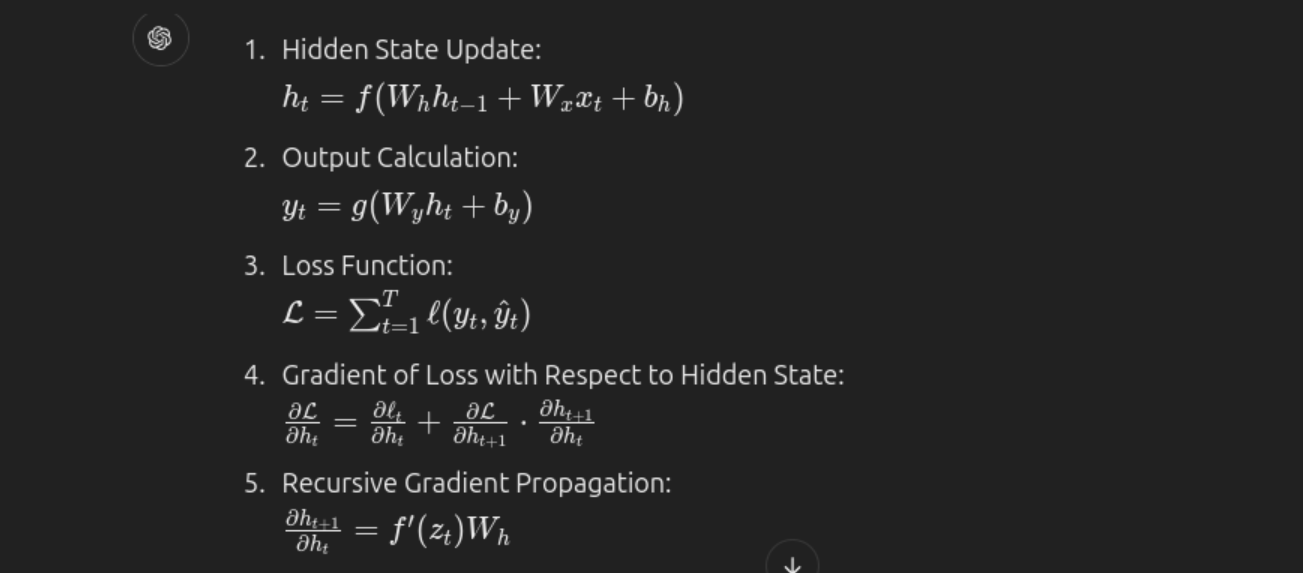



1. **Hidden State Update:**
   - **h_t**: The hidden state at time step t, representing the memory or context of the RNN up to that point.
   - **f**: A non-linear activation function (e.g., tanh or ReLU) applied to the weighted sum of the inputs and the previous hidden state.
   - **W_h**: The weight matrix applied to the previous hidden state h_(t-1).
   - **W_x**: The weight matrix applied to the current input x_t at time step t.
   - **b_h**: The bias term added to the weighted sum of the previous hidden state and the current input.

2. **Output Calculation:**
   - **y_t**: The output at time step t, computed by applying an output function (e.g., softmax) to the hidden state h_t.
   - **W_y**: The weight matrix applied to the hidden state h_t to compute the output.
   - **b_y**: The bias term added to the output calculation.

3. **Loss Function:**
   - **L**: The total loss function, summing individual losses at each time step t.
   - **l(y_t, ŷ_t)**: The loss function (e.g., cross-entropy loss) for the predicted output y_t and the target ŷ_t.

4. **Gradient of Loss with Respect to Hidden State:**
   - **∂L / ∂h_t**: The gradient of the total loss L with respect to the hidden state h_t at time step t.
   - **∂l_t / ∂h_t**: The gradient of the loss at time step t with respect to the hidden state h_t.
   - **∂L / ∂h_(t+1)**: The gradient of the total loss with respect to the hidden state at the next time step h_(t+1).
   - **∂h_(t+1) / ∂h_t**: The derivative of the next hidden state h_(t+1) with respect to the current hidden state h_t.

5. **Recursive Gradient Propagation:**
   - **∂h_(t+1) / ∂h_t**: The gradient of the next hidden state h_(t+1) with respect to the current hidden state h_t, calculated recursively during backpropagation.
   - **f'(z_t)**: The derivative of the activation function f with respect to the input z_t to the hidden state. This is used to calculate the gradient during backpropagation.  
   - **W_h**: The weight matrix applied during the recursive gradient calculation, propagating the error backward through the network.


#### **Gradient Calculation via BPTT:**

1. **Unrolling the RNN:**
   The RNN is unrolled into a sequence of \( T \) copies, with each copy representing one time step. Gradients are computed for each time step and accumulated.

2. **Recursive Gradient Calculation:**
   To compute the gradient of the loss with respect to the hidden state at time \( t \) is:
   

4. **Backpropagation Through Time Steps:**
   Gradients are propagated backward from \( T \) to \( 1 \), summing contributions from each time step.

#### **Challenges in BPTT:**
- **Vanishing/Exploding Gradients:** Gradients can diminish or explode when propagated over many time steps, affecting training stability.
- **High Computational Cost:** Unrolling and computing gradients for long sequences require significant memory and computation.

BPTT captures temporal dependencies by calculating gradients over the entire sequence, making it a powerful but resource-intensive method for training RNNs.





#### **2. Addressing the Data Sparsity Problem**
RNNs learn continuous word representations (embeddings) rather than relying on explicit counts like n-grams. This enables generalization to unseen word combinations and infers meaning from context, even for rare or new words.

#### **3. Memory and Contextual Awareness**
RNNs maintain memory through their hidden states, allowing them to model relationships between words over long distances. For example, in "The cat sat on the mat," the RNN can link "cat" and "mat" semantically despite their separation.

#### **How RNNs Work in Language Modeling**
- **Input Representation:** Words are represented as vectors (e.g., Word2Vec or GloVe embeddings) capturing semantic meanings.
- **Training RNNs:** RNNs predict the next word `( w_t )` in a sequence based on previous words:

```markdown
P(w_t | w_1, w_2, ..., w_{t-1}) = softmax(W h_t + b)
```

Where \( h_t \) is the hidden state, \( W \) is the weight matrix, and \( b \) is the bias.

- **Sequential Processing:** The RNN updates its hidden state for each word and generates a probability distribution for the next word.  
- **Backpropagation Through Time (BPTT):** BPTT propagates the prediction error backward through the sequence to adjust the network’s weights effectively.

RNNs' ability to model sequences, handle variable-length inputs, and learn contextual representations makes them a powerful tool for tasks like language modeling and sequence prediction.


### **10.2.3 What is Truncated Backpropagation Through Time, and how does it make training RNNs more efficient?**

**Truncated Backpropagation Through Time (TBPTT)** is a variation of the Backpropagation Through Time (BPTT) algorithm, specifically designed to make training Recurrent Neural Networks (RNNs) more computationally efficient.

![](https://ars.els-cdn.com/content/image/1-s2.0-S0959438818302009-gr2.jpg)

- **Key Idea:**  
  Instead of propagating errors backward through the entire sequence (as in standard BPTT), TBPTT splits the sequence into manageable chunks of a fixed length \( k \). Gradients are computed only for this truncated window, reducing the computational burden.

- **How it Works:**  
  1. The RNN processes the sequence in chunks of length \( k \).  
  2. Gradients are computed for each chunk and used to update the network's weights.  
  3. The hidden state is carried over between chunks, maintaining continuity across the sequence.

- **Benefits:**  
  - **Efficiency:** Reduces memory usage and computation time.  
  - **Scalability:** Makes it feasible to train RNNs on long sequences without running into hardware limitations.  

- **Limitation:**  
  - TBPTT may lose information about dependencies spanning beyond the truncated window, which can impact performance for tasks requiring long-term memory.

TBPTT strikes a balance between computational efficiency and capturing temporal dependencies, making it a practical choice for training RNNs on large-scale sequential data.



## **10.3 Applications of RNNs and LSTMs**


### **10.3.1 Overview of LSTM**

Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) designed to overcome the limitations of traditional RNNs, especially in capturing long-term dependencies in sequential data. LSTMs are widely used in applications such as language modeling, speech recognition, time-series prediction, and more, due to their ability to maintain and manage memory over long periods of time.

#### Key Features of LSTM:
1. **Memory Cells**: Unlike standard RNNs, which suffer from the vanishing gradient problem, LSTMs have memory cells that allow information to be stored and retrieved over long time spans, making it easier for them to capture long-term dependencies.

2. **Gates**: LSTMs use gates to regulate the flow of information into and out of memory cells:
   - **Forget Gate**: Decides what portion of the previous memory to forget.
   - **Input Gate**: Controls the amount of new information to store in the memory cell.
   - **Output Gate**: Determines what part of the memory to output as the current state.

3. **Cell State**: The memory cell's state is updated based on the input data and previous memory, enabling the model to retain important information while discarding irrelevant details.

4. **Activation Functions**: LSTM networks commonly use sigmoid functions for gating operations and hyperbolic tangent (tanh) for regulating the output values.

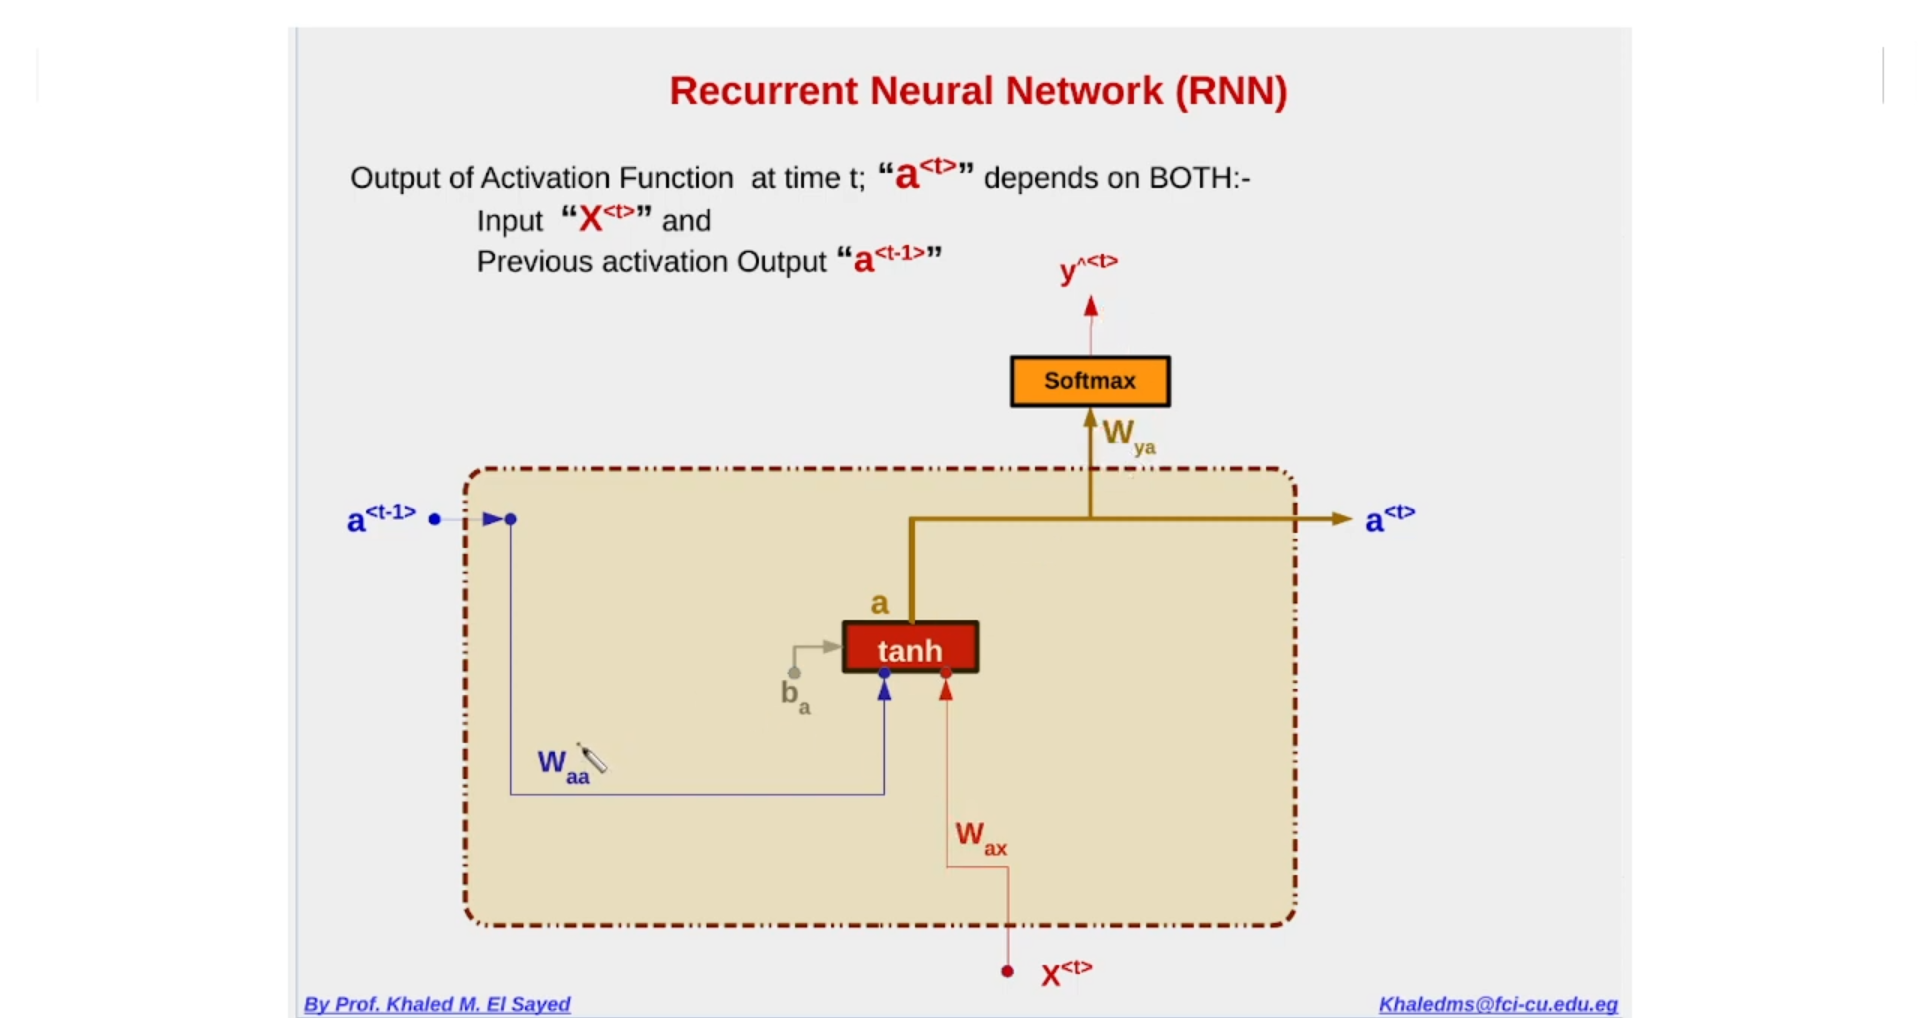

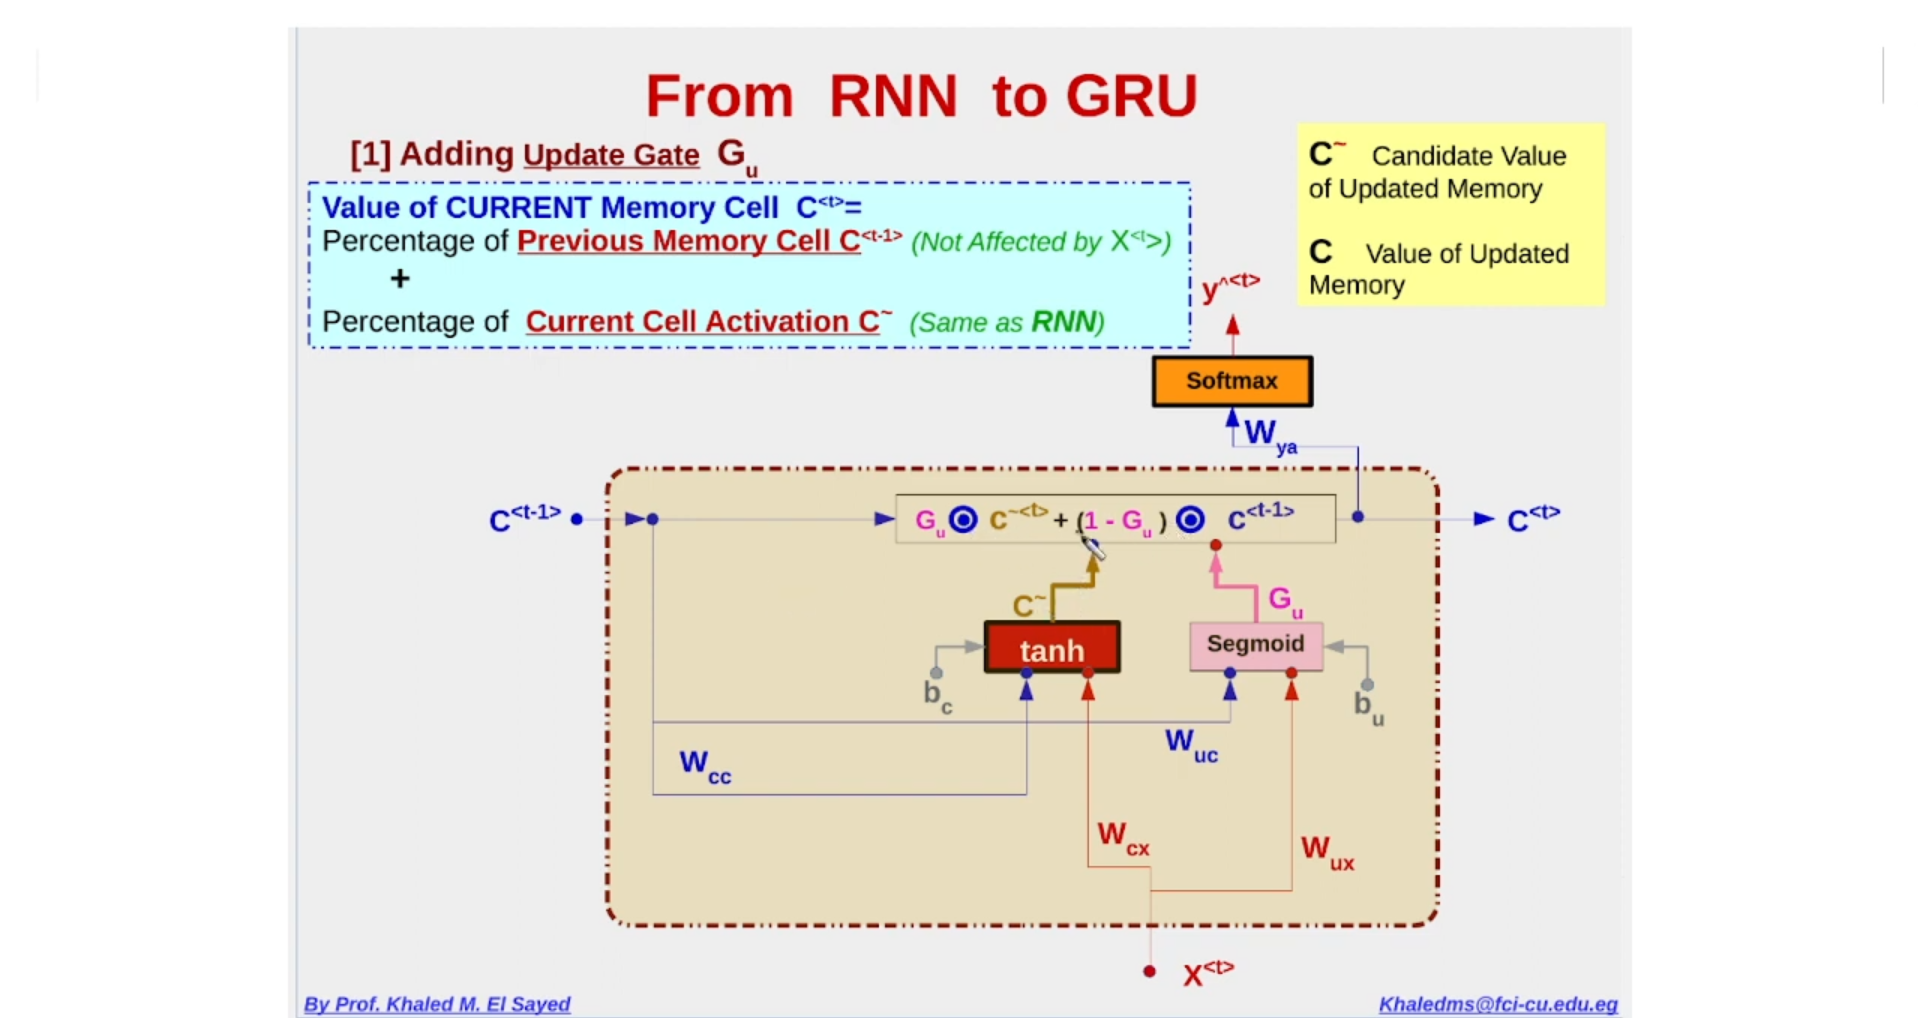




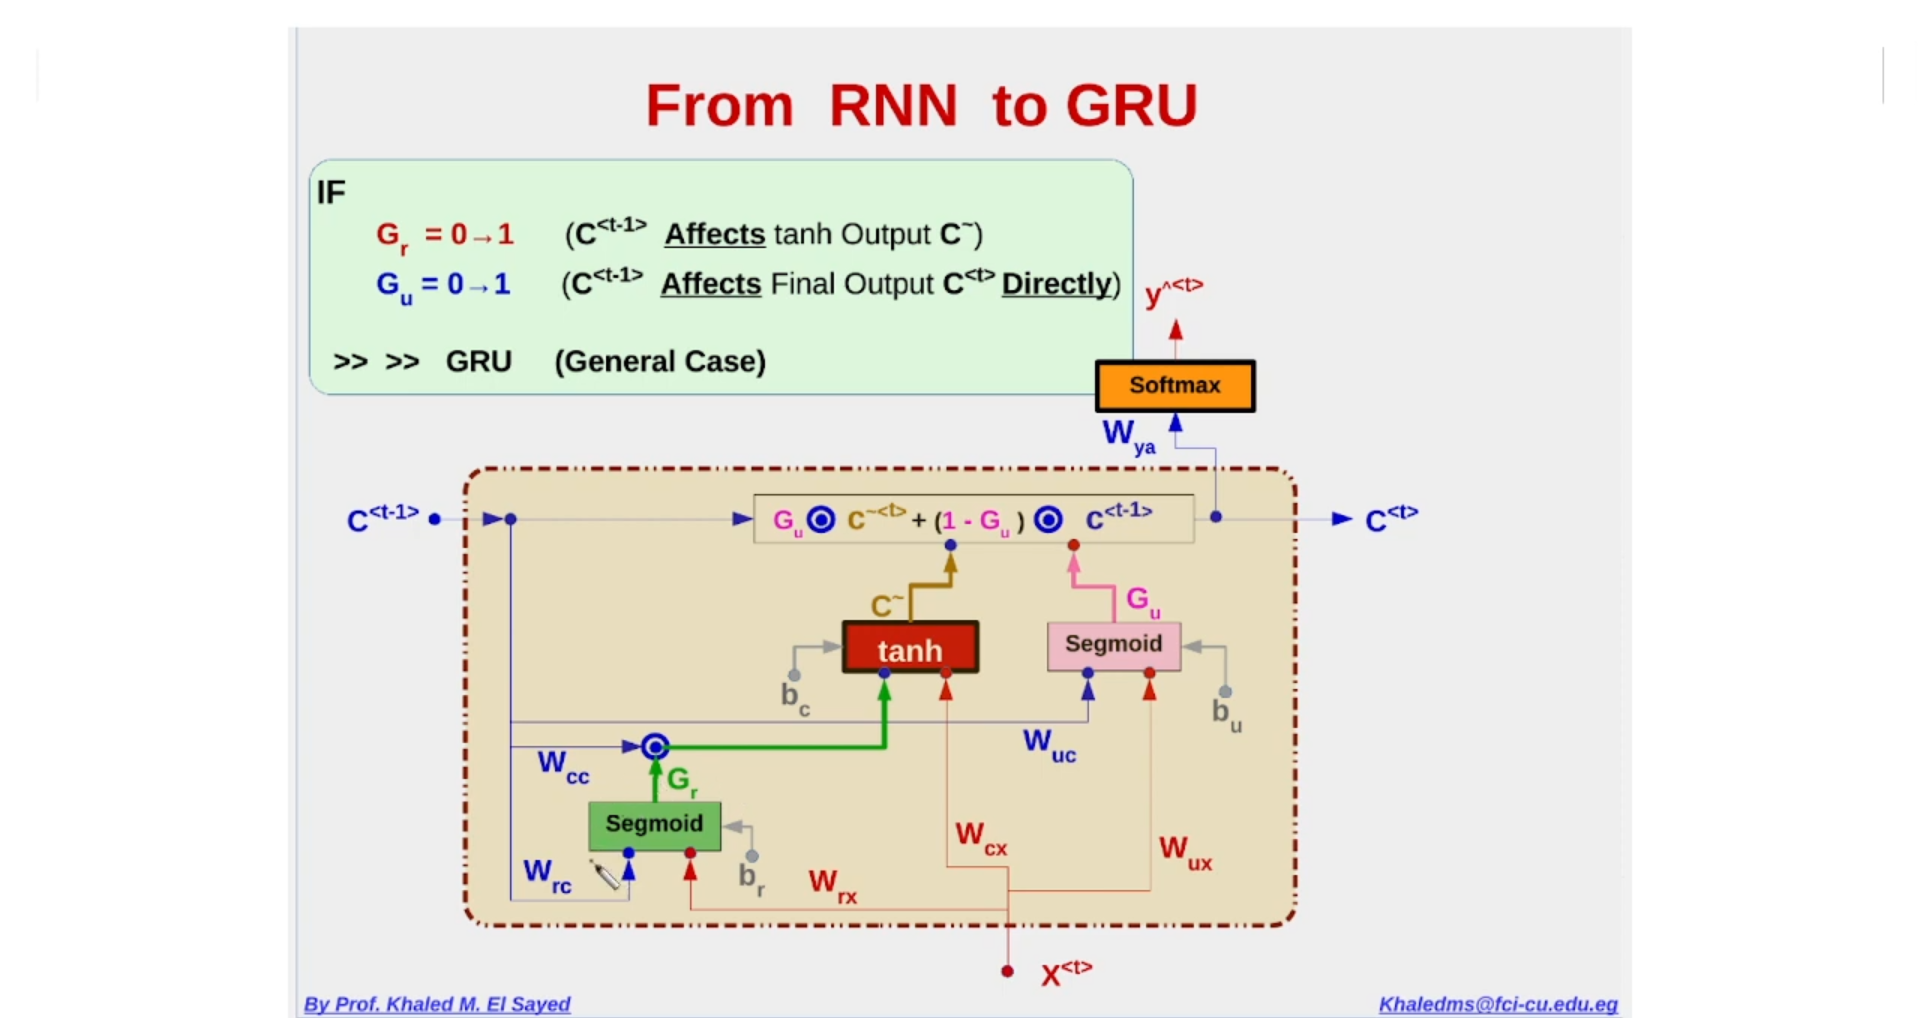

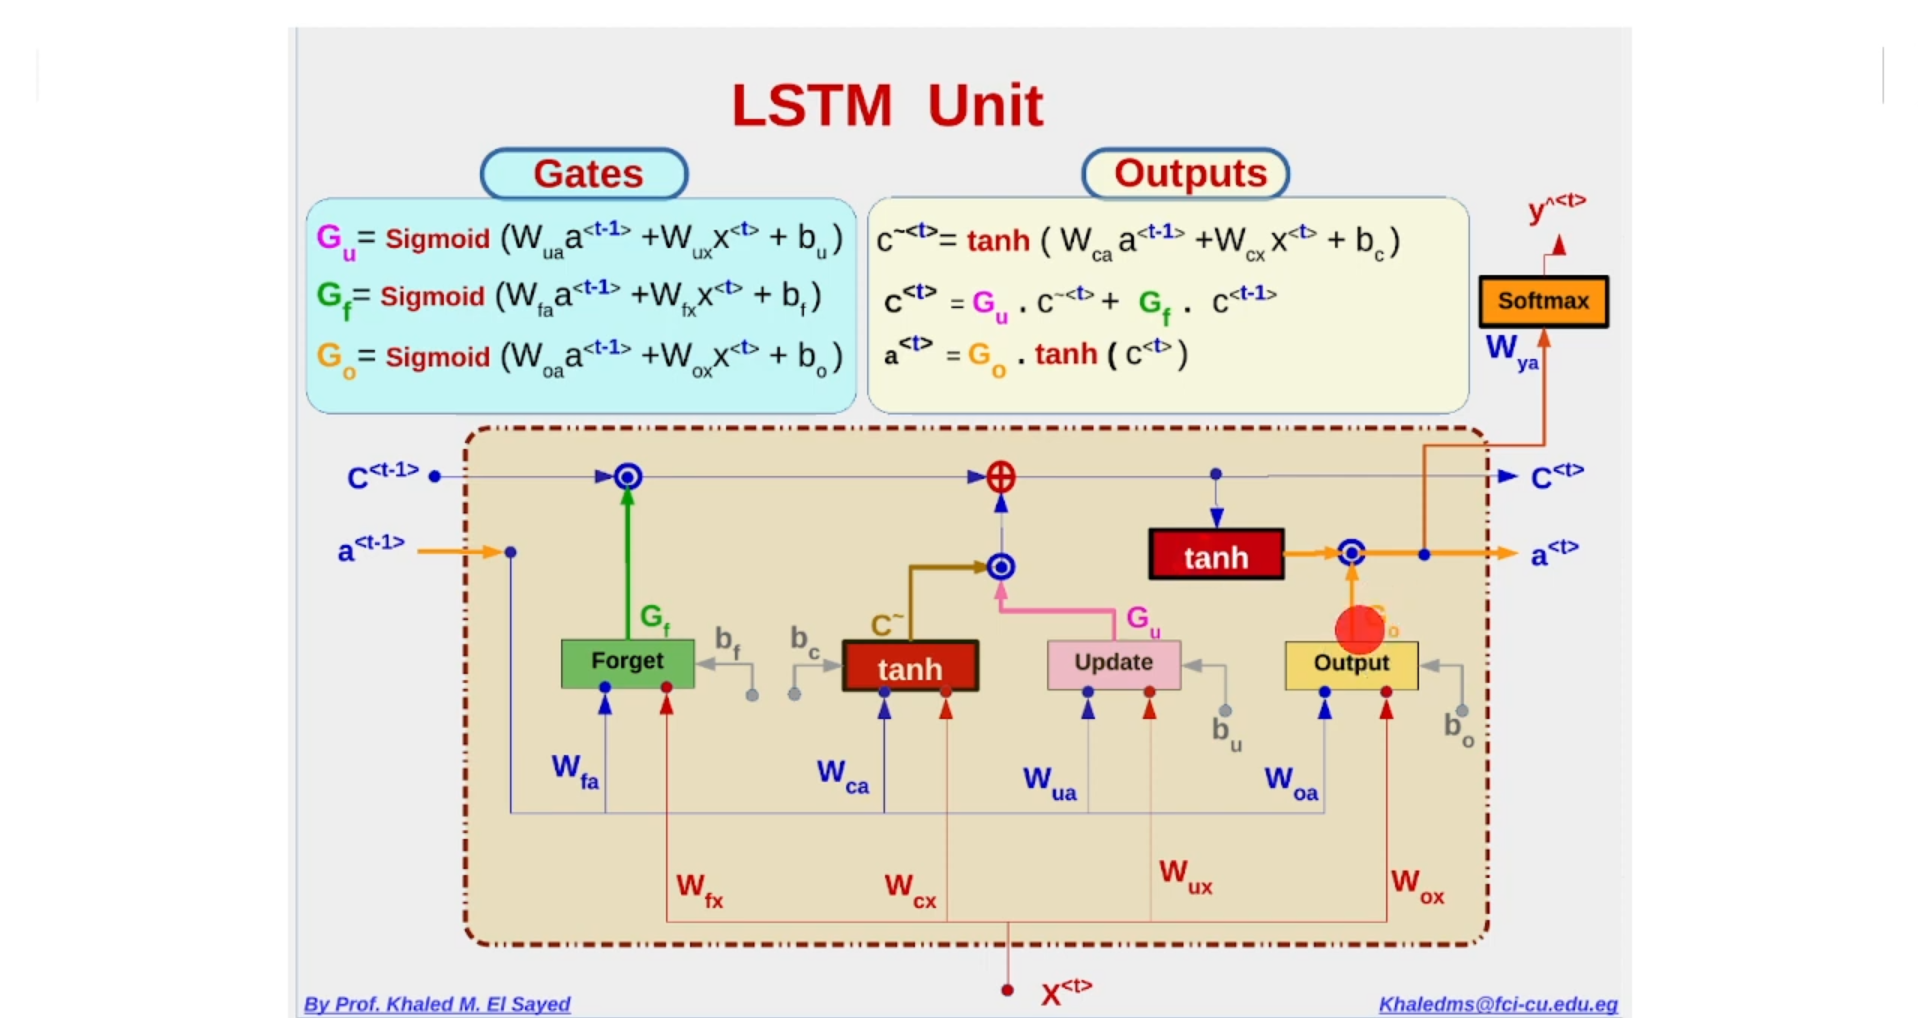


![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*AeKfV2uAPeMg9j8HhQZk2w.png)

LSTM networks are particularly powerful for tasks involving sequential data, where understanding long-term relationships between data points is essential.

### **10.3.2 RNN and LSTM Sequence Applications**

Recurrent Neural Networks (RNNs) and Long Short-Term Memory networks (LSTMs) are widely used for sequence-based applications. They excel in tasks where the order of the data points (i.e., time dependencies or temporal patterns) plays a crucial role. Here are several sequence-based applications for RNNs and LSTMs:

1. **Time Series Forecasting**  
   **Description**: Predicting future values based on historical data, such as stock prices, weather conditions, or energy consumption.  
   **Use Case**: Stock Market Prediction  
   **Problem**: Predict future stock prices based on previous prices.  
   **RNN/LSTM Advantage**: LSTMs can capture long-term dependencies and patterns in the stock price movement over time.  
   **Example**: Given a sequence of past stock prices, the model can predict the stock price for the next day.

2. **Natural Language Processing (NLP)**  
   RNNs and LSTMs are frequently used in NLP tasks because language relies on sequential data (e.g., sentences, words).

   - **Text Generation**  
     **Description**: Generating coherent text based on a given prompt, often used for creative writing, chatbots, or poetry generation.  
     **Use Case**: Poetry Generation  
     **Problem**: Generate a poem or text similar to a given dataset of poetry.  
     **RNN/LSTM Advantage**: LSTMs are effective in generating human-like text because they can remember long-range dependencies between words and phrases.  
     **Example**: Given an initial word or phrase, generate a sequence of words that form a poem or short story.

   - **Machine Translation**  
     **Description**: Translating sentences from one language to another, such as English to French, or vice versa.  
     **Use Case**: English to French Translation  
     **Problem**: Translate a sentence from English into French.  
     **RNN/LSTM Advantage**: LSTMs can handle long-term dependencies in sentences, making them suitable for tasks where words in the sentence must be understood in context.  
     **Example**: Given an English sentence "I am learning", generate the French translation "Je suis en train d'apprendre".

   - **Sentiment Analysis**  
     **Description**: Classifying the sentiment of a text (positive, negative, or neutral).  
     **Use Case**: Review Sentiment Analysis  
     **Problem**: Given a product review, classify whether it is positive or negative.  
     **RNN/LSTM Advantage**: LSTMs are well-suited for analyzing long, context-dependent text, such as identifying sentiment in reviews that may contain subtle cues.  
     **Example**: Classifying a review like "This product is amazing!" as positive.

3. **Speech Recognition**  
   **Description**: Converting spoken language into text. This task is crucial for virtual assistants, transcription services, and voice-activated applications.  
   **Use Case**: Voice to Text Transcription  
   **Problem**: Convert an audio recording of someone speaking into written text.  
   **RNN/LSTM Advantage**: LSTMs can capture long sequences of spoken words and map them to their corresponding text representations.  
   **Example**: Transcribing a sentence spoken in real-time, such as “Hello, how are you today?”

4. **Video and Image Captioning**  
   **Description**: Automatically generating a description for a given video or image by processing frames as a sequence.  
   **Use Case**: Image Captioning  
   **Problem**: Given an image, generate a descriptive caption for it.  
   **RNN/LSTM Advantage**: RNNs or LSTMs are used after a convolutional neural network (CNN) extracts features from the image, then generating the sequence of words that describe the image.  
   **Example**: Given an image of a dog playing in the park, the model generates the caption "A dog running in a grassy field."

5. **Anomaly Detection in Sequences**  
   **Description**: Identifying unusual patterns or outliers in sequences of data, which could be important in fields like security, finance, or healthcare.  
   **Use Case**: Fraud Detection  
   **Problem**: Detect unusual transaction patterns in banking or credit card data that might indicate fraud.  
   **RNN/LSTM Advantage**: LSTMs are capable of modeling sequential patterns in transaction data, making them effective for identifying anomalies based on previous sequences.  
   **Example**: If a customer's spending pattern suddenly changes significantly, the model can flag this as potential fraud.

6. **Speech Synthesis (Text-to-Speech, TTS)**  
   **Description**: Converting written text into spoken words. TTS systems can be powered by LSTMs to generate more natural and fluent speech.  
   **Use Case**: Voice Assistants  
   **Problem**: Generate natural-sounding voice responses from text.  
   **RNN/LSTM Advantage**: LSTMs can model the sequential nature of speech, allowing for more natural intonations and pauses in speech.  
   **Example**: Converting the text "Good morning, how can I help you?" into natural-sounding speech.

7. **Handwriting Recognition**  
   **Description**: Recognizing handwritten text by processing sequential pixel data from images.  
   **Use Case**: Digit Recognition  
   **Problem**: Recognize handwritten digits (like those in the MNIST dataset).  
   **RNN/LSTM Advantage**: LSTMs can process the sequence of pixel rows in a handwritten word or digit and learn the sequence of strokes.  
   **Example**: Given an image of a handwritten "7", classify it as the digit "7".

8. **Music Generation**  
   **Description**: Generating new music sequences (melodies, chords, etc.) based on a given style or pattern.  
   **Use Case**: Melody Generation  
   **Problem**: Generate a melody that follows a certain musical style (e.g., classical or jazz).  
   **RNN/LSTM Advantage**: LSTMs can model the long-term dependencies between notes in a melody, enabling the generation of coherent, musically valid sequences.  
   **Example**: Given a few notes from a classical melody, generate the rest of the melody.

9. **Activity Recognition**  
   **Description**: Recognizing the type of activity being performed based on sequential sensor data (such as from accelerometers or gyroscopes).  
   **Use Case**: Human Activity Recognition  
   **Problem**: Classify physical activities (e.g., walking, running, sitting) based on sensor data.  
   **RNN/LSTM Advantage**: LSTMs can recognize the patterns of motion in the sensor data over time, making them suitable for this application.  
   **Example**: Classifying a sequence of sensor readings as "walking" or "running" based on the patterns.

10. **Character-level Text Classification**  
    **Description**: Classifying text at the level of individual characters, which can be useful for tasks like language identification or detecting spam content.  
    **Use Case**: Language Identification  
    **Problem**: Classify the language of a given text sequence based on character patterns.  
    **RNN/LSTM Advantage**: RNNs and LSTMs can handle character-level features and sequential data effectively, identifying language based on the sequence of characters.  
    **Example**: Given a sentence, classify it as being in English, French, or German.

#### **Summary of RNN/LSTM Applications**:
- Time Series Forecasting (stock prices, weather)
- NLP Tasks (text generation, machine translation, sentiment analysis)
- Speech Recognition and Speech Synthesis
- Video/Image Captioning
- Anomaly Detection (fraud detection, network security)
- Handwriting Recognition and Music Generation
- Activity Recognition (e.g., from sensor data)
- Character-level Text Classification (e.g., language detection)

RNNs and LSTMs are highly versatile and can be applied to any problem where the data points are dependent on one another in a sequential manner. Their ability to capture long-term dependencies makes them the go-to models for tasks involving sequences.

### **10.3.3 How does a character-level language model work, and what are its advantages and challenges compared to word-level models?**


### **10.3.4 What are the practical steps to transition from a vanilla RNN to an LSTM, and in what scenarios is this transition essential?**




## **10.4 Mathematics and Gradient Analysis**


### **10.4.1 What are the mathematical differences between vanilla RNNs and LSTMs, particularly in gradient calculations?**


### **10.4.2 How do vanishing and exploding gradients affect RNN training, and how does LSTM mitigate these issues through its gating mechanisms?**




## **10.5 Advanced Topics: Attention Mechanisms and Applications**


### **10.5.1 How does image captioning with attention work, and why is attention critical in tasks involving both vision and language?**


### **10.5.2 What is the difference between soft attention and hard attention, and in what scenarios is each approach more suitable?**



## **10.6 Integrating Models in Real-World Applications**


### **10.6.1 How can LSTMs be combined with CNNs for autonomous driving, and what roles do they play in processing sensor data and decision-making?**


### **10.6.2 What are the challenges of using RNNs or LSTMs in real-world applications like autonomous driving, and how can these be addressed?**




## **10.7 Autoencoders and Variants**


### **10.7.1 What are autoencoders, stacked autoencoders, and convolutional autoencoders?**


### **10.7.2 How does an autoencoder architecture work?**


### **10.7.3 What is the architecture of a denoising autoencoder?**


### **10.7.4 What is a stacked autoencoder, and how is it structured?**


### **10.7.5 What is the architecture of a denoising stacked autoencoder?**


### **10.7.6 What is the architecture of a convolutional autoencoder?**


### **10.7.7 What are the different uses and applications of autoencoders?**


### **10.7.8 What is a variational autoencoder, and how does it differ from regular autoencoders?**



## **10.8 Comparing RNN Variants**


### **10.8.1 What is the difference between Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) networks?**


### **10.8.2 How do Gated Recurrent Units (GRUs) compare to LSTMs?**


### **10.8.3 What is an LSTM, and how does it work in comparison to traditional RNNs?**


### **10.8.4 How do GRUs work, and what are the key differences compared to LSTMs?**


### **10.8.5 What are the main differences between LSTMs and GRUs in sequence modeling tasks?**
